In [2]:
library(DBI)
library(odbc)
library(RSQLite)
library(dplyr)
library(ggplot2)
library(mechkar)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#sort(unique(odbcListDrivers()[[1]]))

[1] "ODBC Driver 11 for SQL Server" "SQL Server"                   
[3] "SQL Server Native Client 11.0"

In [3]:
#con <- dbConnect(odbc(), 
 #                Driver = "SQL Server", 
  #               Server = "DESKTOP-79V6INH\\DANIEL1", 
   #              Database = "BoxOffice", 
    #             Trusted_Connection = "True")

In [4]:
# movies_ff <- dbReadTable(con,"movies_ff_v")

In [5]:
# save(movies_ff,file="C:/Users/DANIEL/Documents/DataScience/data/BoxOffice_ff.RData")

In [3]:
if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}

Loading required package: ggExtra

Warning message:
"package 'ggExtra' was built under R version 3.6.2"
Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.2"
Loading required package: mvoutlier

Loading required package: sgeostat

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

sROC 0.1-2 loaded

Loading required package: MissMech

Loading required package: mice

Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


Loading required package: MatchIt



In [4]:
 BoxOffice_ff <- load("C:/Users/DANIEL/Documents/DataScience/data/BoxOffice_ff.RData")

In [5]:
head(movies_ff)

movie_id budget   original_language popularity release_date runtime
1 1        14000000 en                 6.575393  2015-02-20    93    
2 2        40000000 en                 8.248895  2004-08-06   113    
3 3         3300000 en                64.299990  2014-10-10   105    
4 4         1200000 hi                 3.174936  2012-03-09   122    
5 5               0 ko                 1.148070  2009-02-05   118    
6 6         8000000 en                 0.743274  1987-08-06    83    
  runtime_cat revenue  sw_lang_en sw_web_presence ... depart_Camera_female
1 Short       12314651 1          0               ... 0                   
2 Medium      95149435 1          0               ... 0                   
3 Medium      13092000 1          1               ... 0                   
4 Large       16000000 0          1               ... 0                   
5 Medium       3923970 0          0               ... 0                   
6 Short        3261638 1          0               ... 0                   
  depart_Crew_female depart_Custom_Mkup_female depart_Directing_female
1 0                  0                         0                      
2 0                  0                         0                      
3 1                  0                         0                      
4 0                  0                         0                      
5 0                  0                         0                      
6 0                  0                         0                      
  depart_Editing_female depart_Lighting_female depart_Production_female
1 0                     0                      0                       
2 0                     0                      3                       
3 0                     0                      2                       
4 0                     0                      0                       
5 0                     0                      0                       
6 0                     0                      0                       
  depart_Sound_female depart_Visual_Effects_female depart_Writing_female
1 0                   0                            0                    
2 0                   0                            1                    
3 0                   0                            0                    
4 0                   0                            0                    
5 0                   0                            0                    
6 0                   0                            0

In [6]:
df <- movies_ff
y <- "revenue"

In [7]:
summary(df)

    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
 release_date          runtime      runtime_cat           revenue         
 Length:7375        Min.   :  0.0   Length:7375        Min.   :1.000e+00  
 Class :character   1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06  
 Mode  :character   Median :104.0   Mode  :character   Median :1.693e+07  
                    Mean   :107.7                      Mean   :6.688e+07  
                    3rd Qu.:118.0        

In [8]:
Table1(data = df)

  |======================================================================| 100%

V1                           V2           Pop                        
1    Variables                    Categories   Population                 
2    Individuals                  n            7375                       
3    movie_id                     Mean (SD)    3,698.1 (2,136.7)          
4    movie_id                     Median (IQR) 3,696.0 (1,848.5-5,550.5)  
5    movie_id                     Missing (%)   --                        
6    budget                       Mean (SD)    22,666,656.9 (36,987,354.2)
7    budget                       Median (IQR) 8e+06 (0.0-2.9e+07)        
8    budget                       Missing (%)   --                        
9    original_language            af           1 (0.0%)                   
10   original_language            ar           1 (0.0%)                   
11   original_language            bm           2 (0.0%)                   
12   original_language            bn           3 (0.0%)                   
13   original_language            ca           1 (0.0%)                   
14   original_language            cn           41 (0.6%)                  
15   original_language            cs           3 (0.0%)                   
16   original_language            da           17 (0.2%)                  
17   original_language            de           49 (0.7%)                  
18   original_language            el           3 (0.0%)                   
19   original_language            en           6,336 (85.9%)              
20   original_language            es           95 (1.3%)                  
21   original_language            fa           5 (0.1%)                   
22   original_language            fi           3 (0.0%)                   
23   original_language            fr           199 (2.7%)                 
24   original_language            he           6 (0.1%)                   
25   original_language            hi           118 (1.6%)                 
26   original_language            hu           4 (0.1%)                   
27   original_language            id           3 (0.0%)                   
28   original_language            is           1 (0.0%)                   
29   original_language            it           55 (0.7%)                  
30   original_language            ja           90 (1.2%)                  
...  ...                          ...          ...                        
4962 depart_Camera_female         Mean (SD)    0.0 (0.1)                  
4963 depart_Camera_female         Median (IQR) 0.0 (0.0-0.0)              
4964 depart_Camera_female         Missing (%)  34 (0.5%)                  
4965 depart_Crew_female           Mean (SD)    0.1 (0.3)                  
4966 depart_Crew_female           Median (IQR) 0.0 (0.0-0.0)              
4967 depart_Crew_female           Missing (%)  34 (0.5%)                  
4968 depart_Custom_Mkup_female    Mean (SD)    0.4 (0.7)                  
4969 depart_Custom_Mkup_female    Median (IQR) 0.0 (0.0-1.0)              
4970 depart_Custom_Mkup_female    Missing (%)  34 (0.5%)                  
4971 depart_Directing_female      Mean (SD)    0.2 (0.4)                  
4972 depart_Directing_female      Median (IQR) 0.0 (0.0-0.0)              
4973 depart_Directing_female      Missing (%)  34 (0.5%)                  
4974 depart_Editing_female        Mean (SD)    0.1 (0.4)                  
4975 depart_Editing_female        Median (IQR) 0.0 (0.0-0.0)              
4976 depart_Editing_female        Missing (%)  34 (0.5%)                  
4977 depart_Lighting_female       Mean (SD)    0.0 (0.0)                  
4978 depart_Lighting_female       Median (IQR) 0.0 (0.0-0.0)              
4979 depart_Lighting_female       Missing (%)  34 (0.5%)                  
4980 depart_Production_female     Mean (SD)    0.9 (1.3)                  
4981 depart_Production_female     Median (IQR) 0.0 (0.0-2.0)              
4982 depart_Production_female     Missing (%)  34 (0.5%)                  
4983 depart_Sound_female      

In [9]:
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("gridExtra")) install.packages("gridExtra")


Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




[1] "movie_id"
[1] "budget"


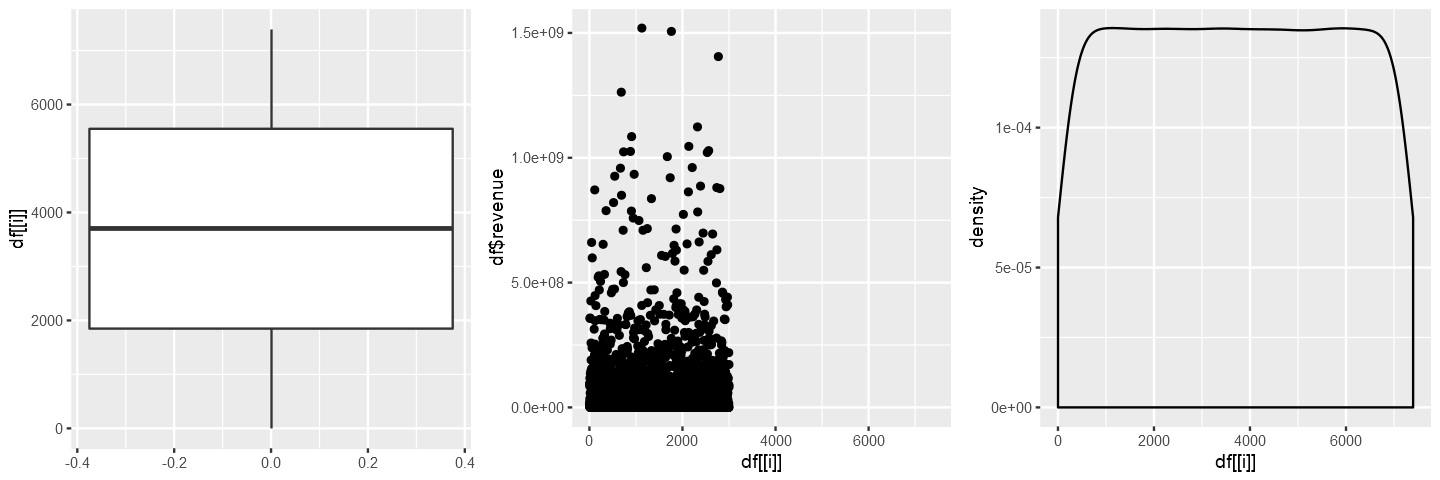

[1] "original_language"


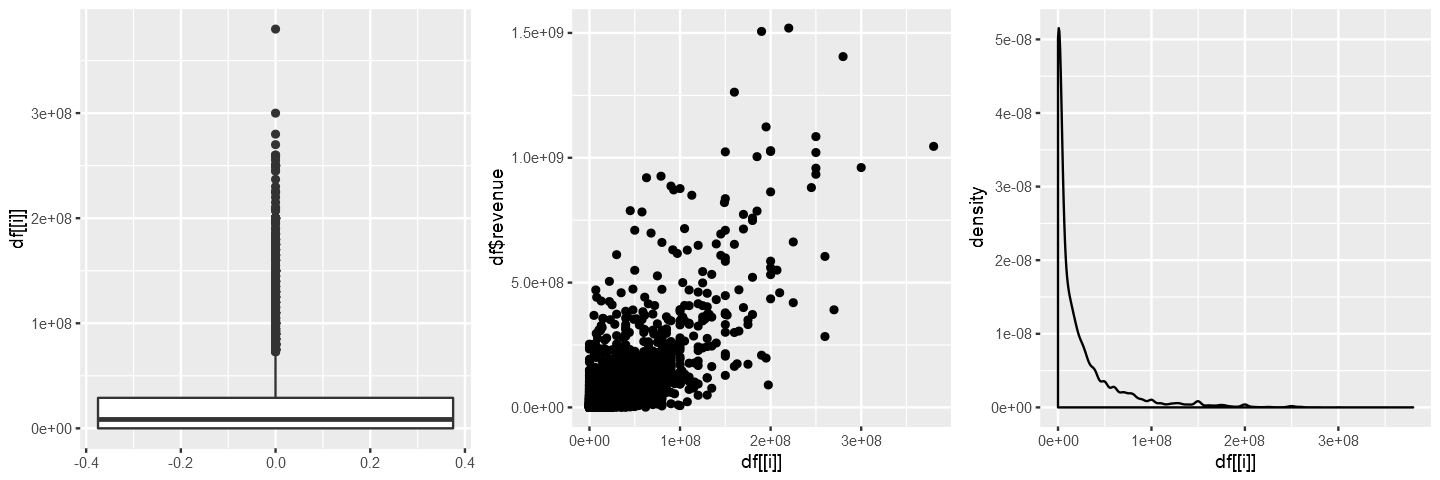

[1] "popularity"


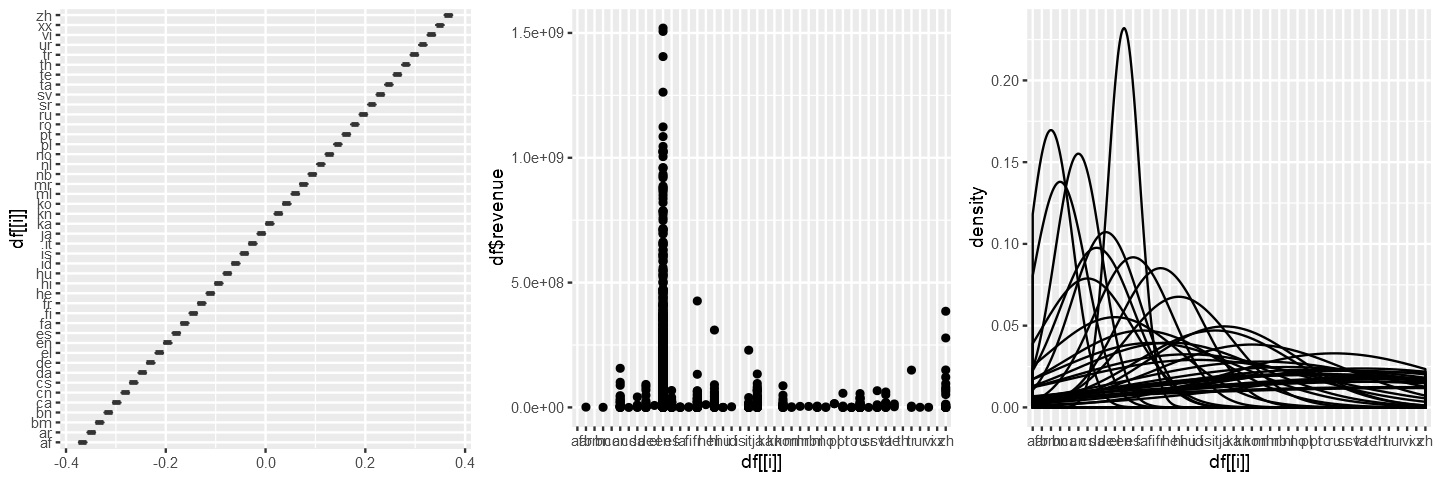

[1] "release_date"


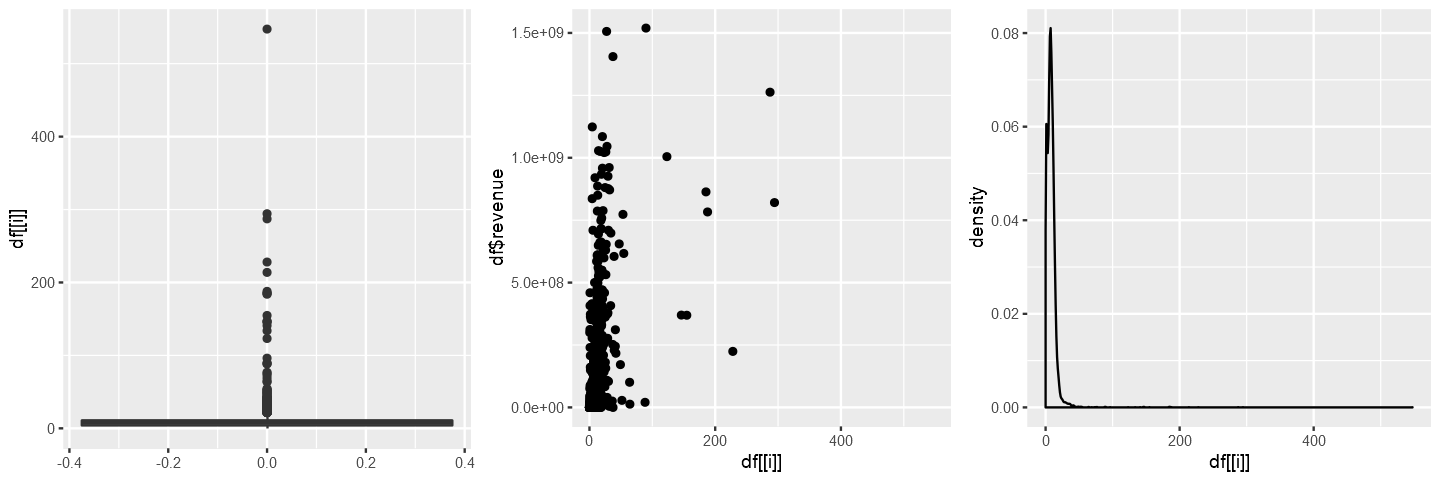

[1] "runtime"


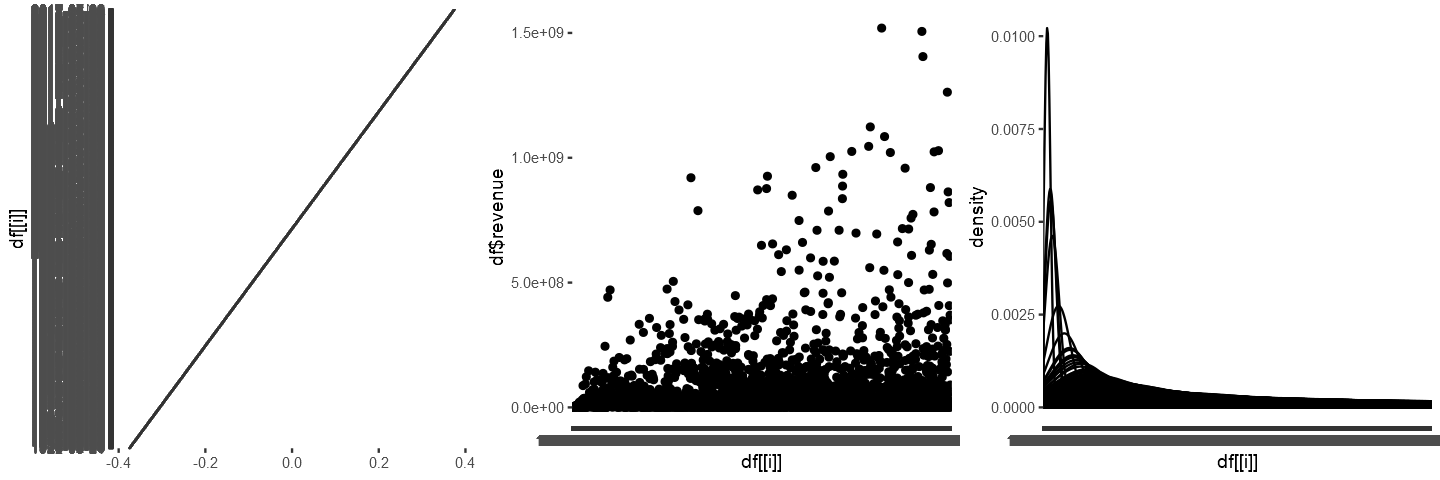

[1] "runtime_cat"


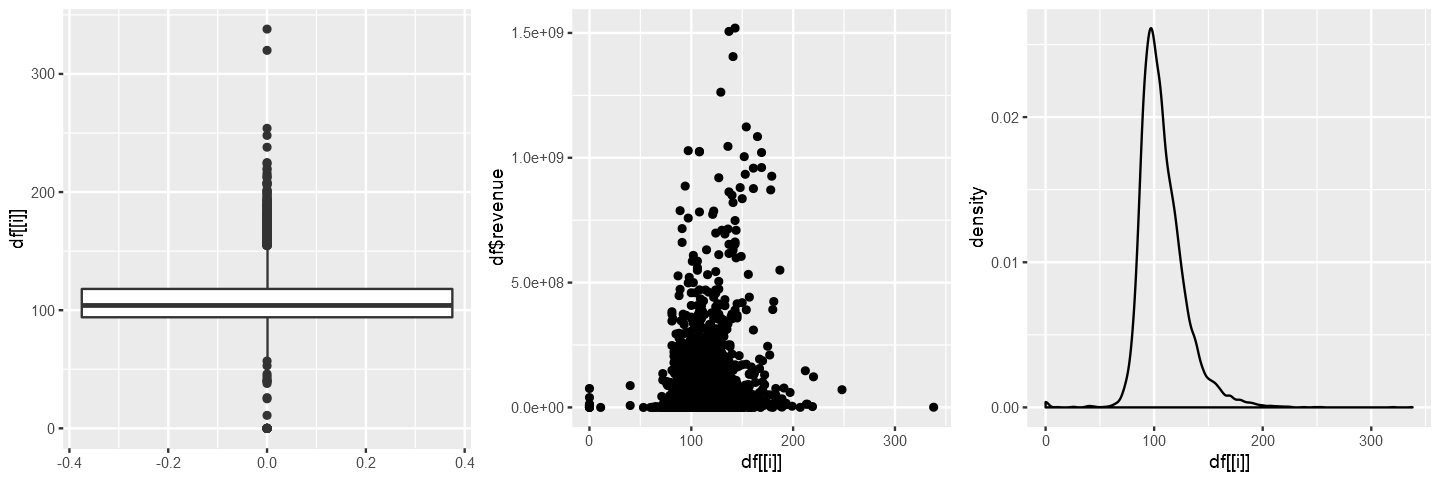

[1] "revenue"


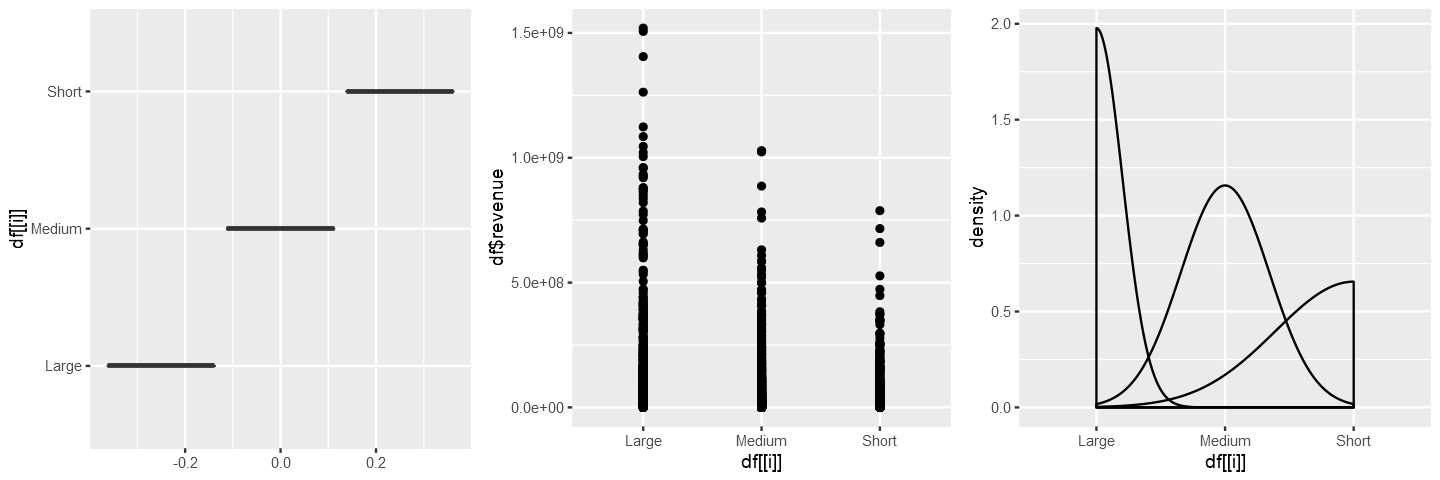

[1] "sw_lang_en"


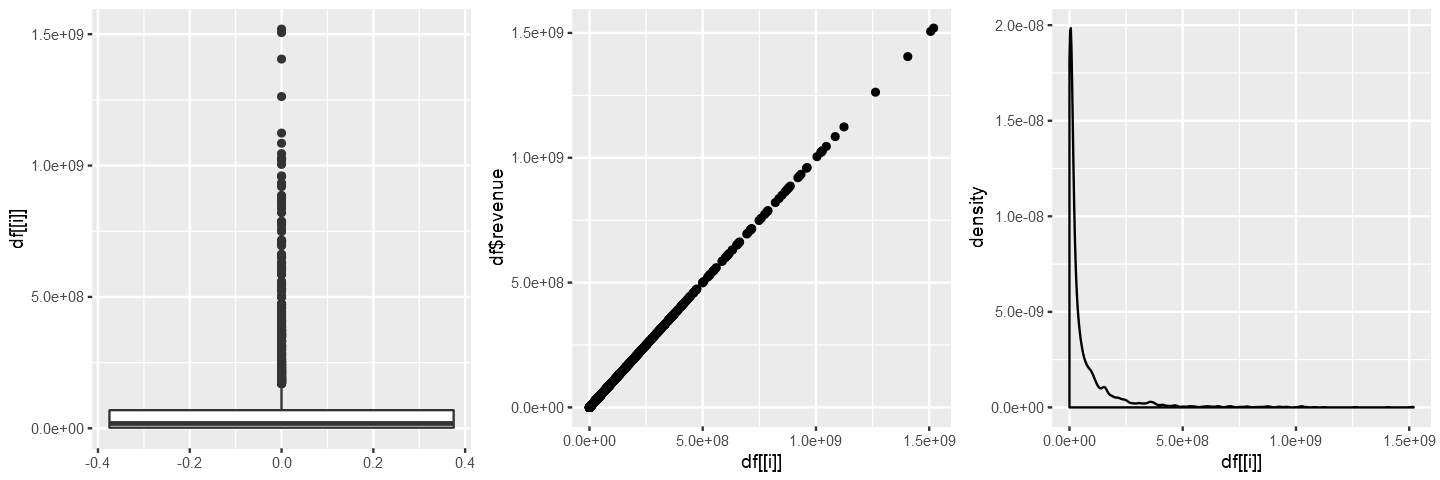

[1] "sw_web_presence"


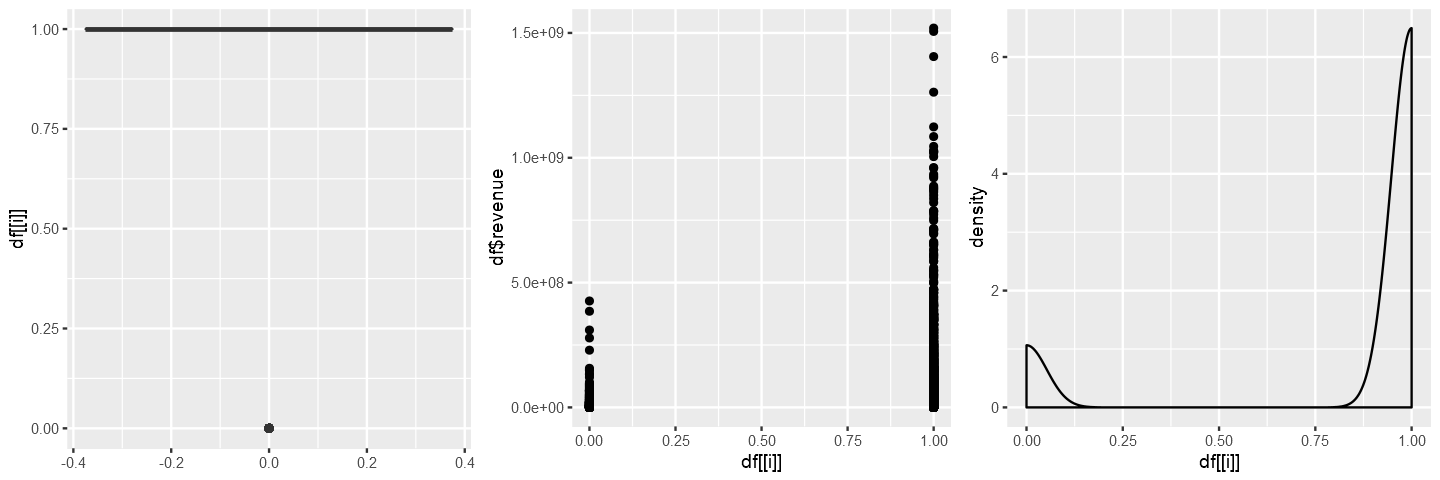

[1] "sw_has_poster"


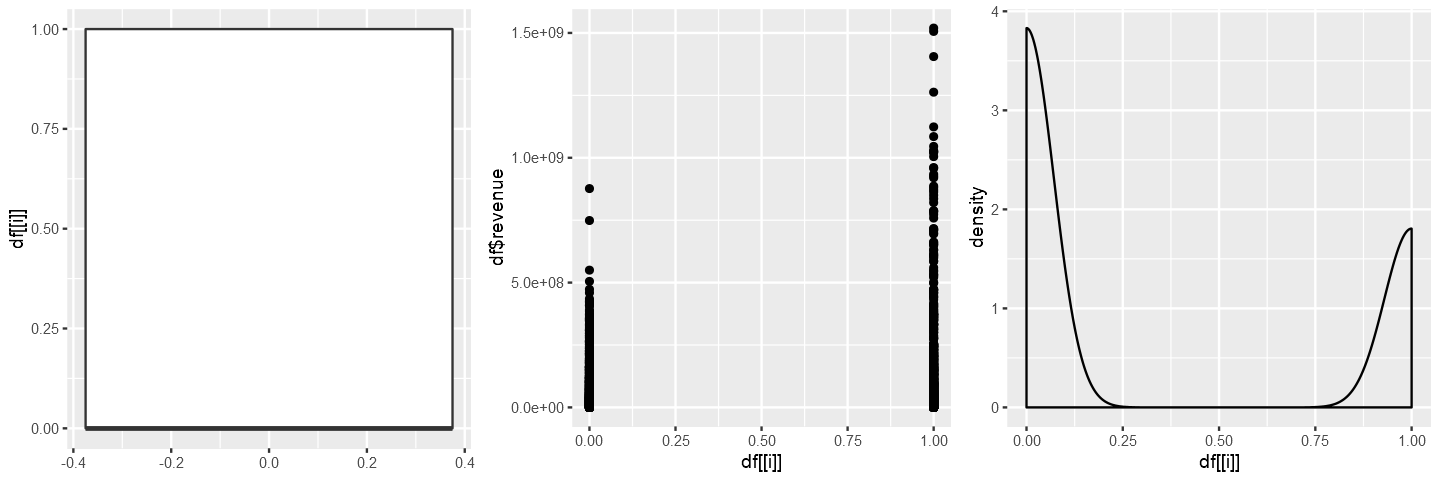

[1] "sw_tagline"


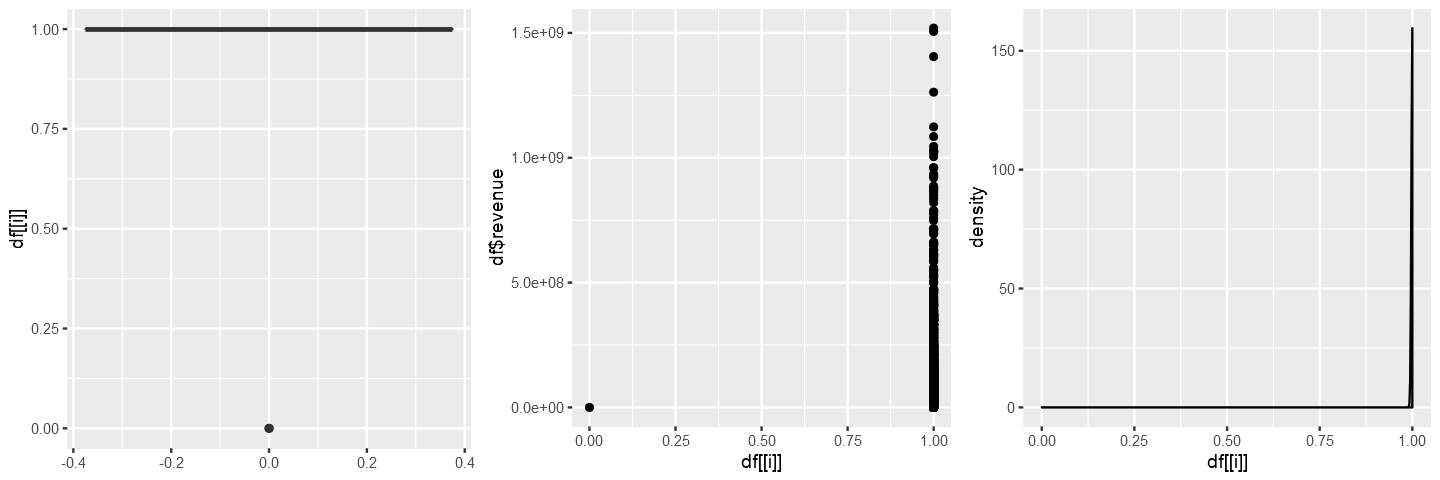

[1] "keyword_cnt"


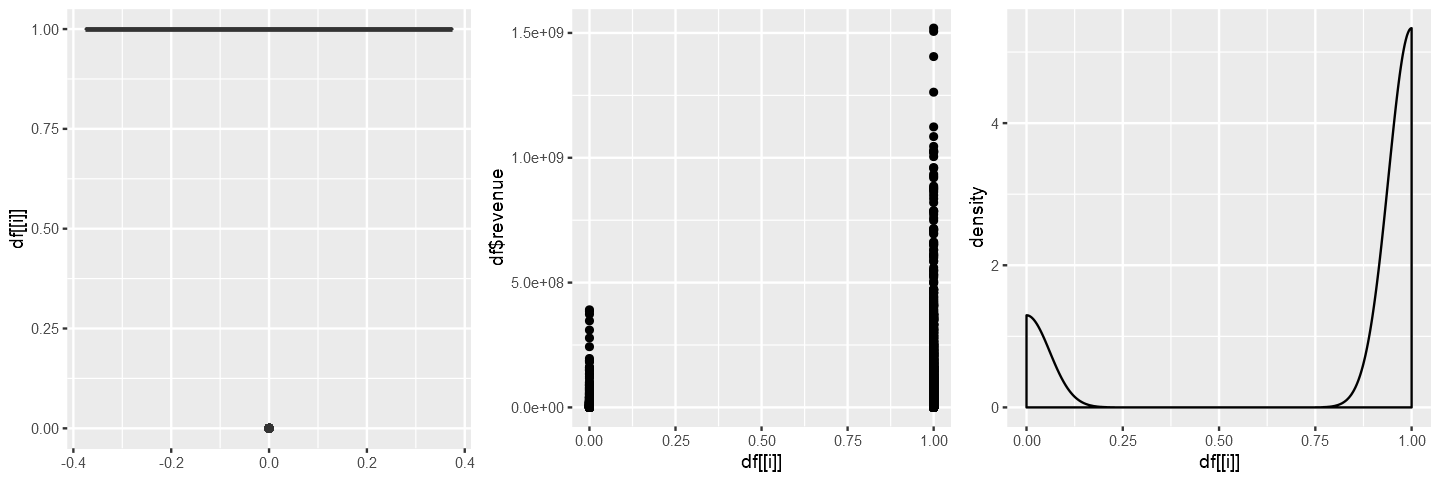

[1] "release_year"


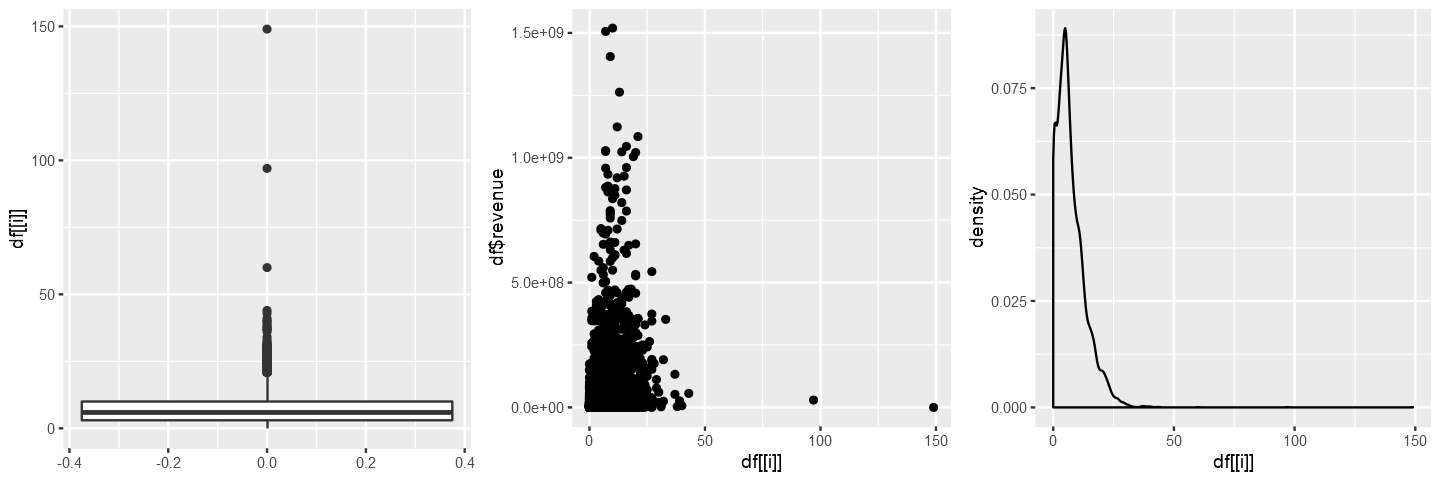

[1] "release_month"


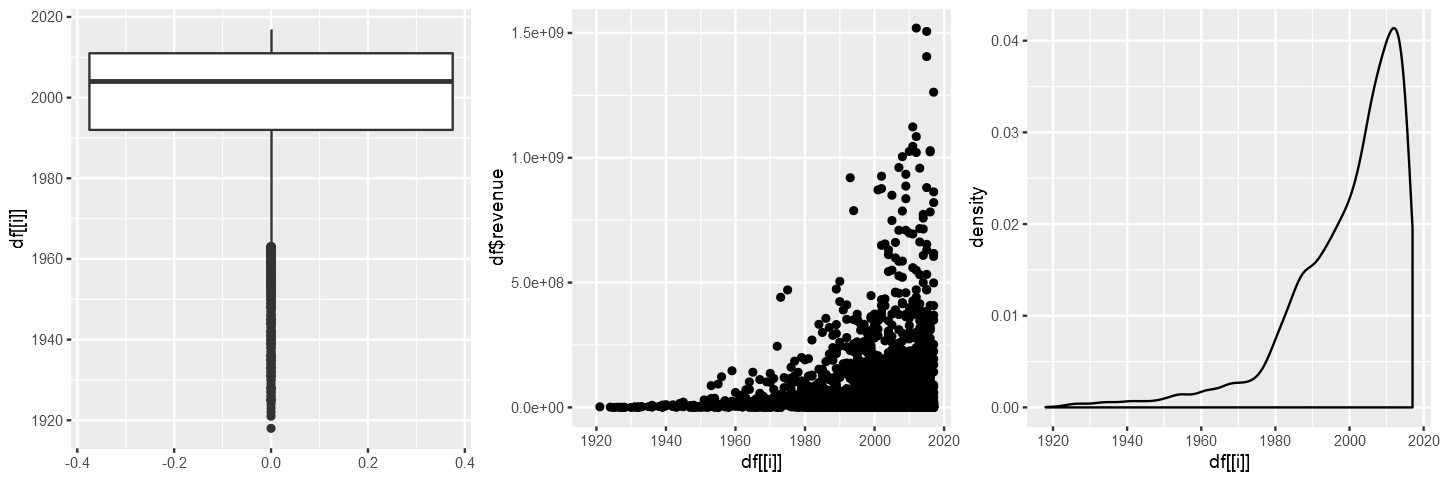

[1] "high_release_month"


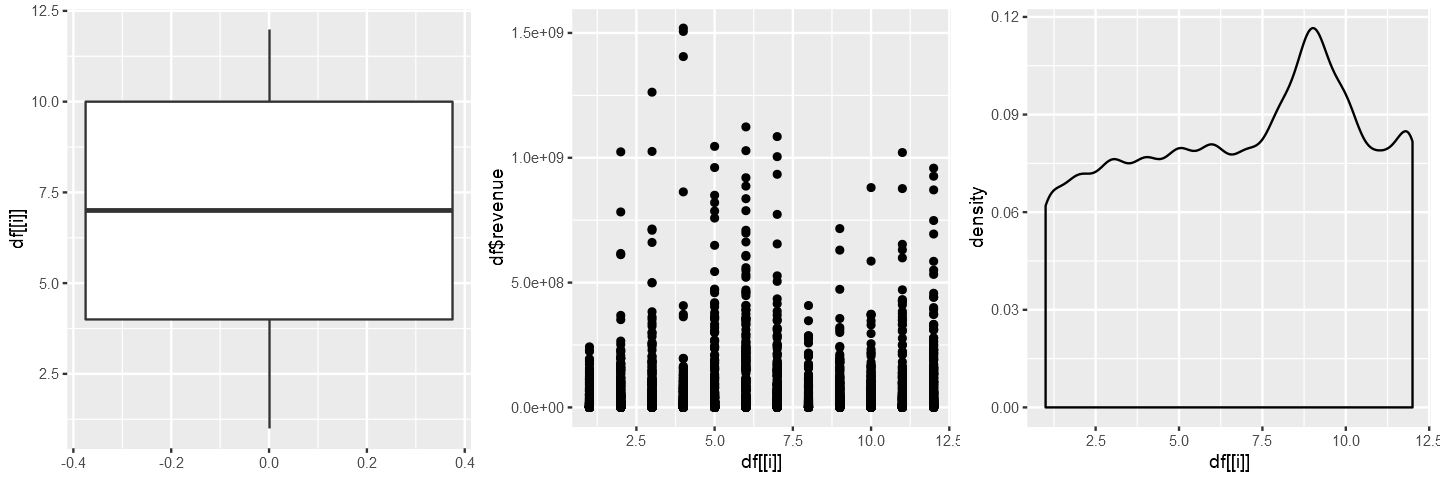

[1] "release_day"


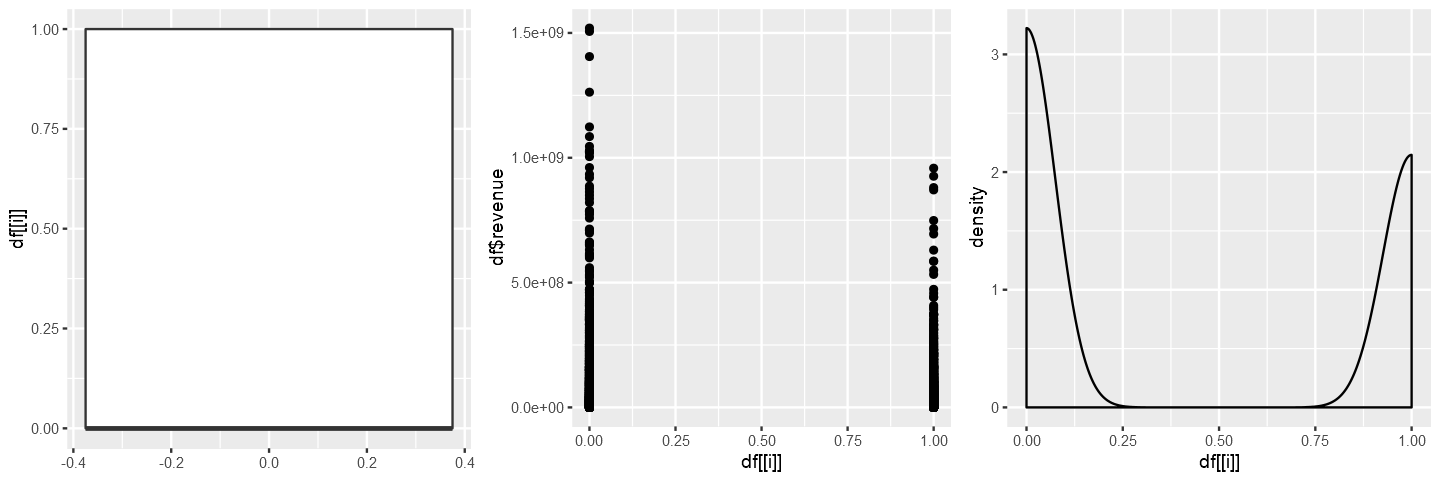

[1] "seasonality"


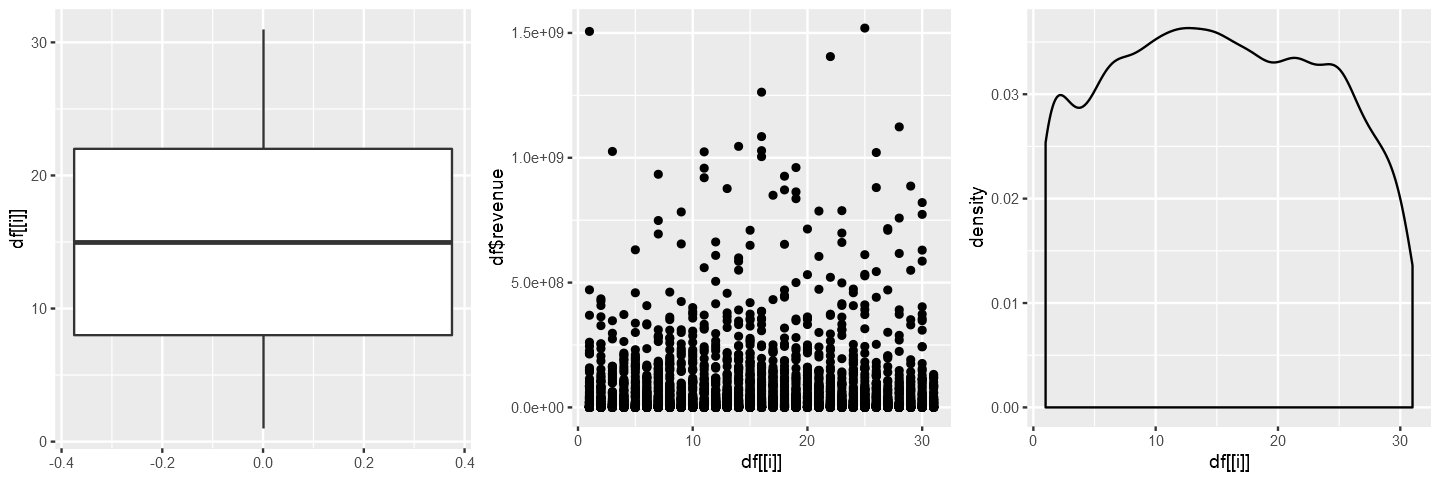

[1] "sw_collection"


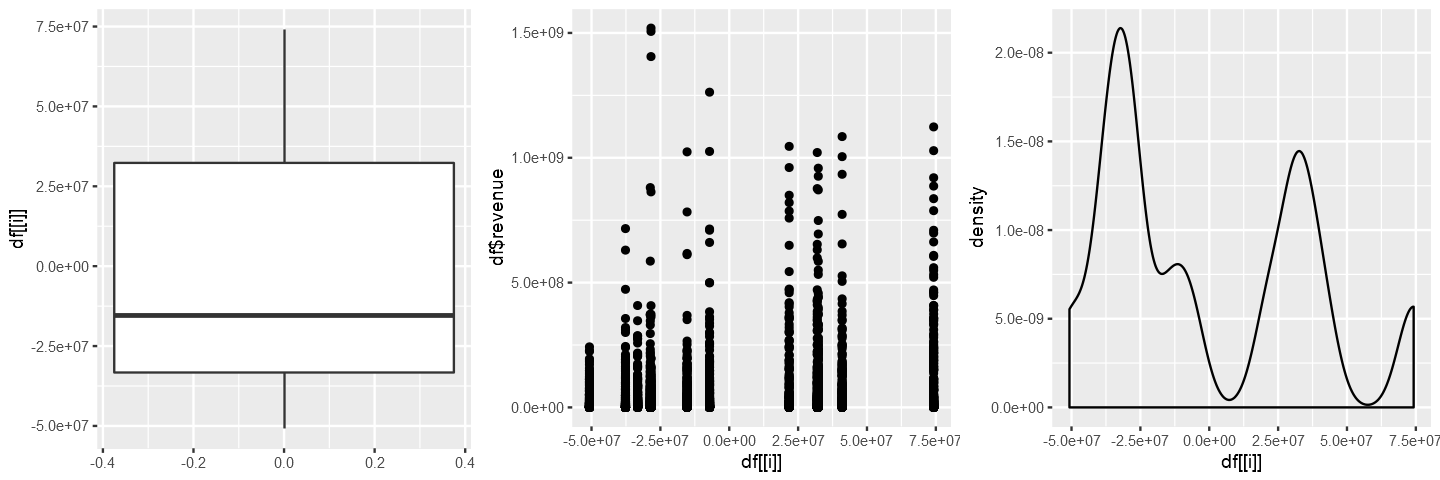

[1] "producers_cnt"


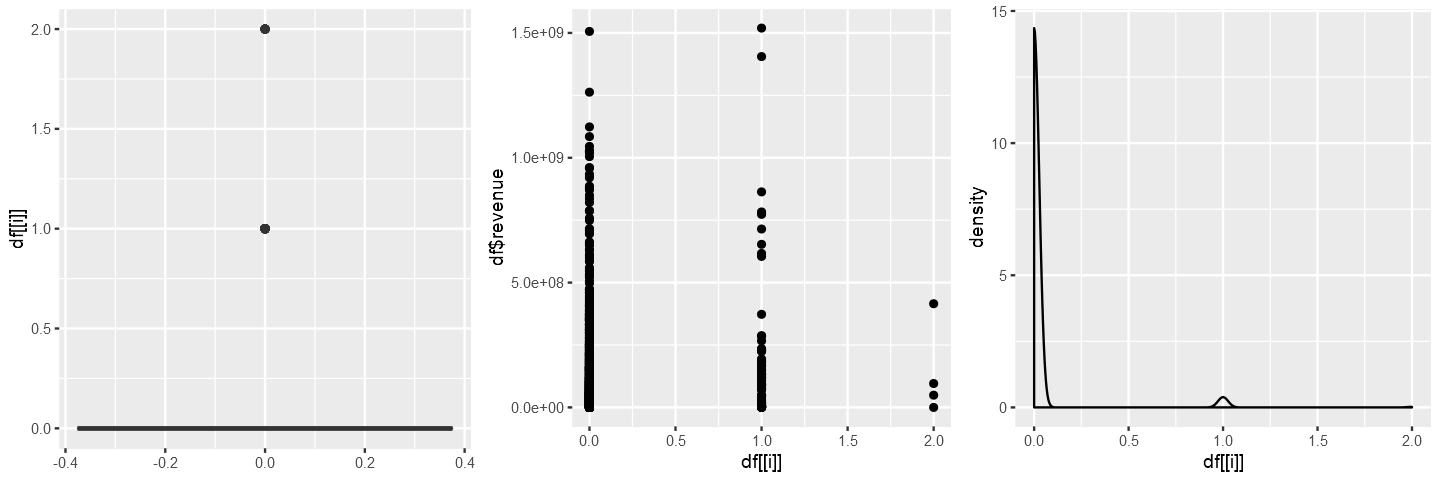

[1] "countries_cnt"


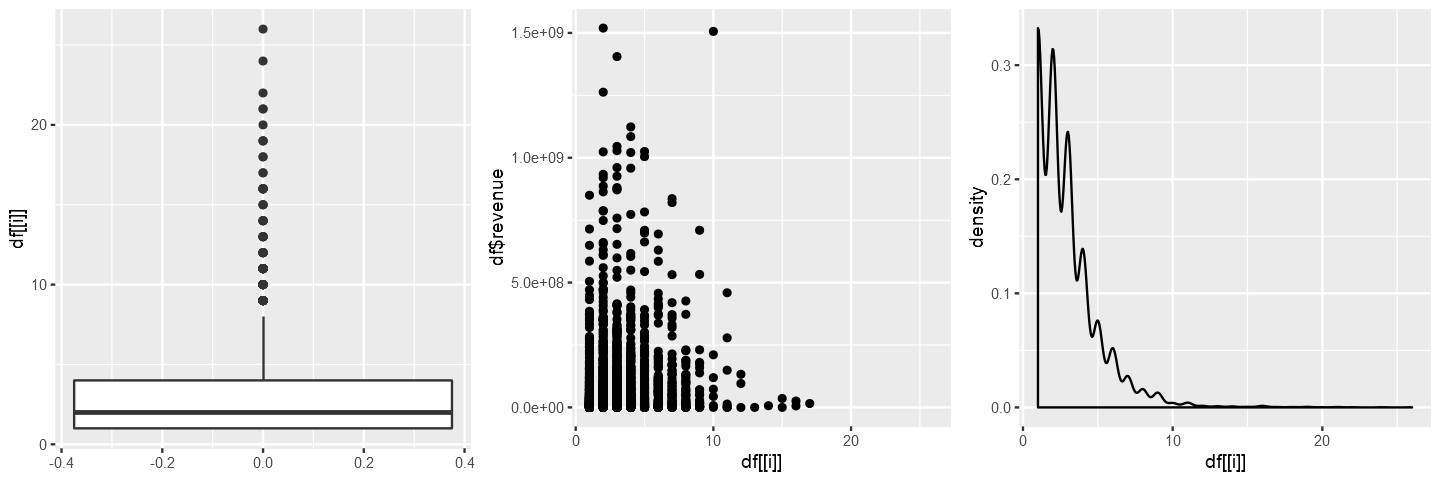

[1] "lang_US"


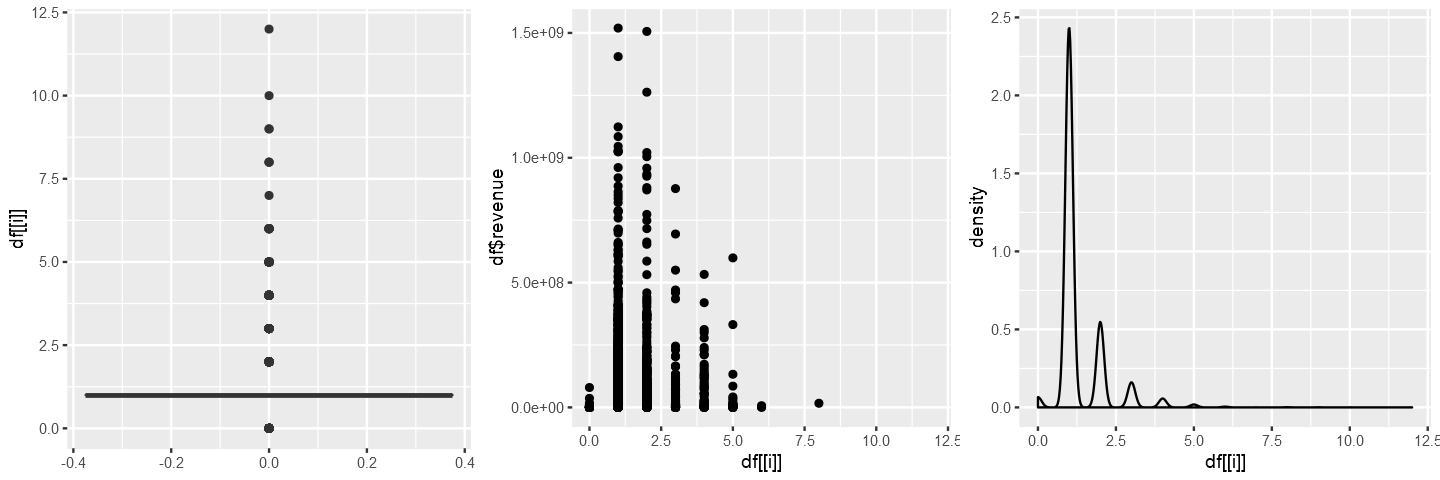

[1] "lang_FR"


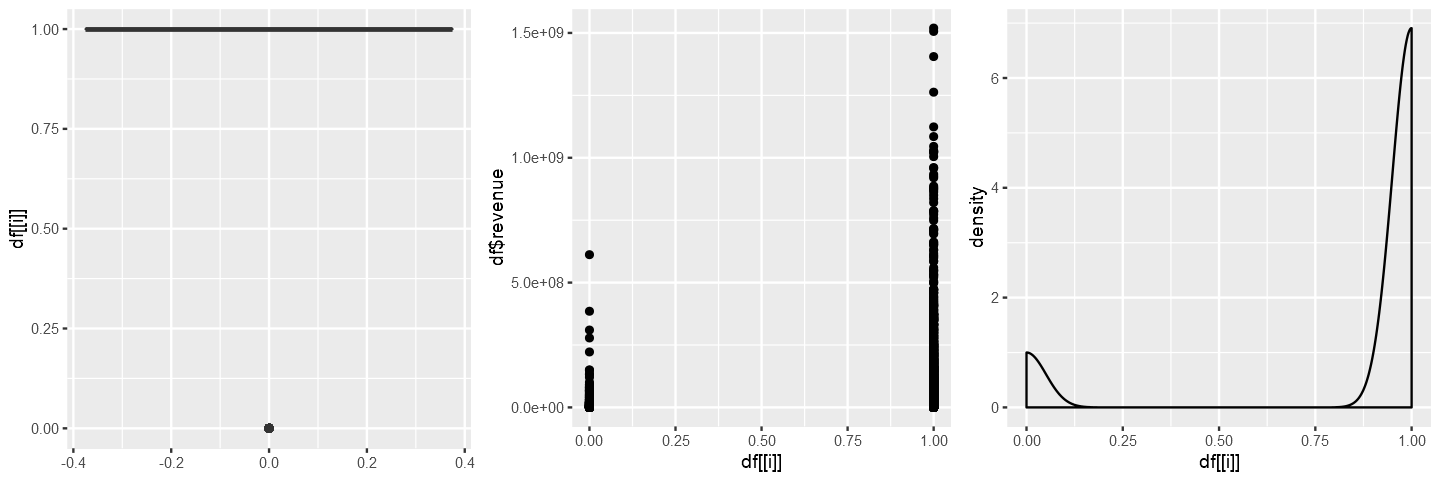

[1] "lang_RU"


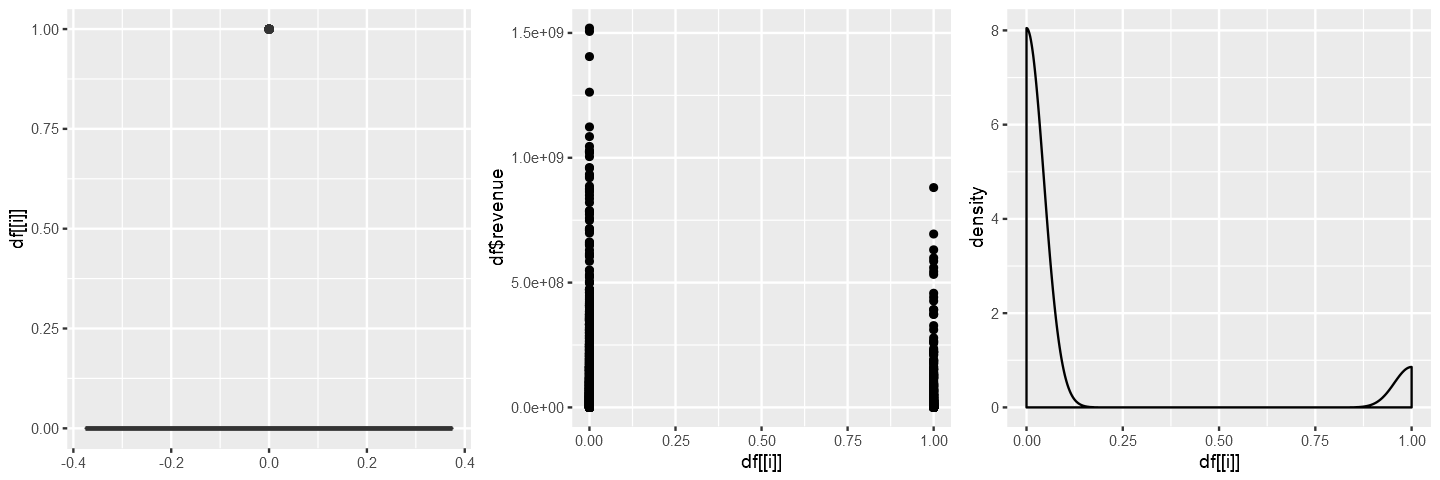

[1] "lang_ES"


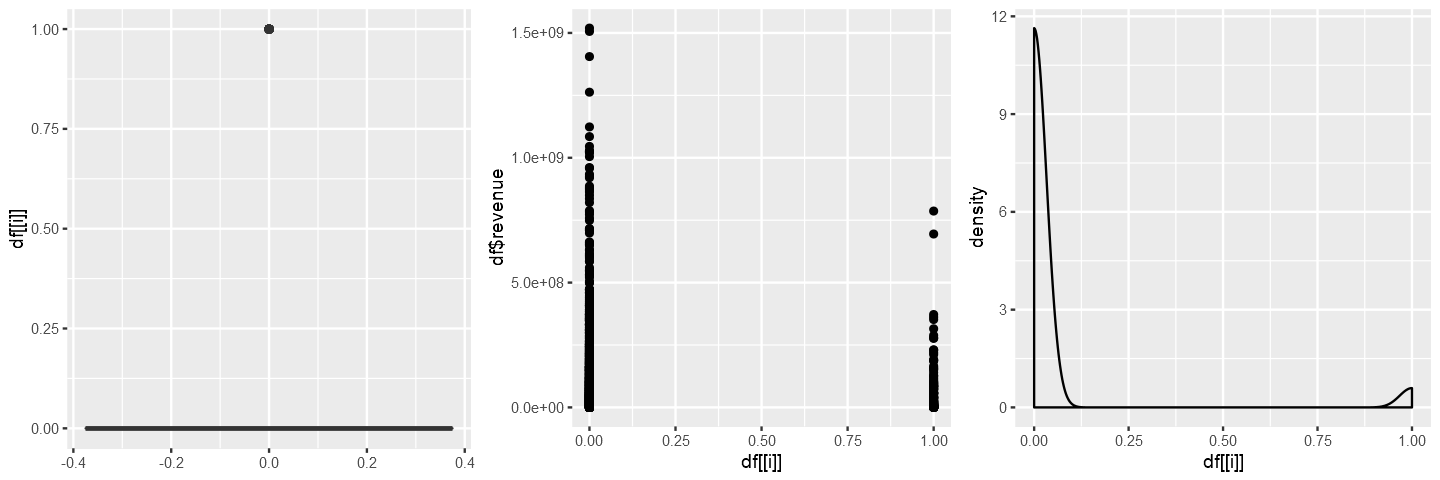

[1] "lang_JA"


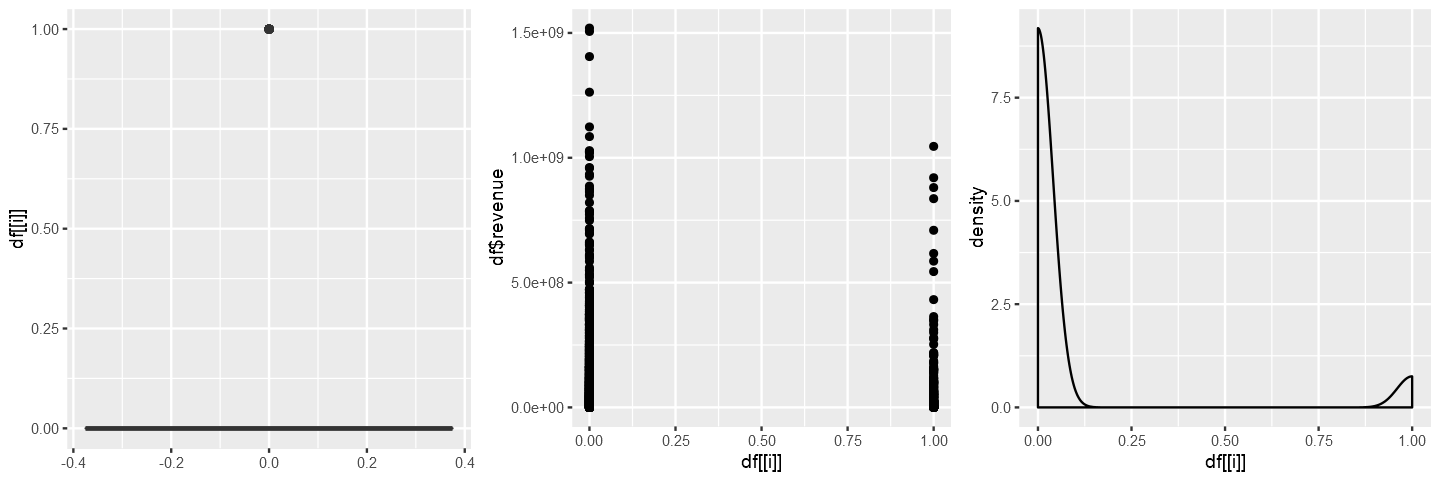

[1] "keywords_cnt"


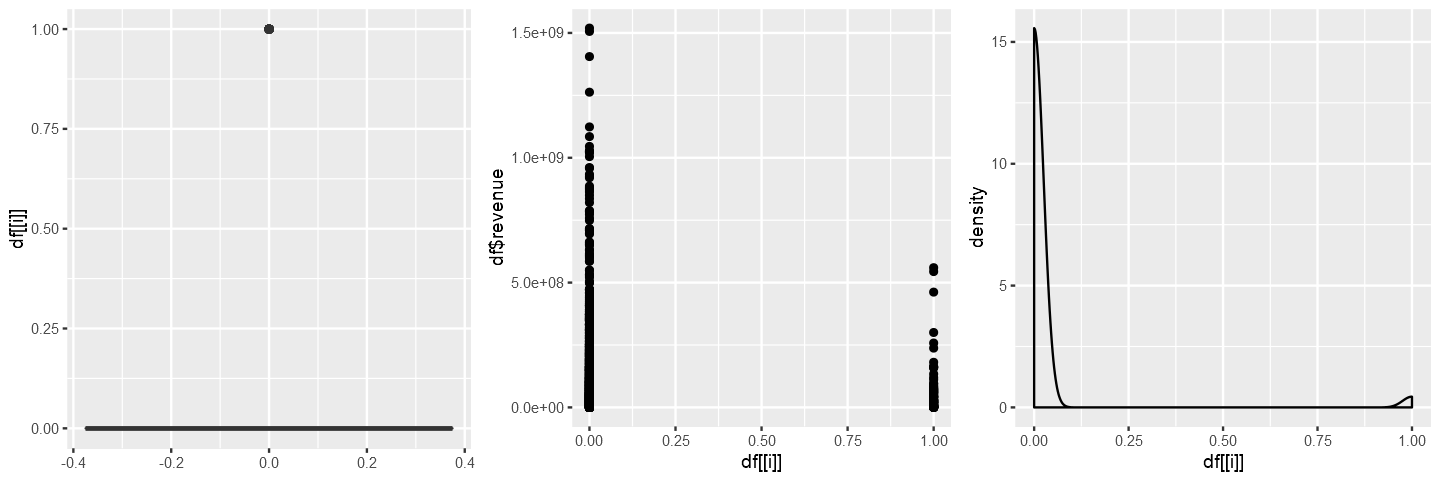

[1] "actor0_movies_cnt"


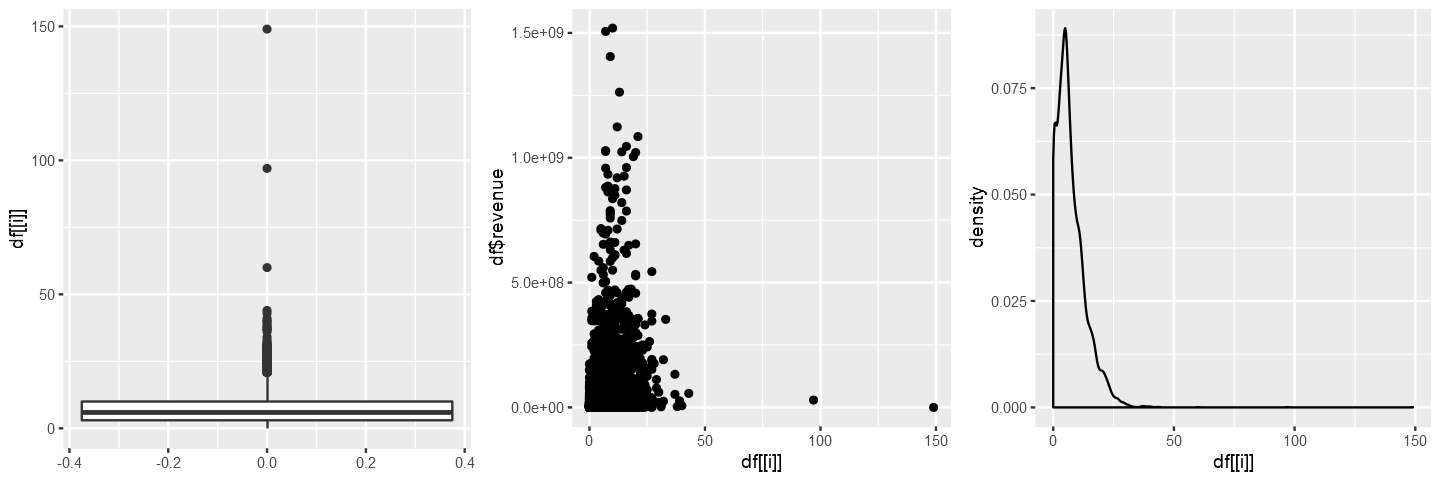

[1] "actor0_movies_5y_cnt"


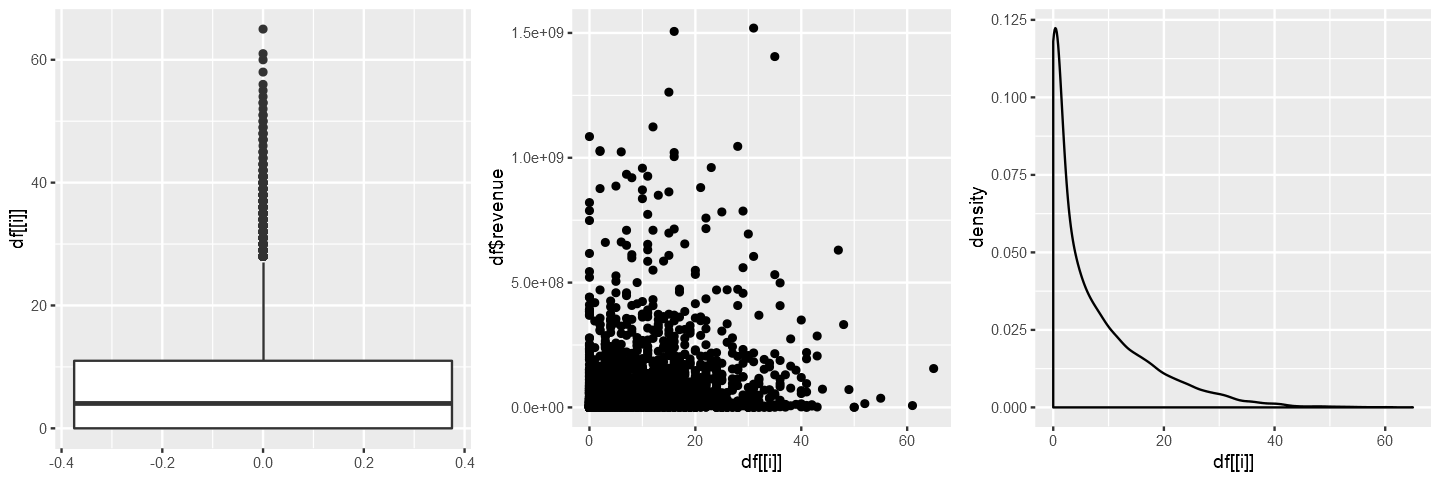

[1] "actor1_movies_cnt"


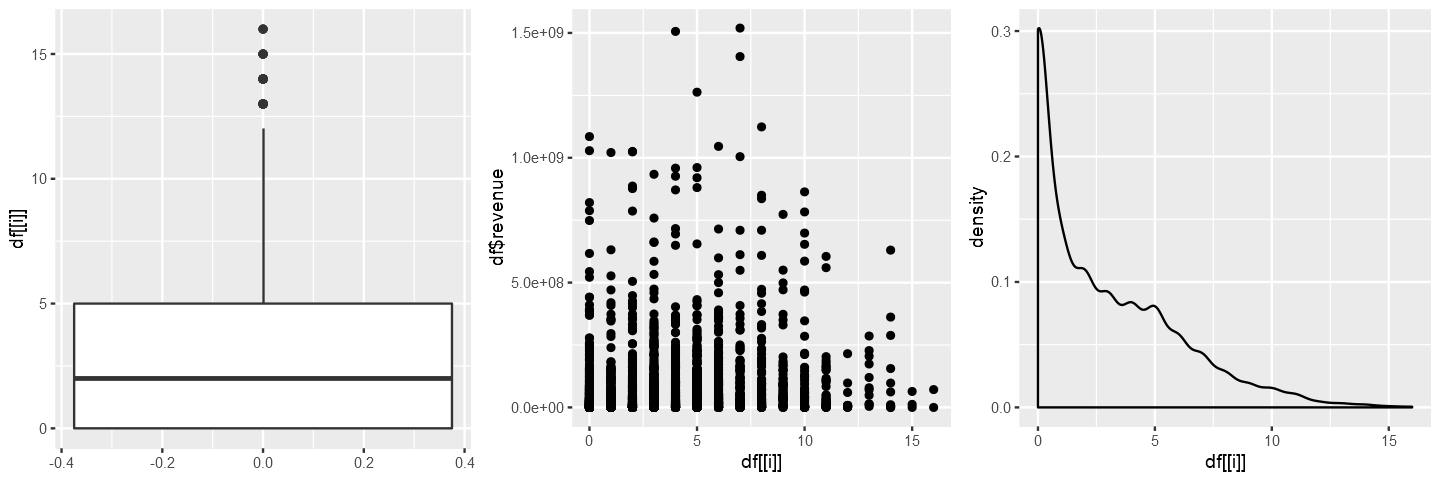

[1] "actor1_movies_5y_cnt"


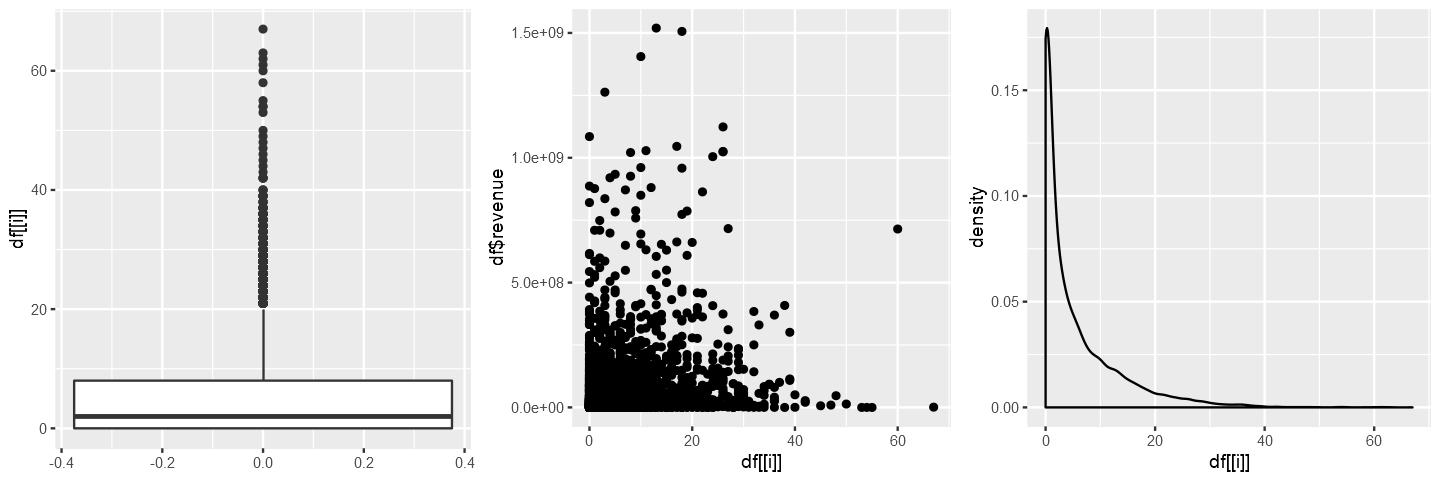

[1] "actor2_movies_cnt"


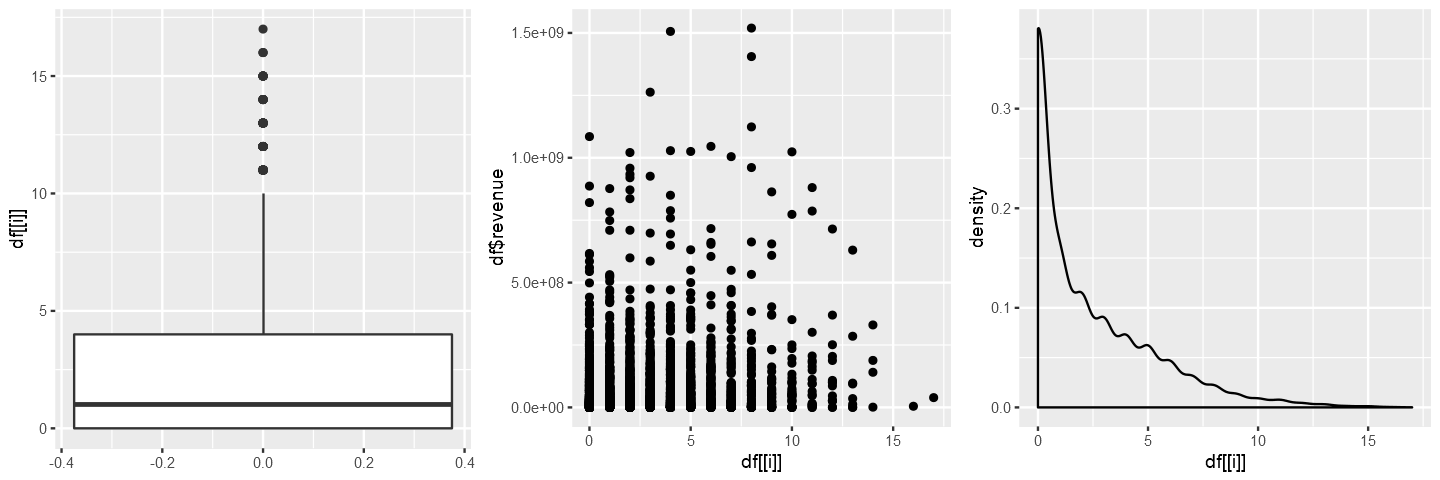

[1] "actor2_movies_5y_cnt"


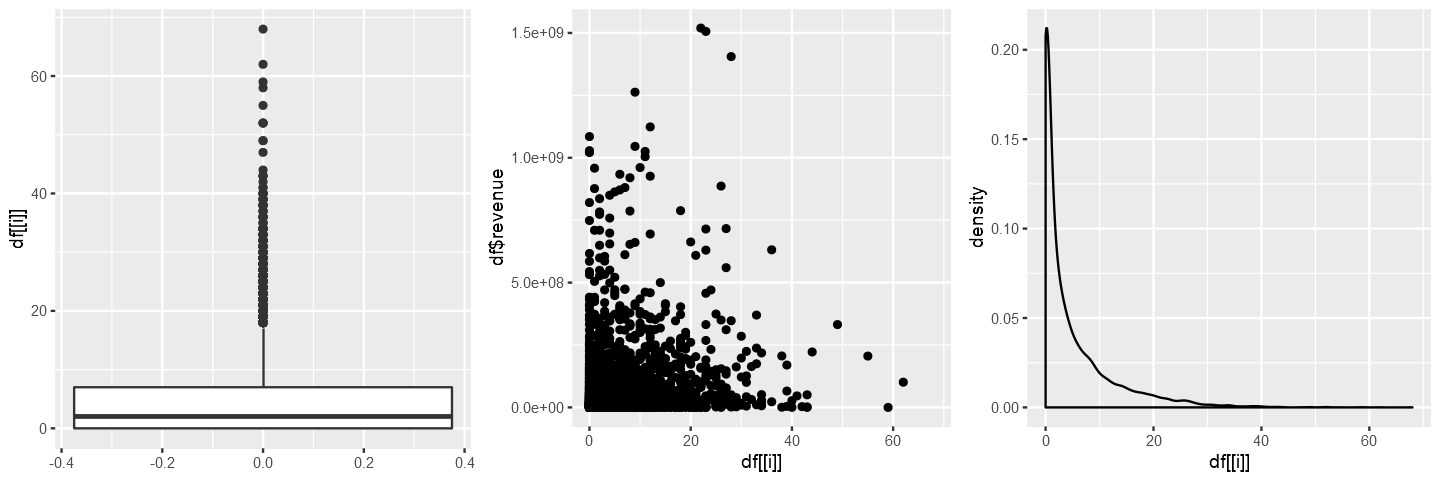

[1] "sw_female_actor0"


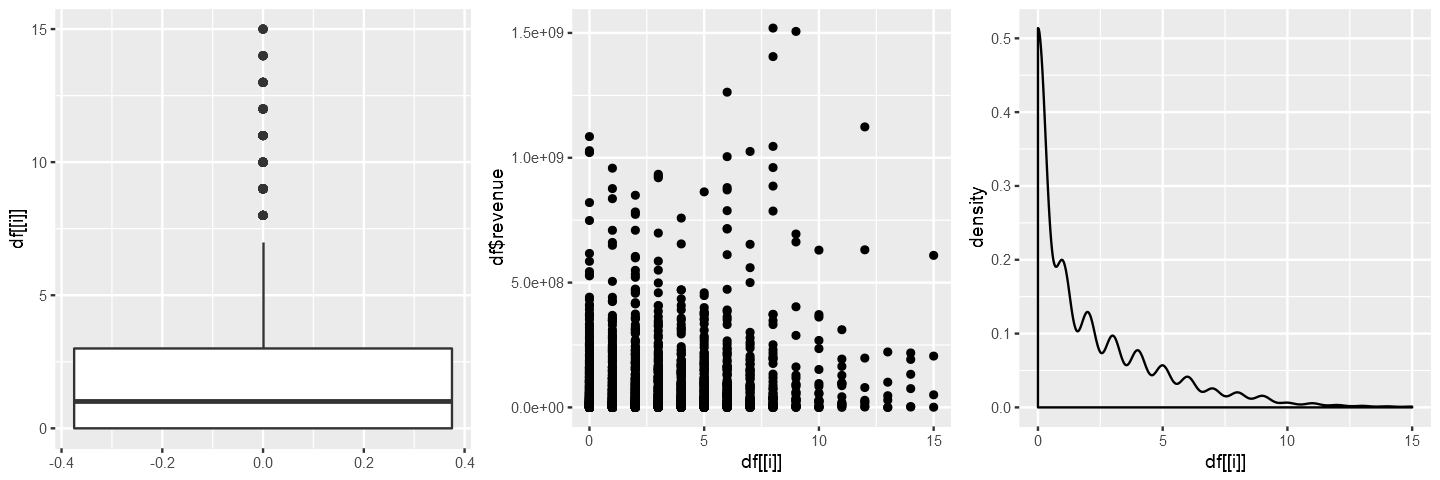

[1] "sw_female_actor1"


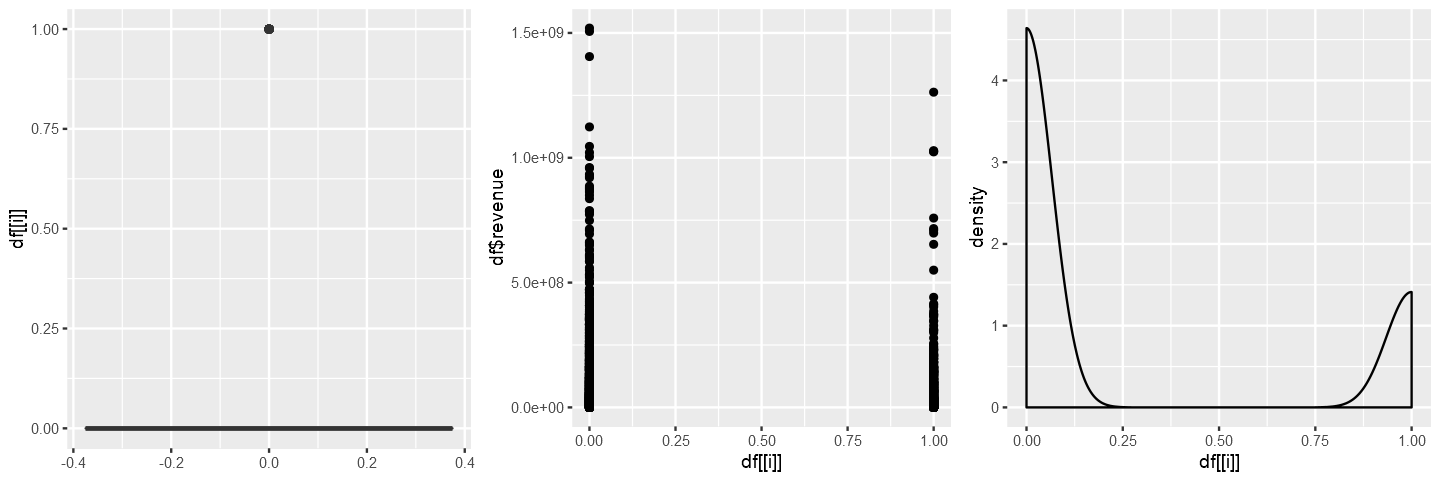

[1] "sw_female_actor2"


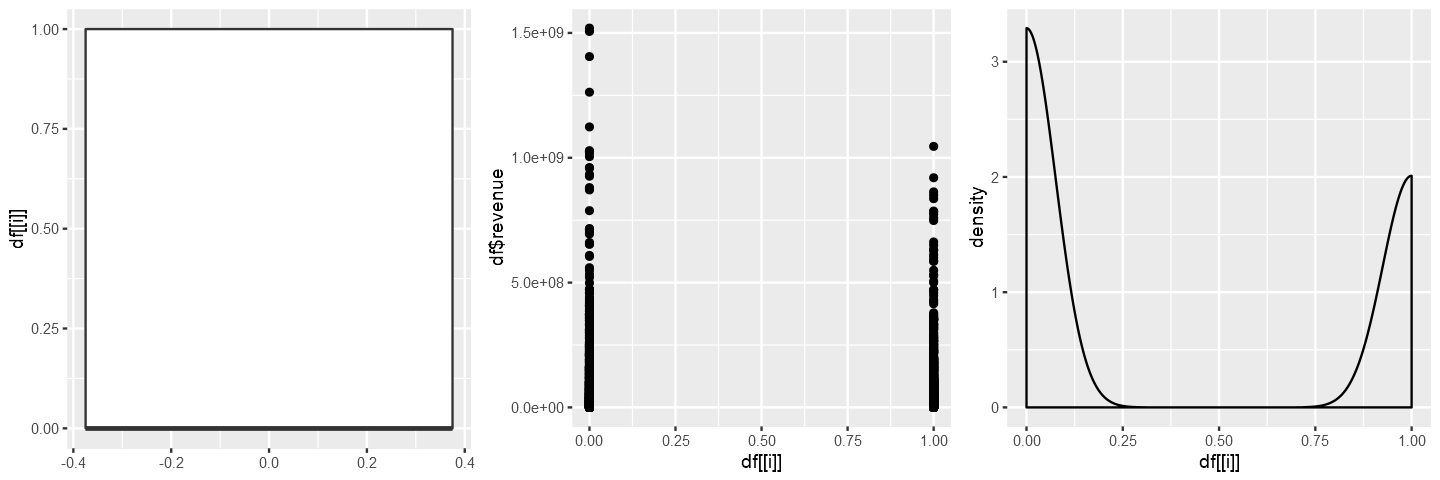

[1] "sw_male_actor0"


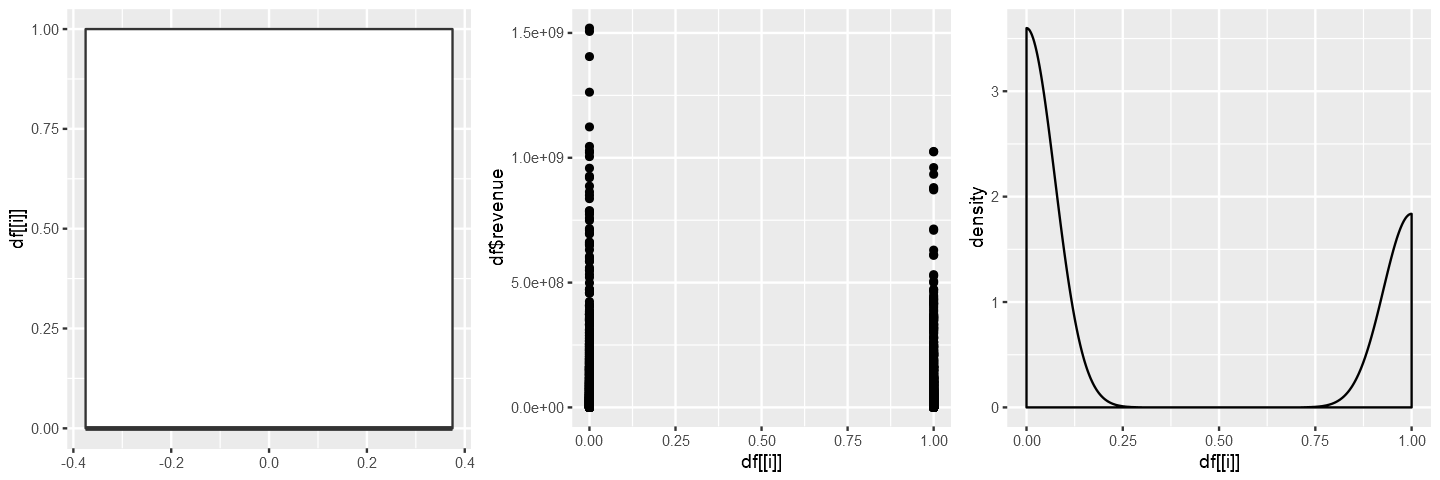

[1] "sw_male_actor1"


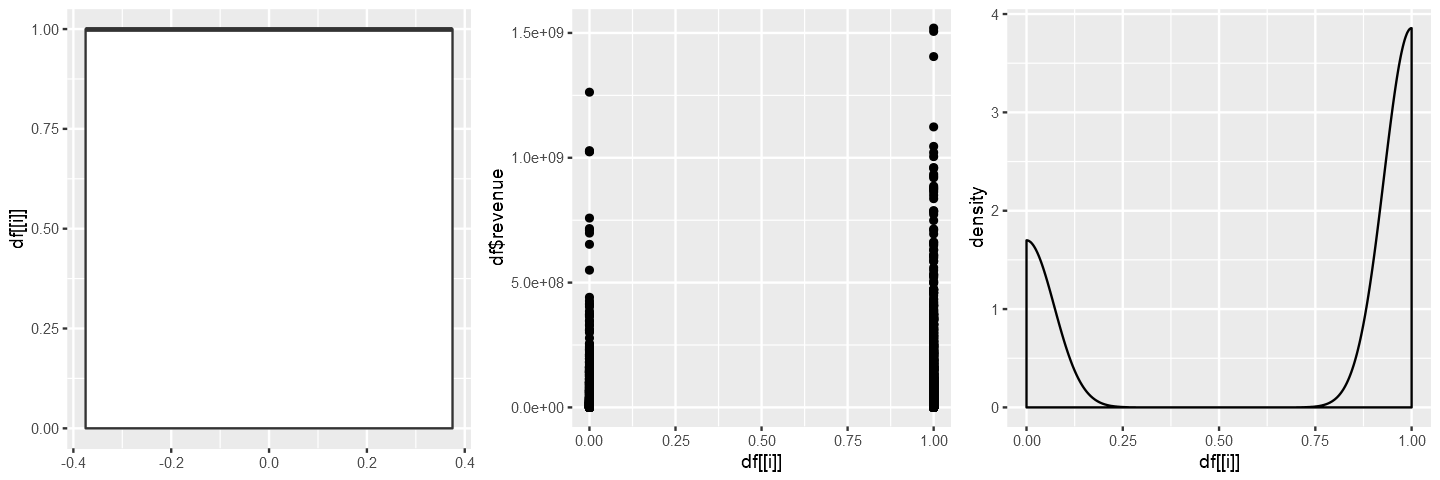

[1] "sw_male_actor2"


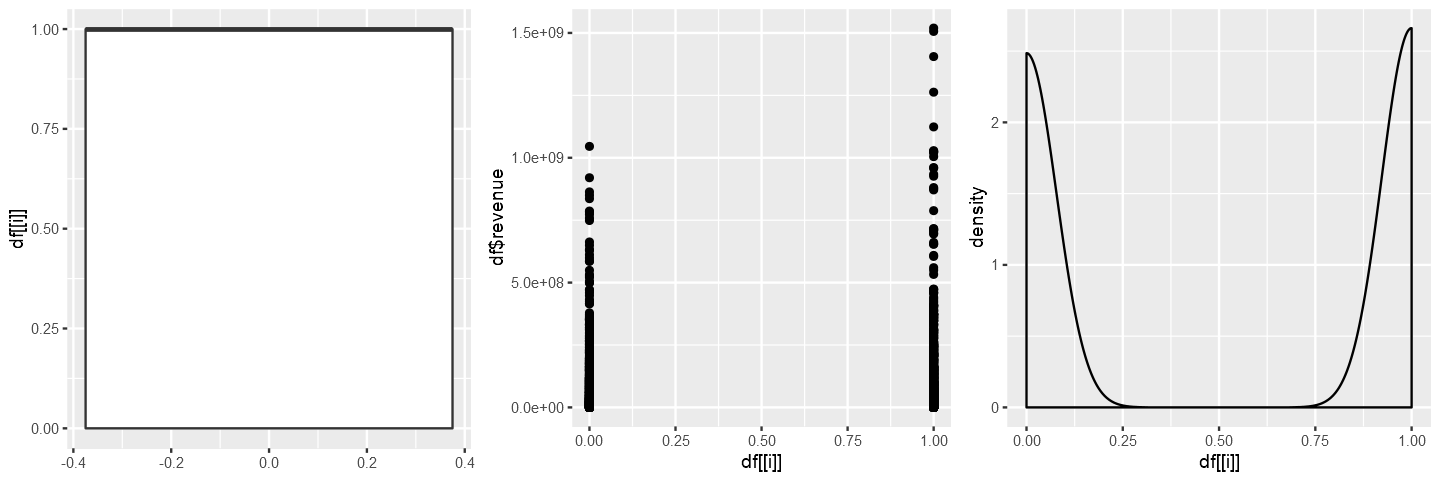

[1] "actor0_prev_revenue"


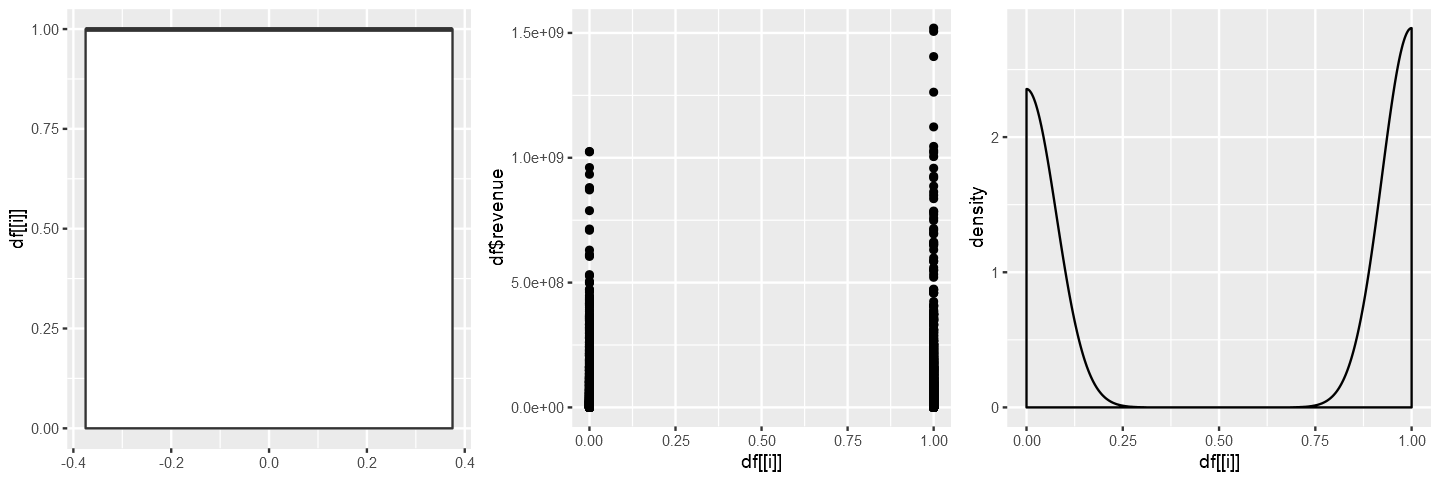

[1] "actor1_prev_revenue"


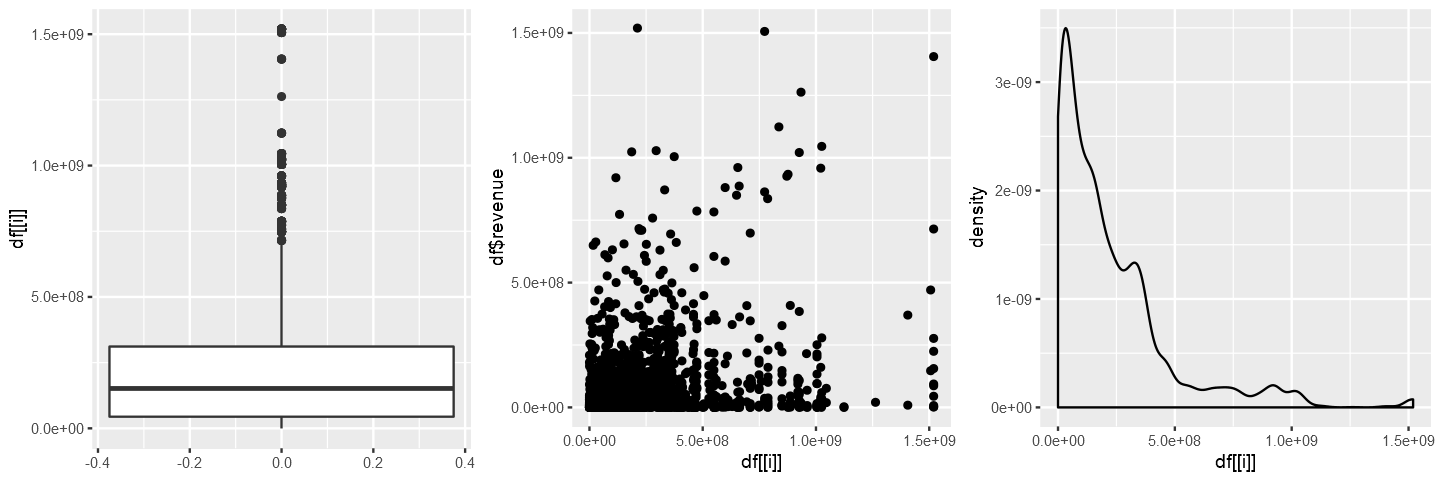

[1] "actor2_prev_revenue"


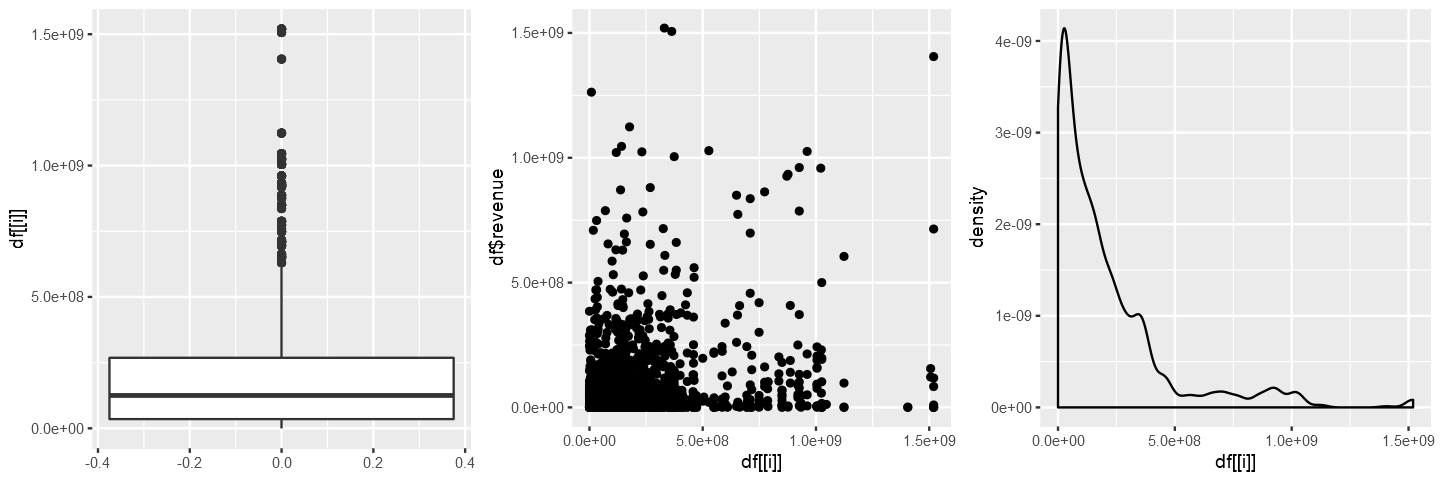

[1] "director_movies_cnt"


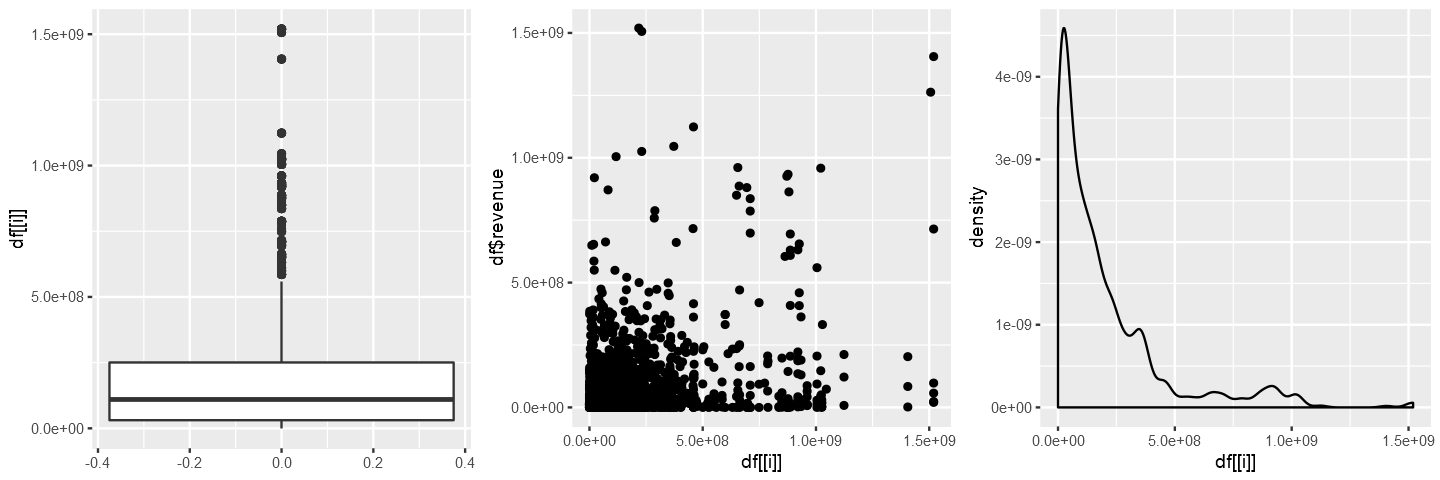

[1] "director_movies_5y_cnt"


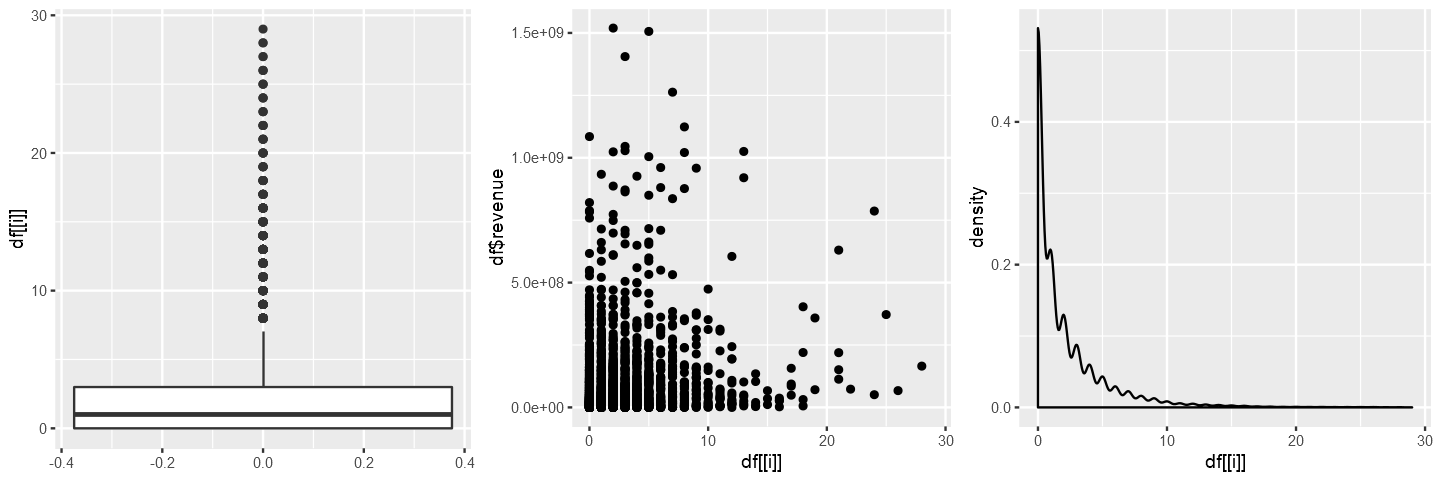

[1] "genre_adventure"


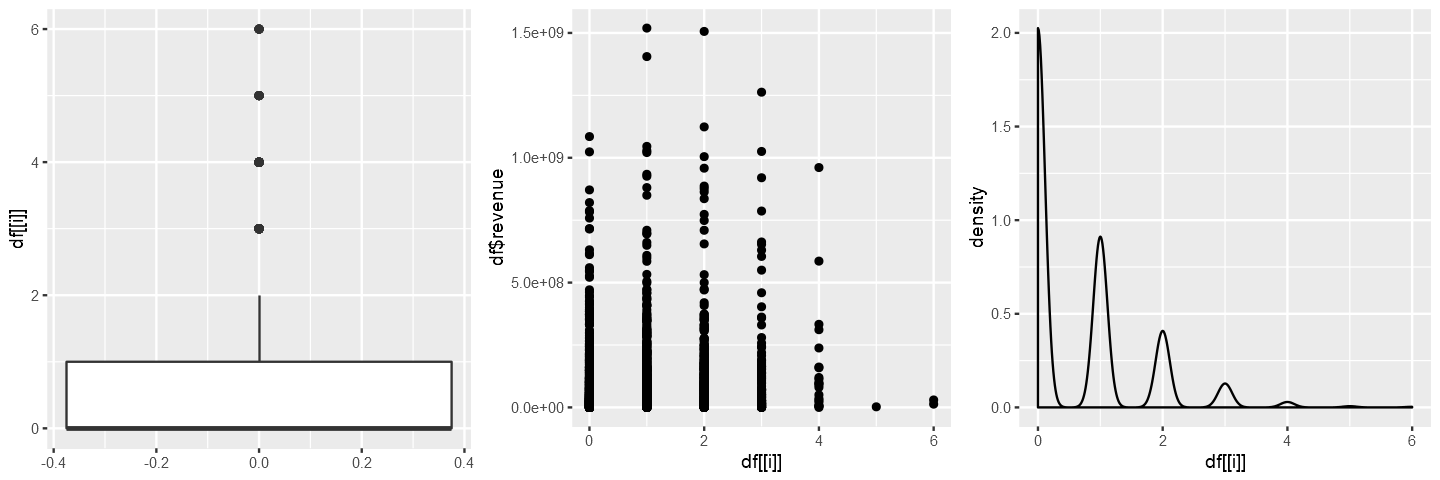

[1] "genre_fantasy"


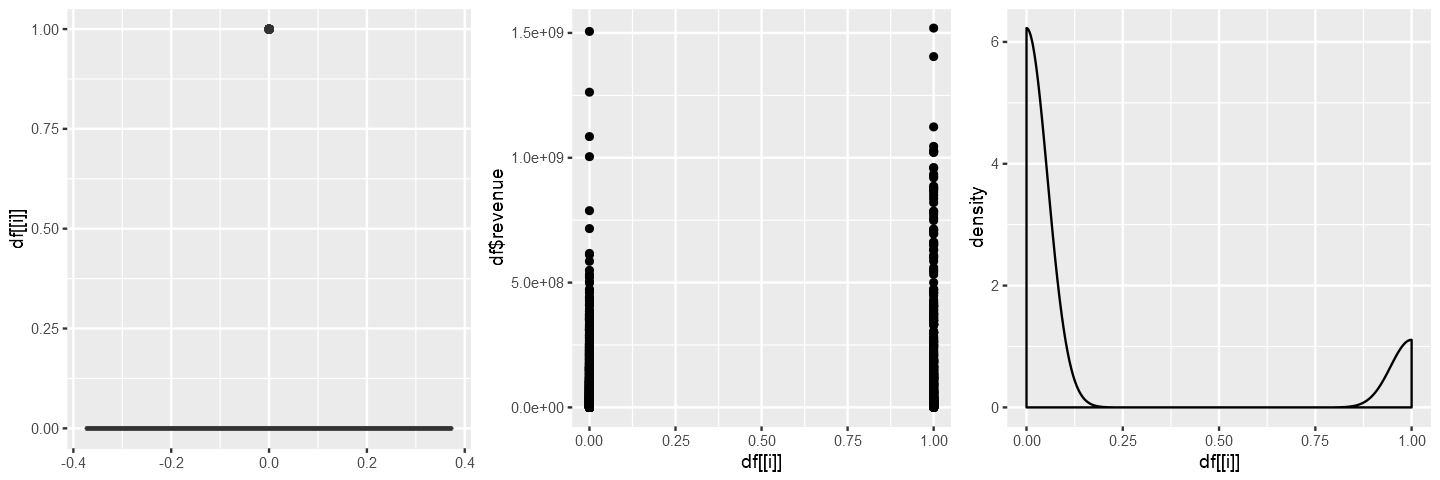

[1] "genre_animation"


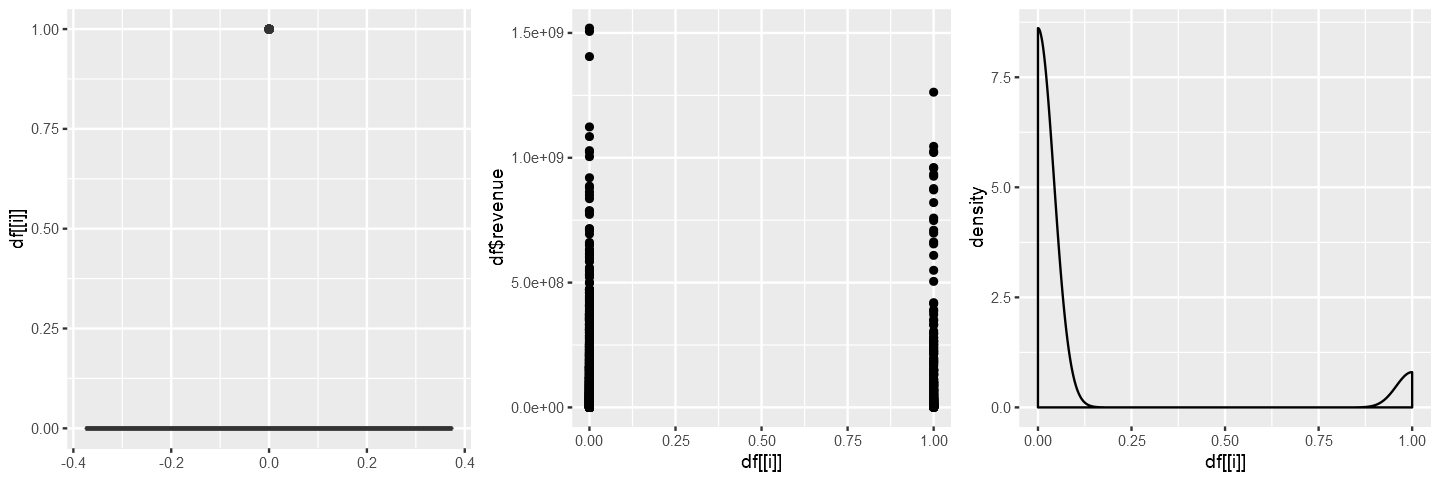

[1] "genre_drama"


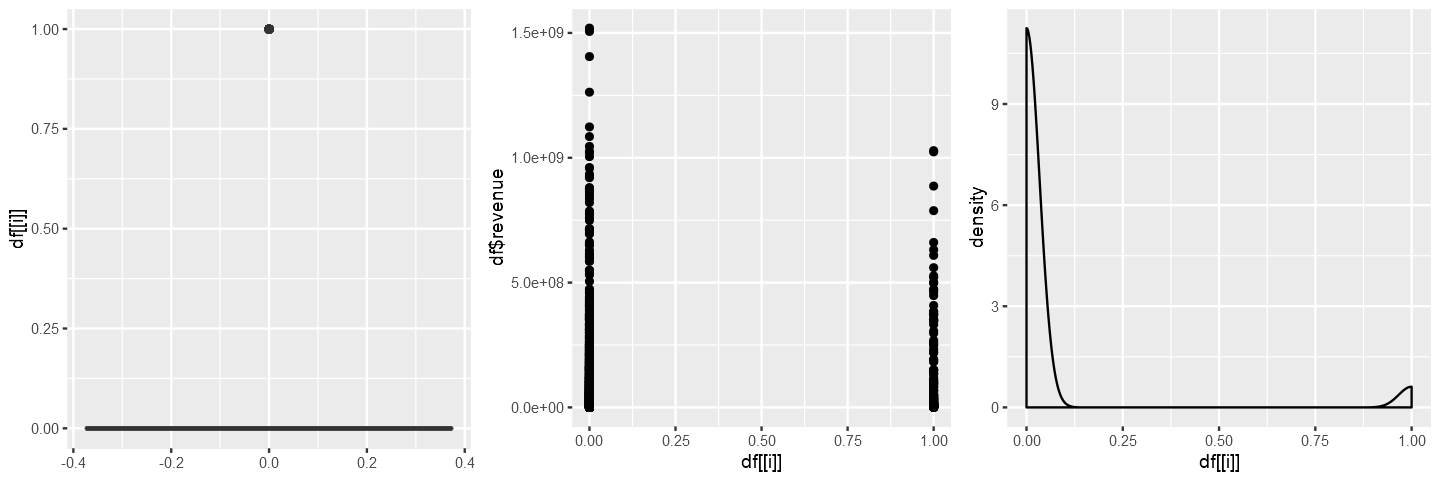

[1] "genre_horror"


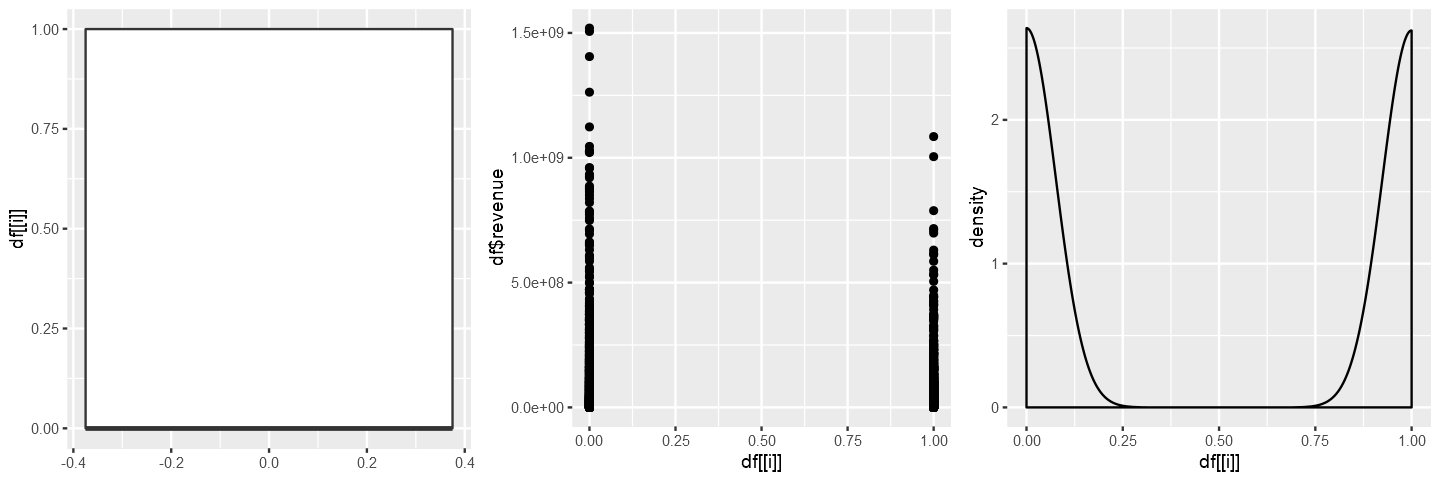

[1] "genre_action"


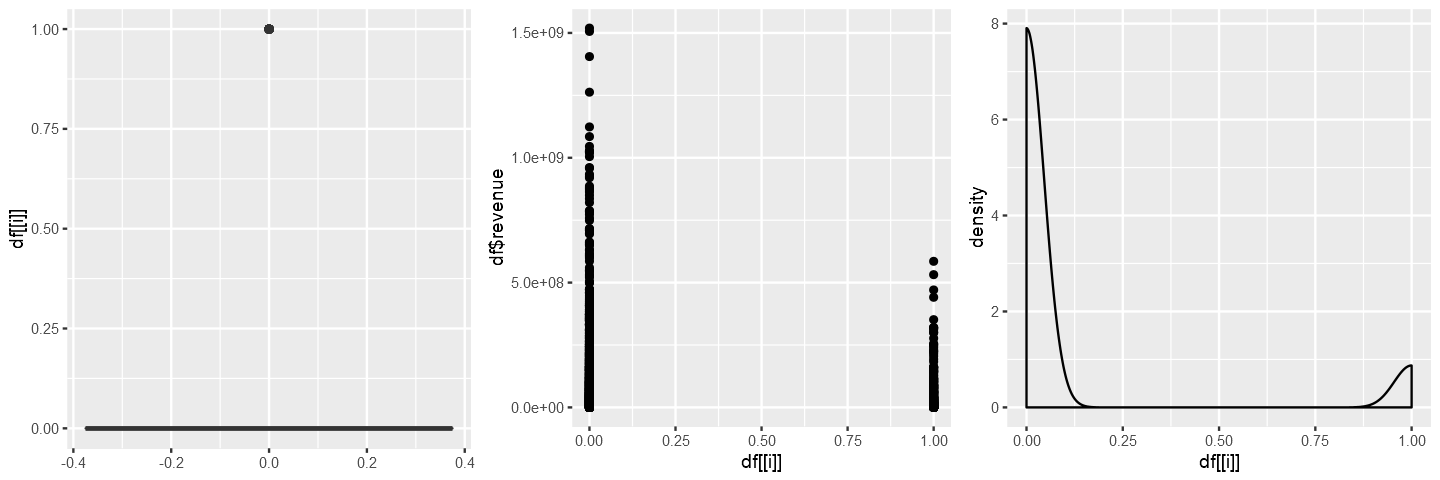

[1] "genre_comedy"


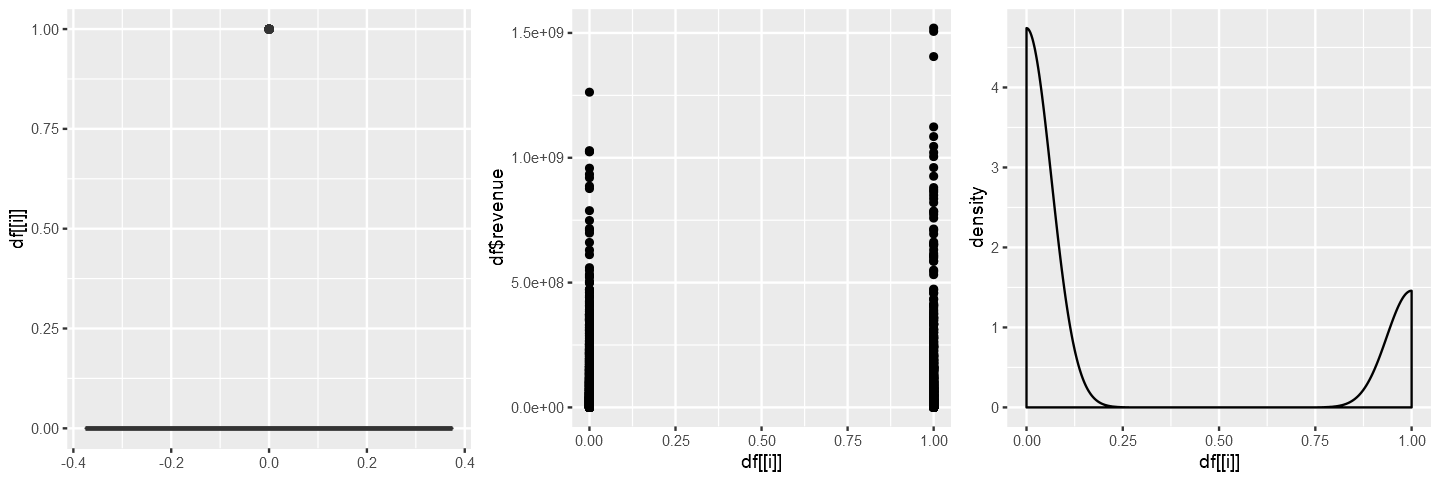

[1] "genre_history"


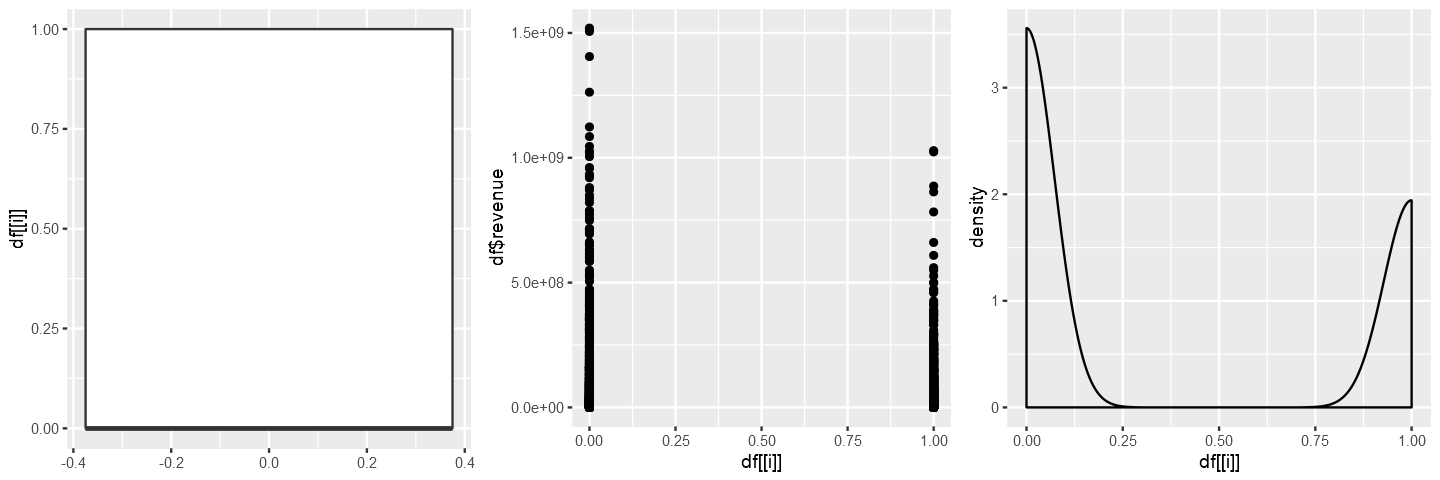

[1] "genre_western"


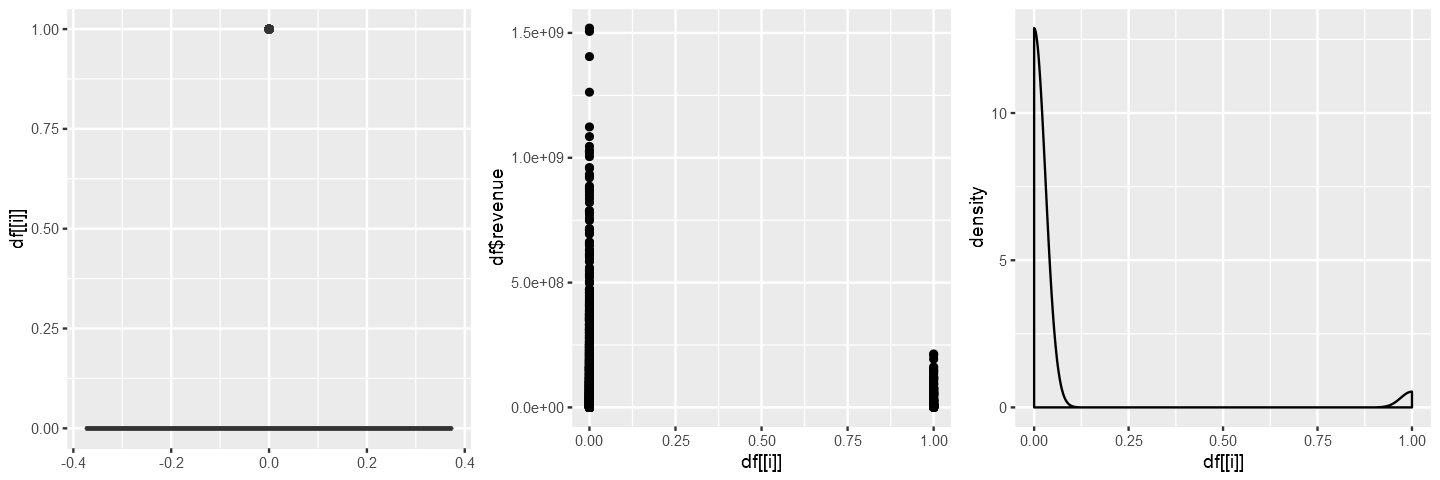

[1] "genre_thriller"


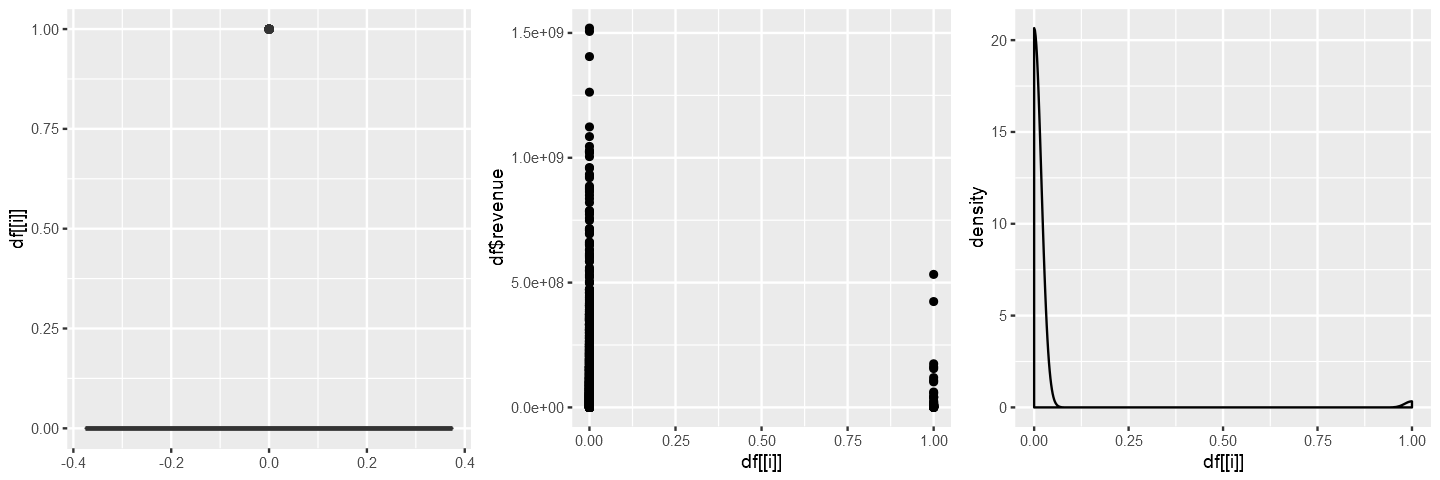

[1] "genre_crime"


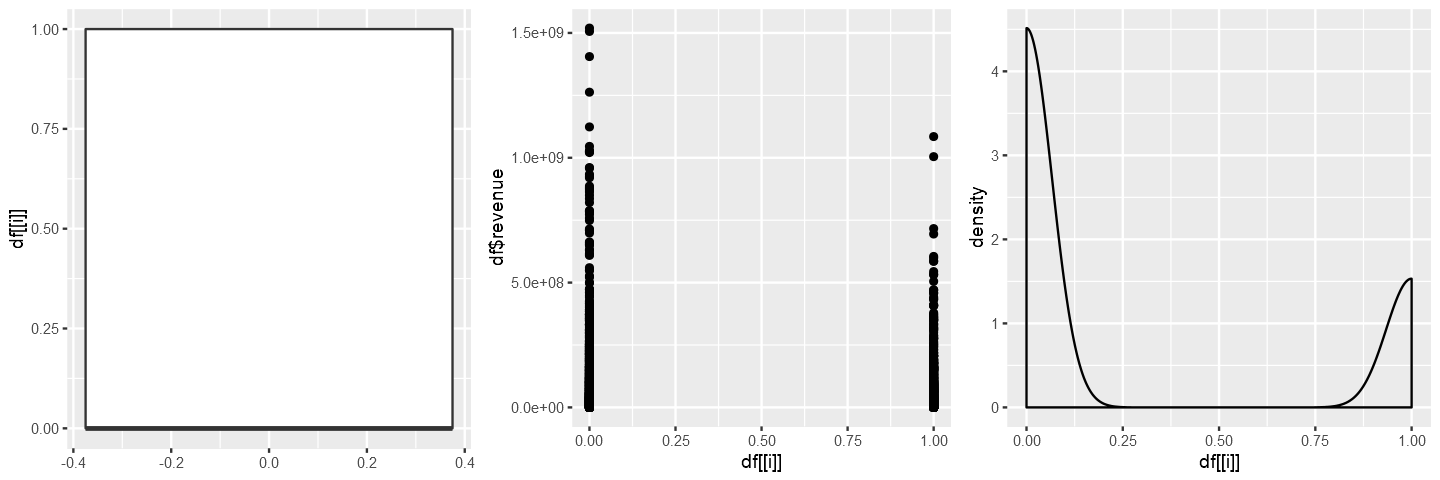

[1] "genre_documentary"


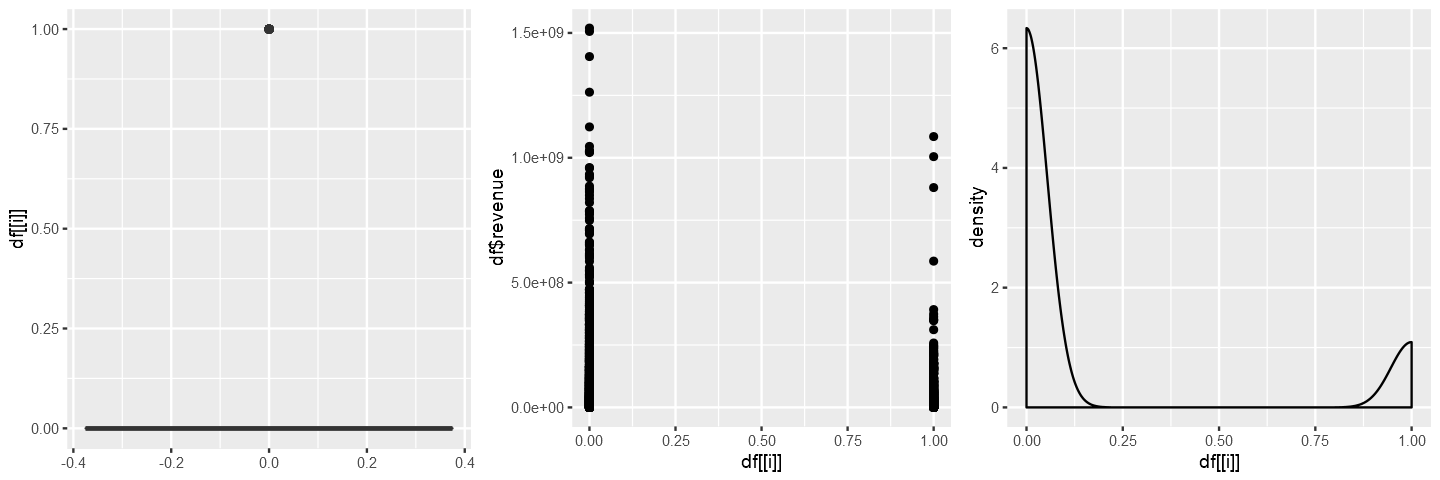

[1] "genre_science_fiction"


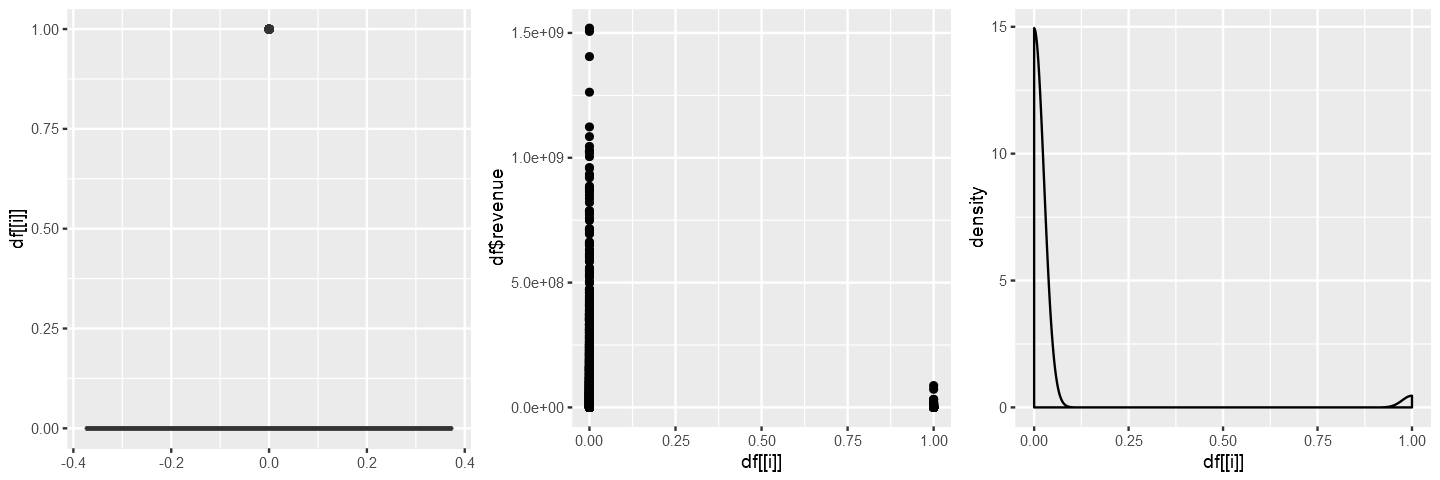

[1] "genre_mystery"


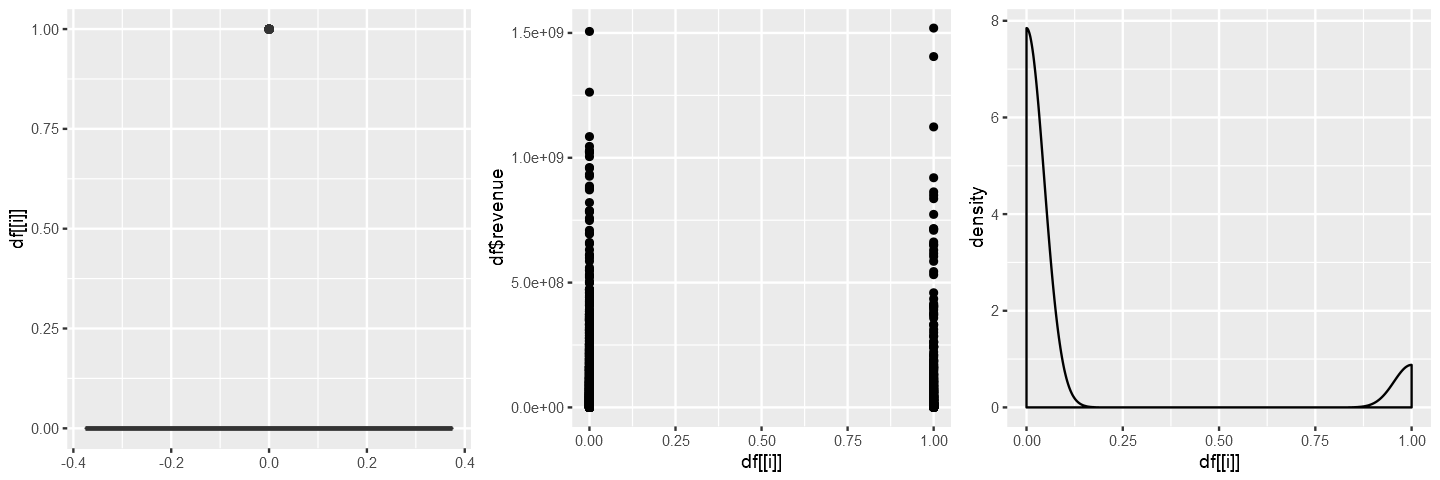

[1] "genre_music"


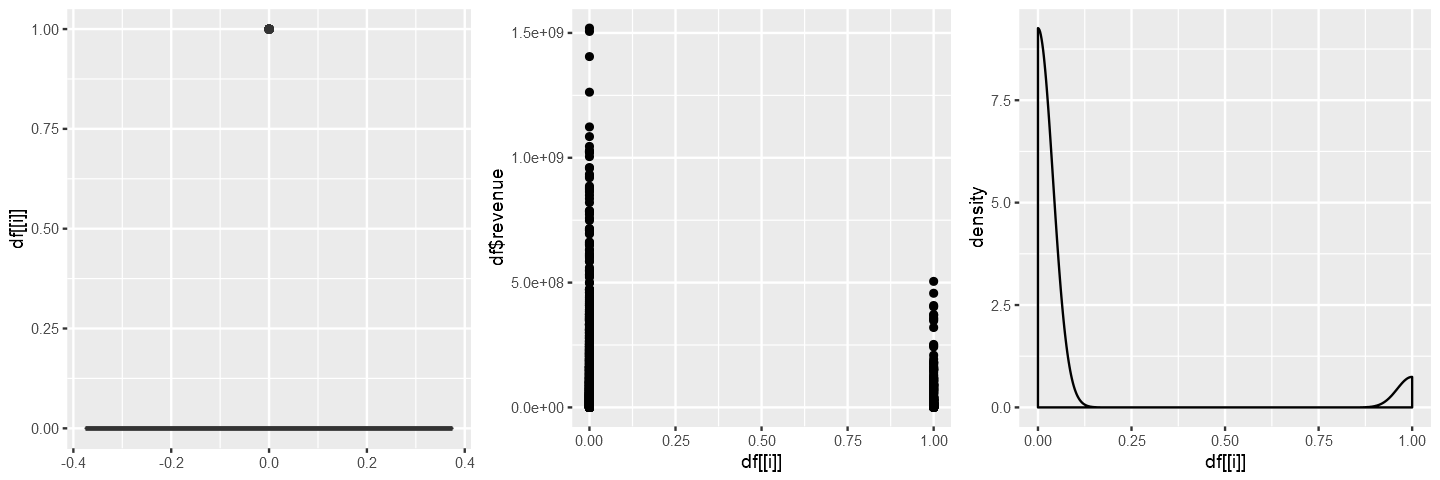

[1] "genre_romance"


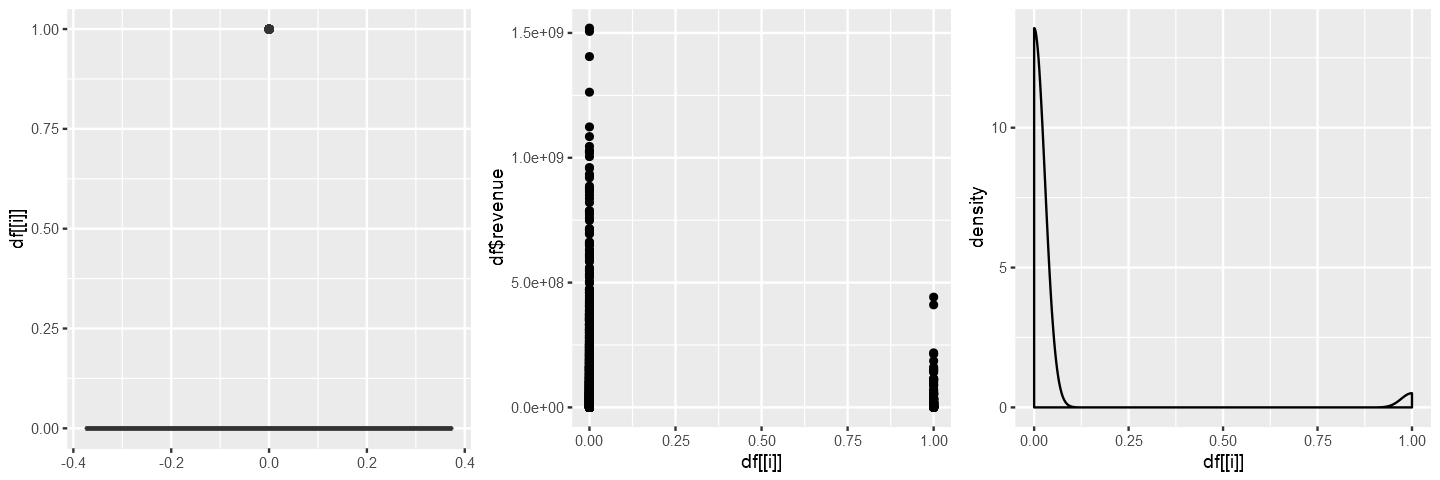

[1] "genre_family"


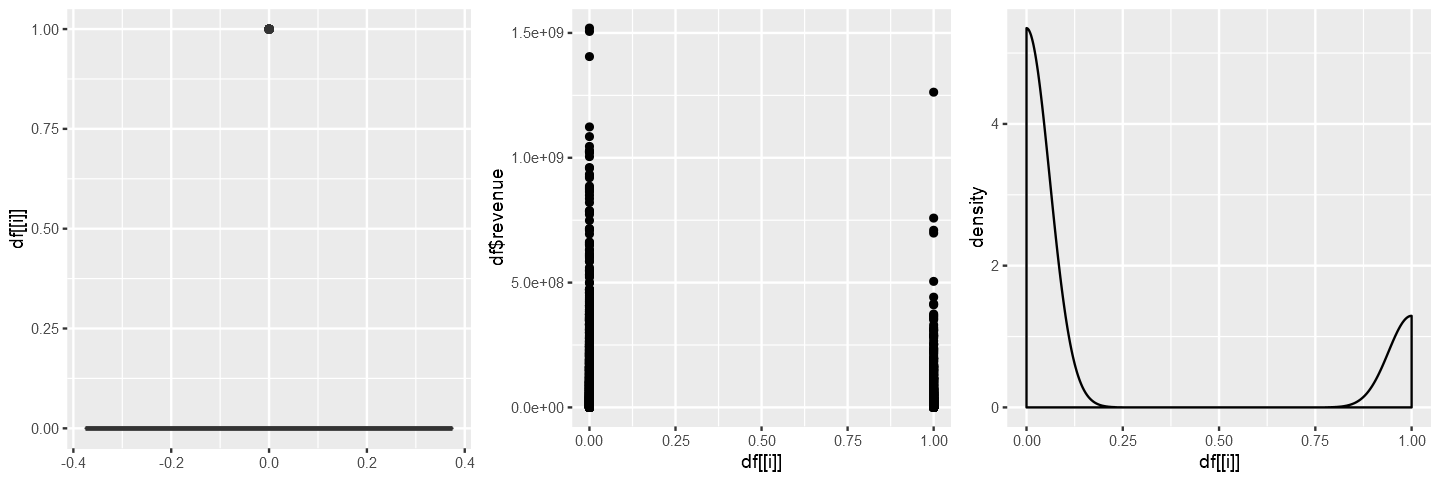

[1] "genre_war"


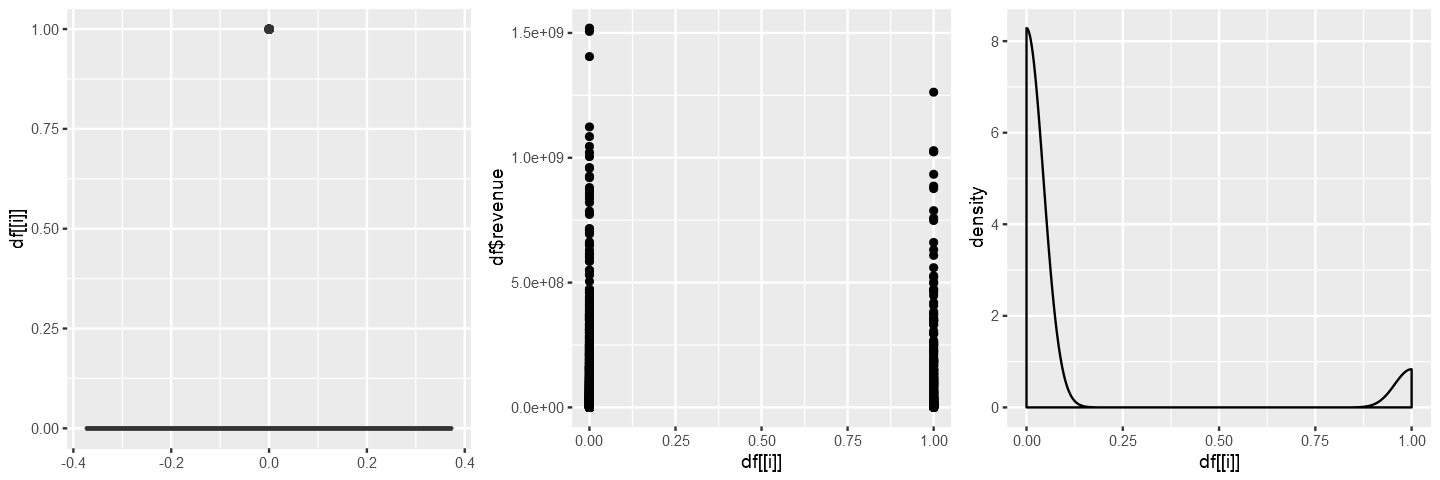

[1] "genre_foreign"


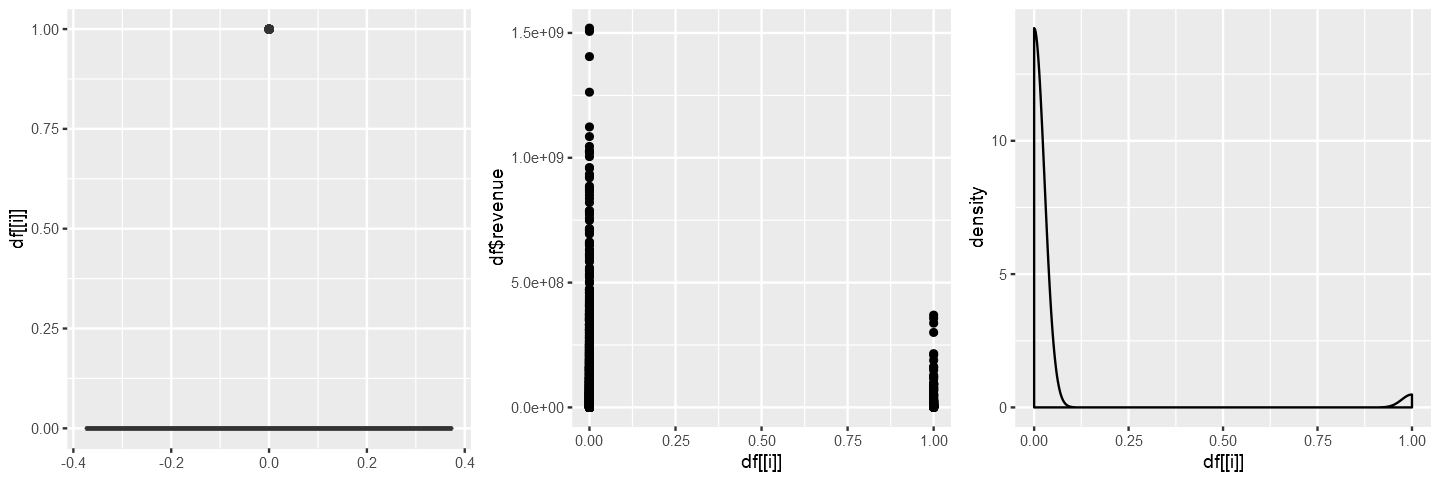

[1] "depart_Art"


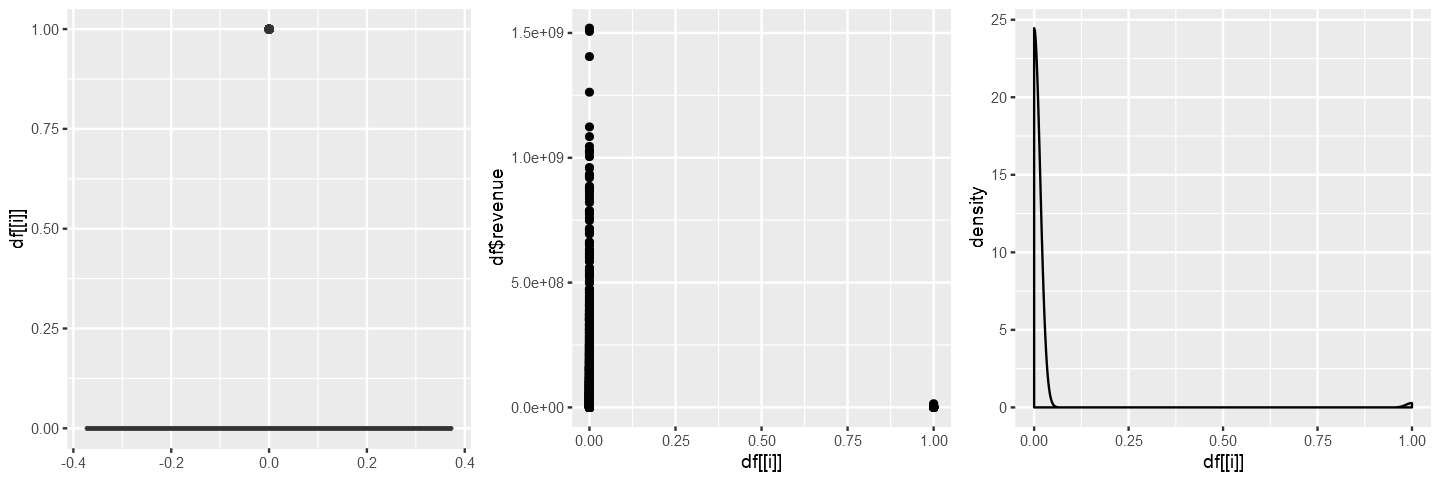

[1] "depart_Camera"


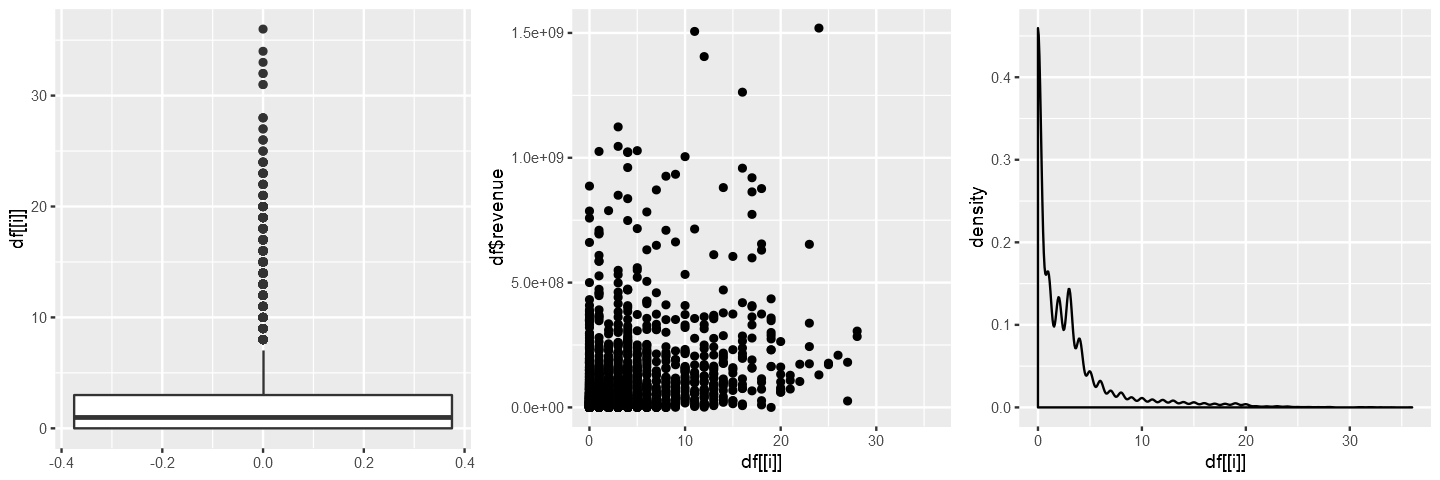

[1] "depart_Crew"


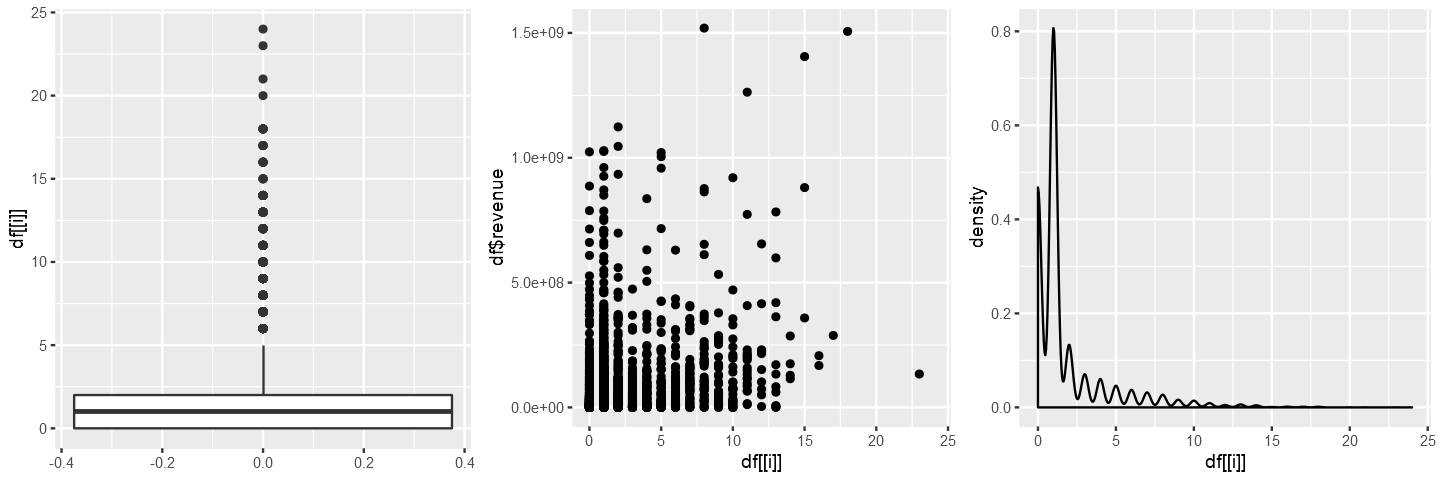

[1] "depart_Custom_Mkup"


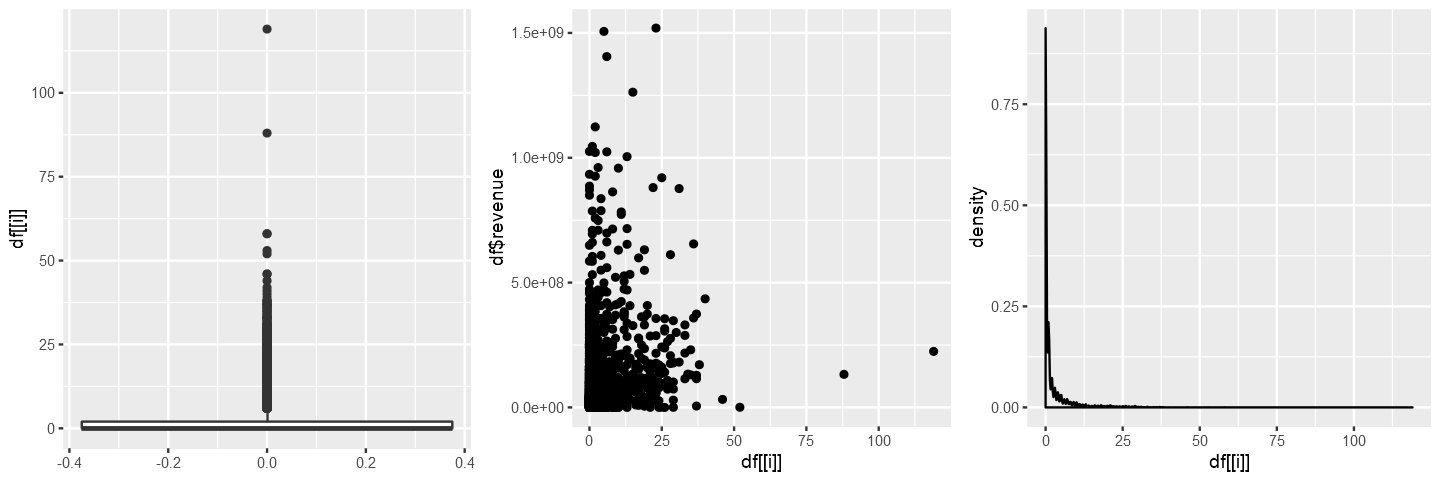

[1] "depart_Directing"


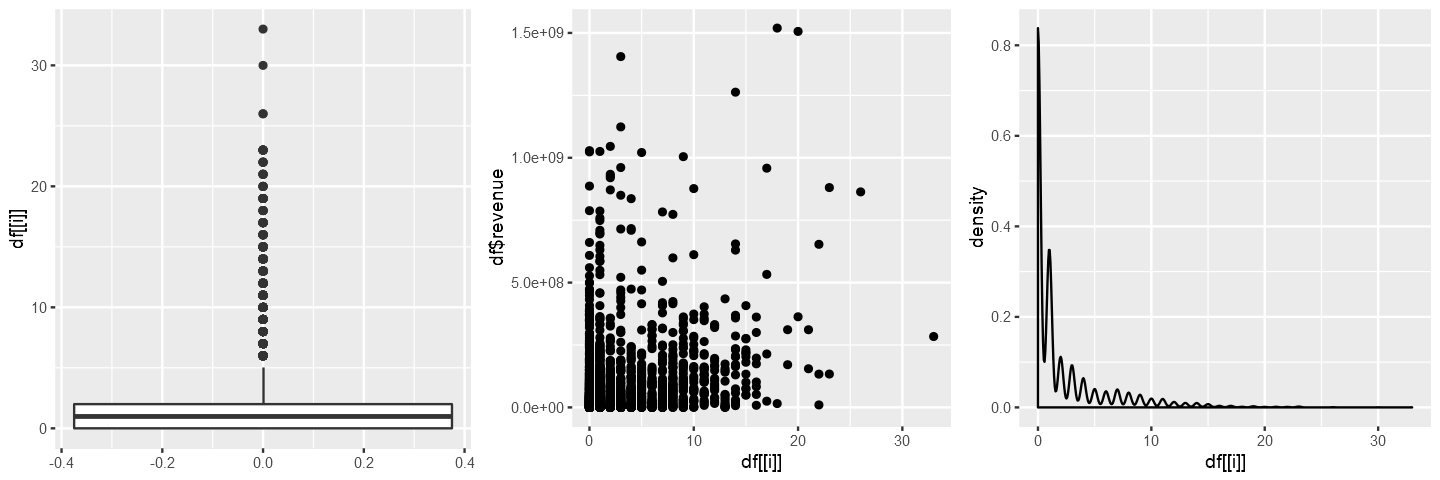

[1] "depart_Editing"


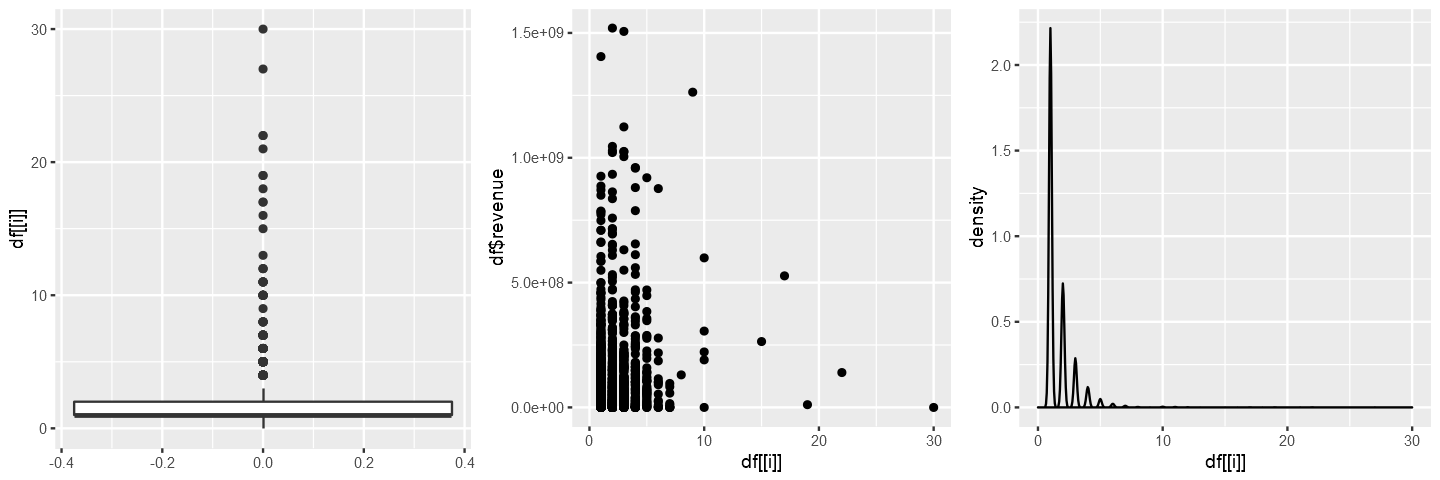

[1] "depart_Lighting"


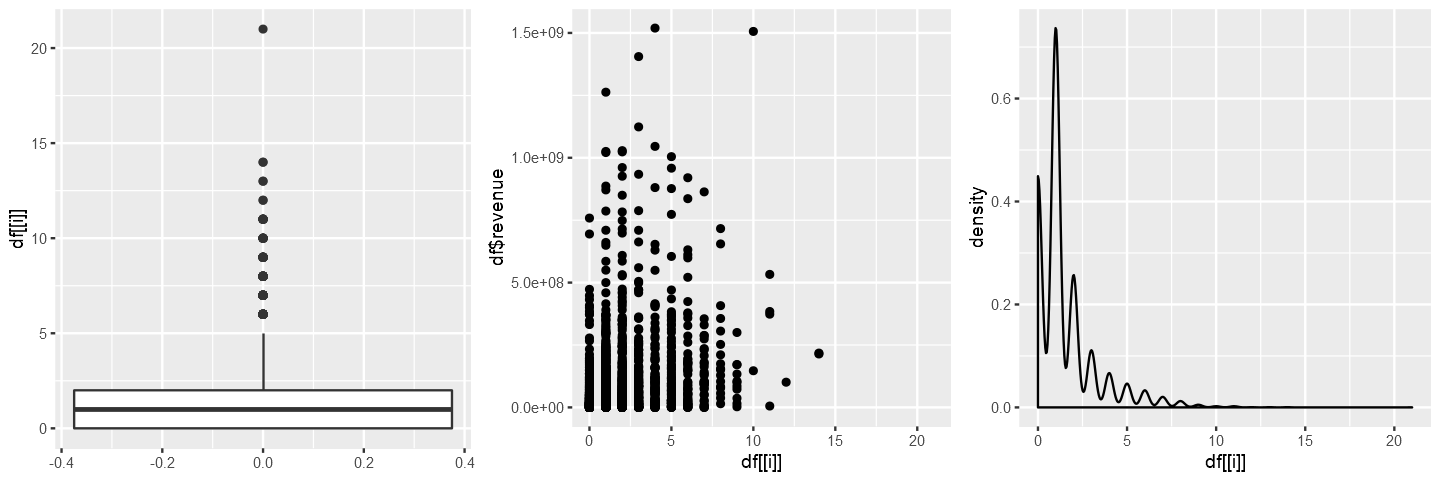

[1] "depart_Production"


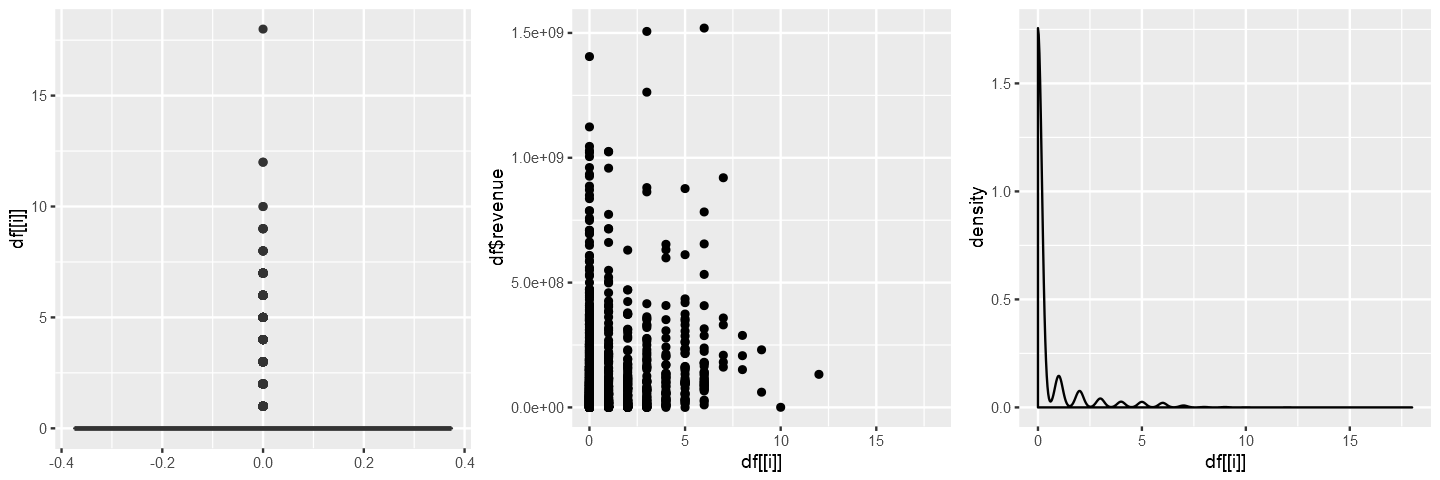

[1] "depart_Sound"


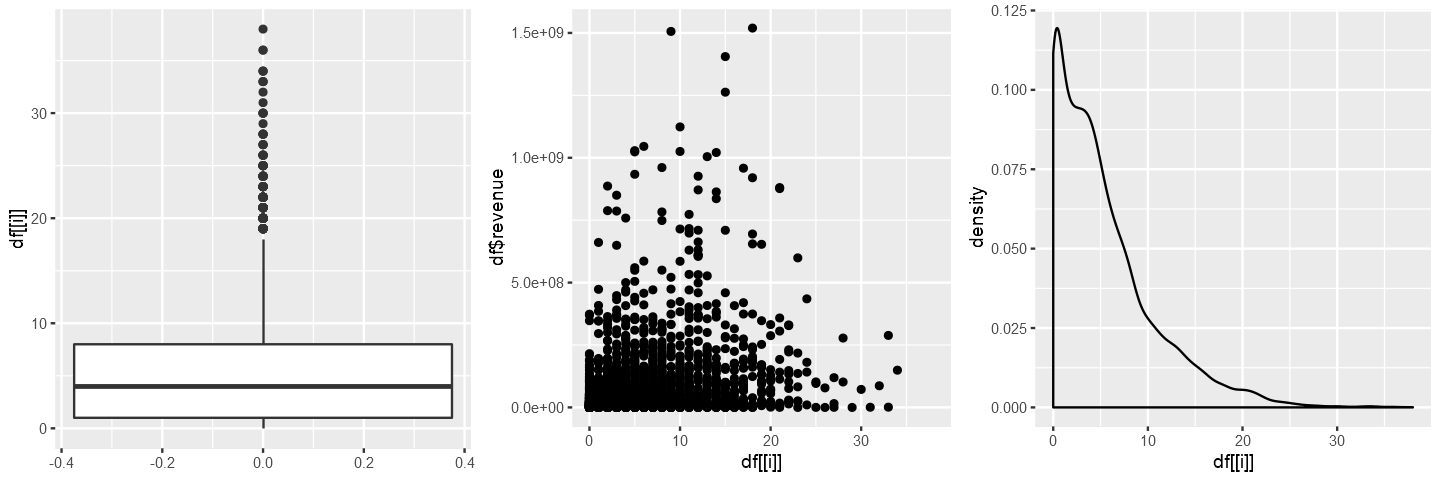

[1] "depart_Visual_Effects"


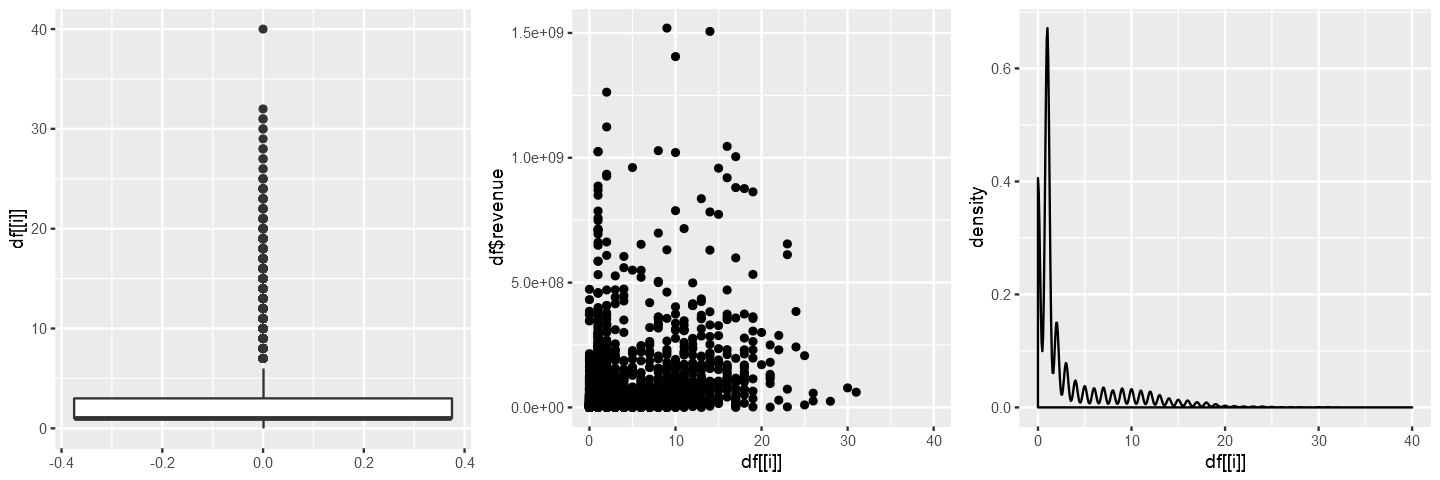

[1] "depart_Writing"


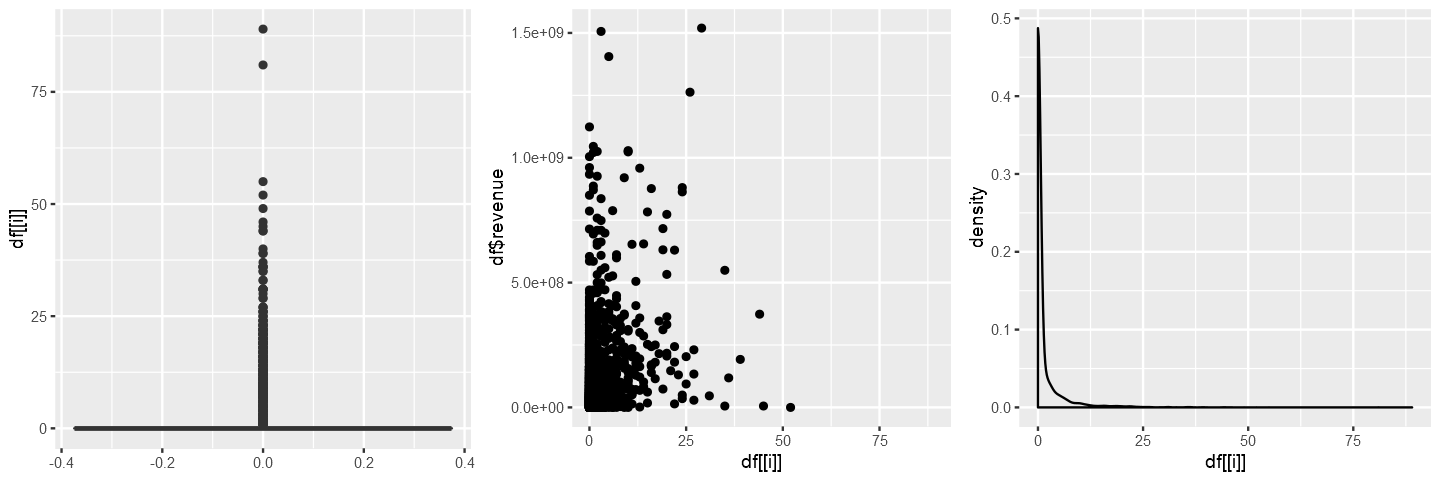

[1] "depart_Art_female"


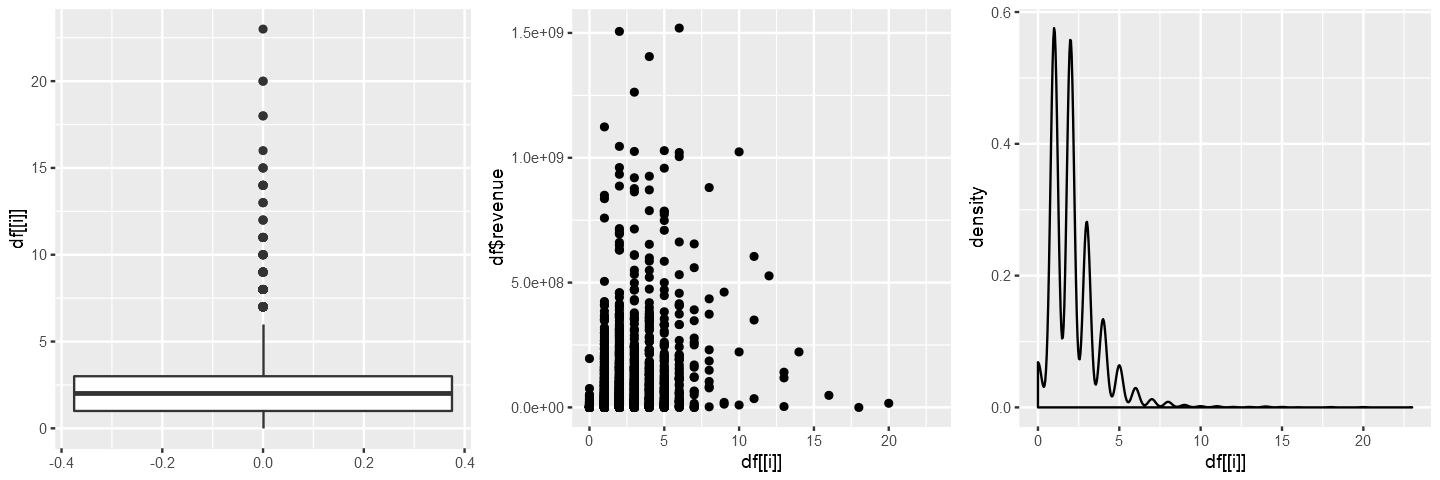

[1] "depart_Camera_female"


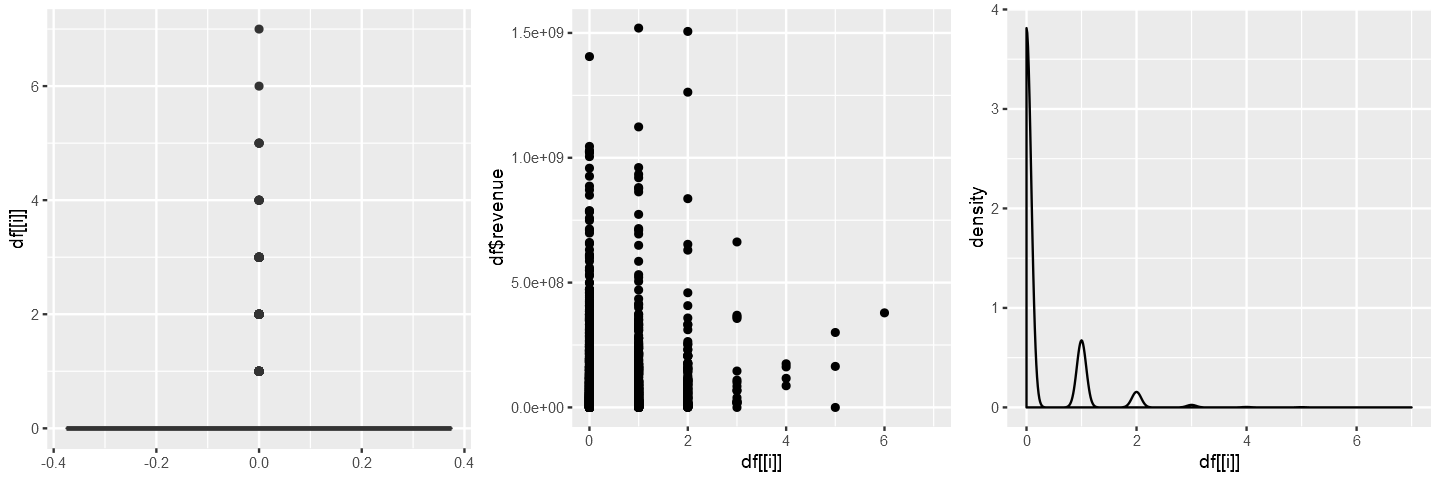

[1] "depart_Crew_female"


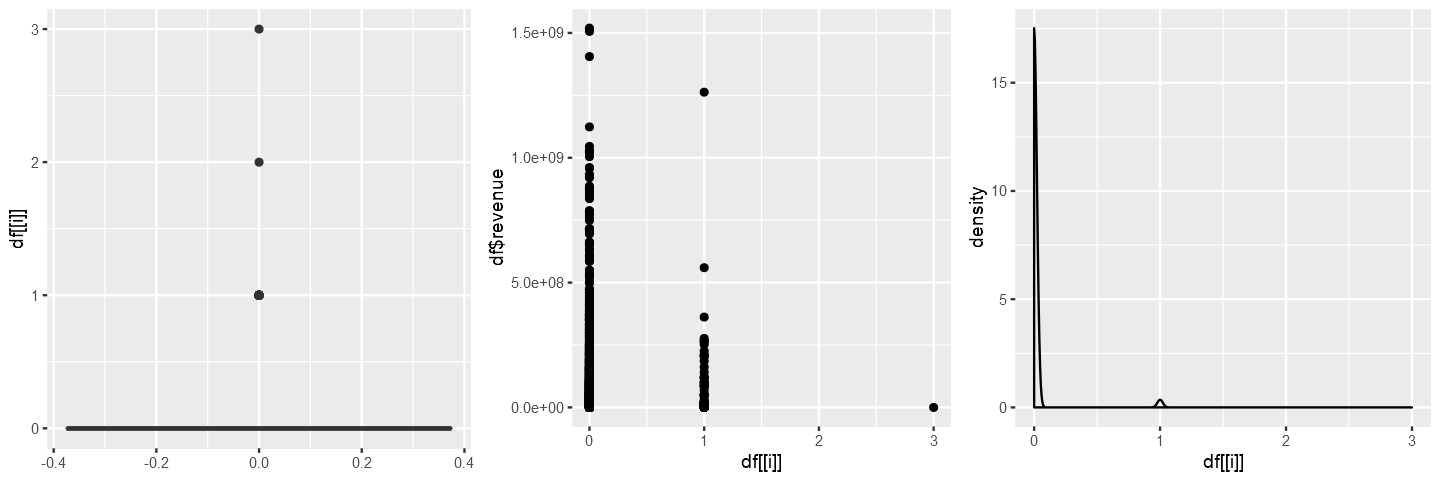

[1] "depart_Custom_Mkup_female"


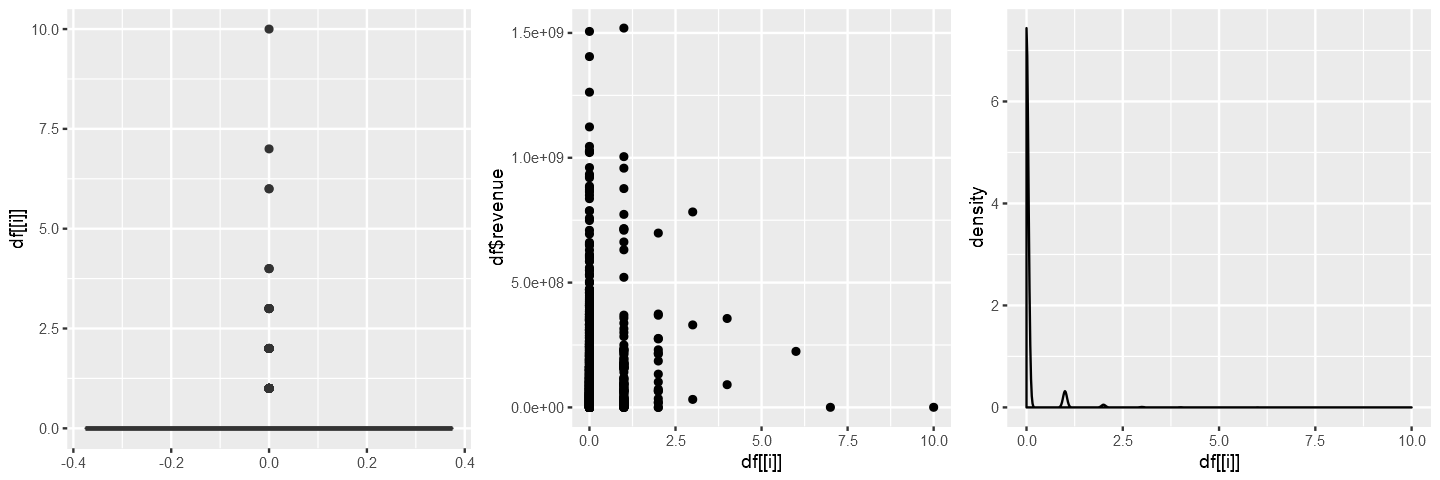

[1] "depart_Directing_female"


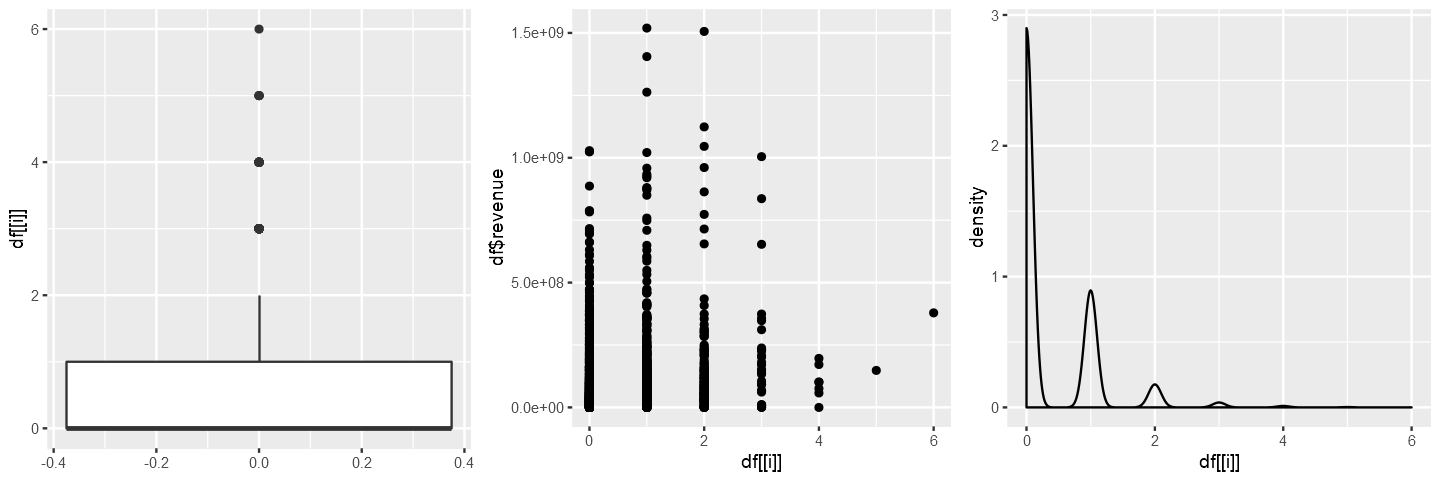

[1] "depart_Editing_female"


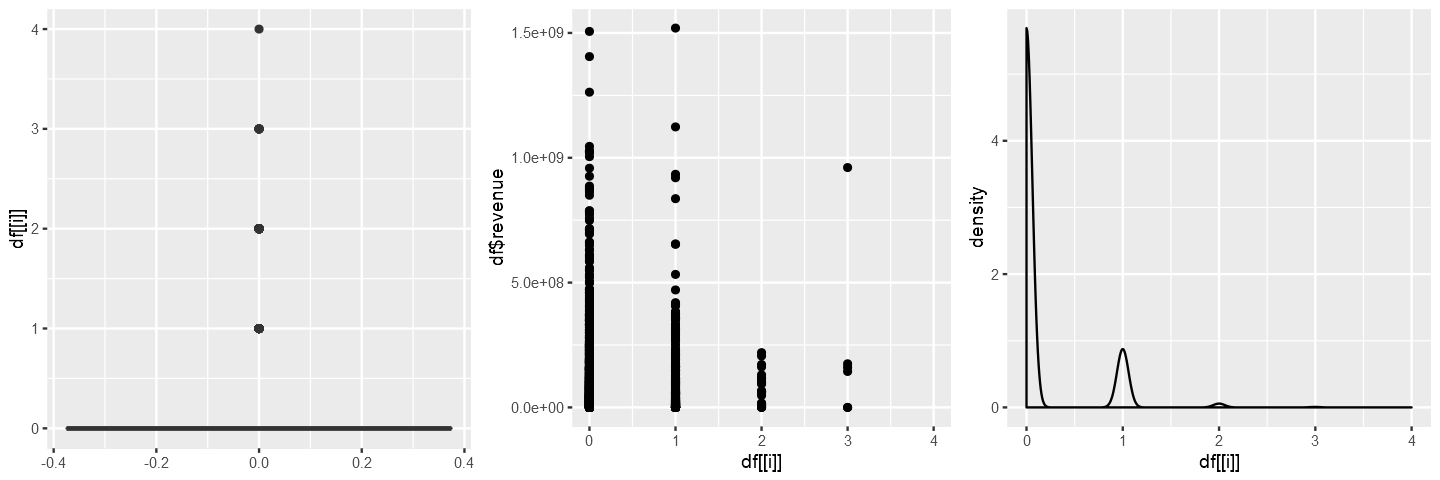

[1] "depart_Lighting_female"


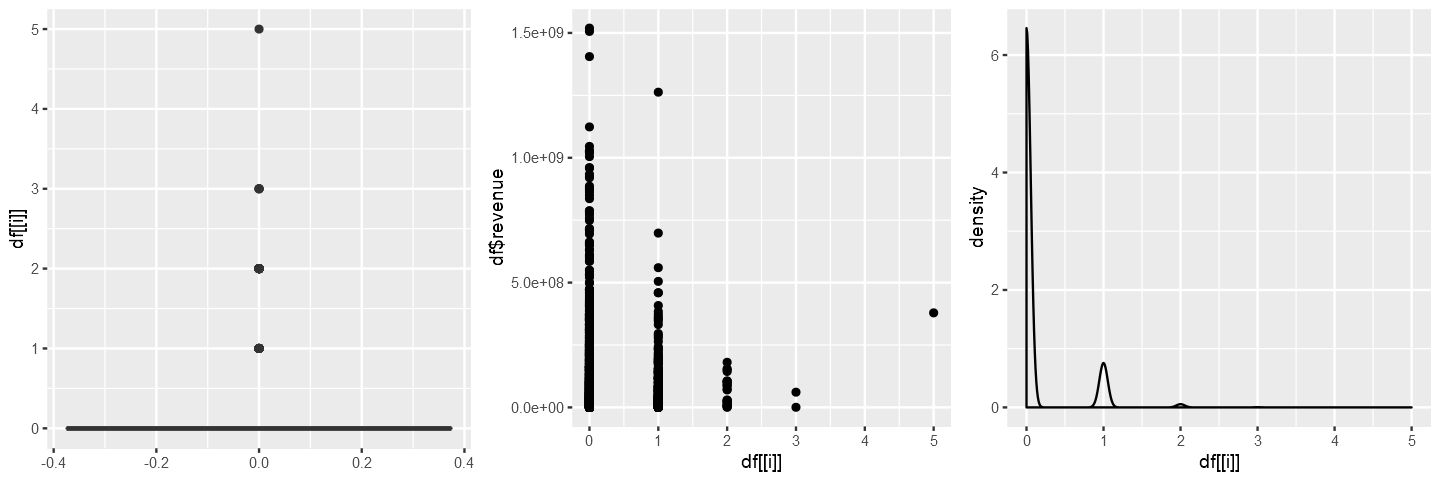

[1] "depart_Production_female"


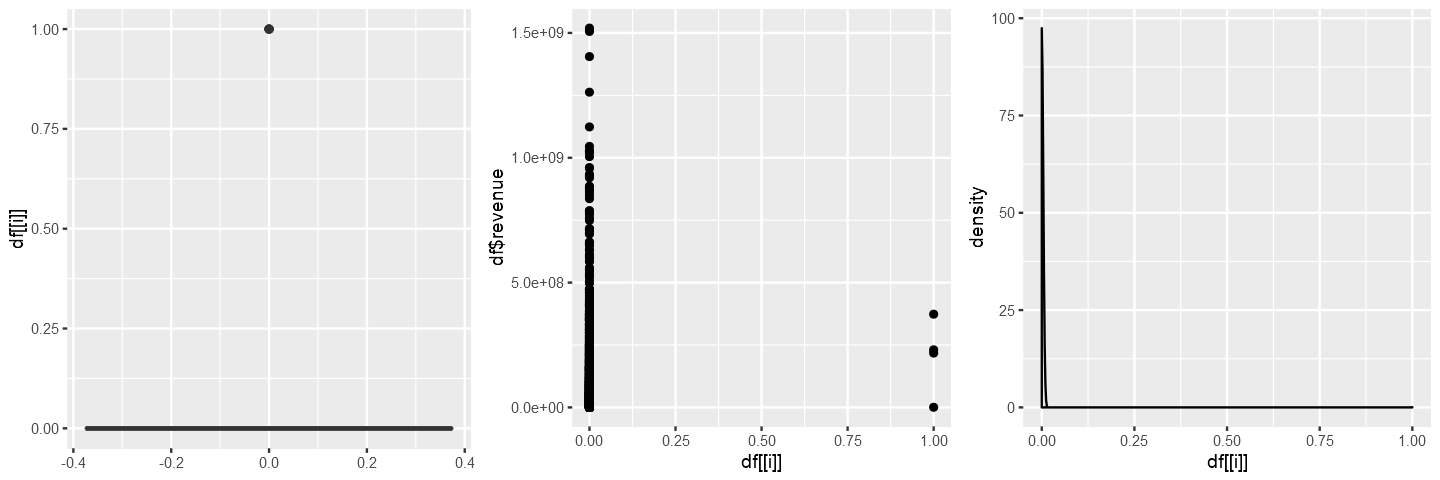

[1] "depart_Sound_female"


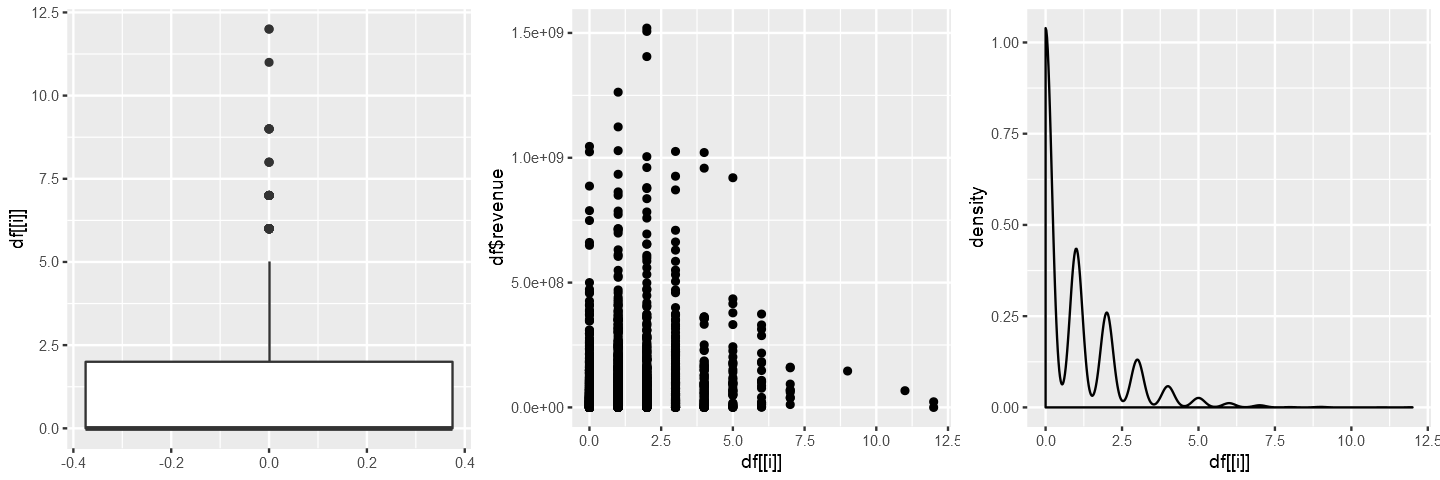

[1] "depart_Visual_Effects_female"


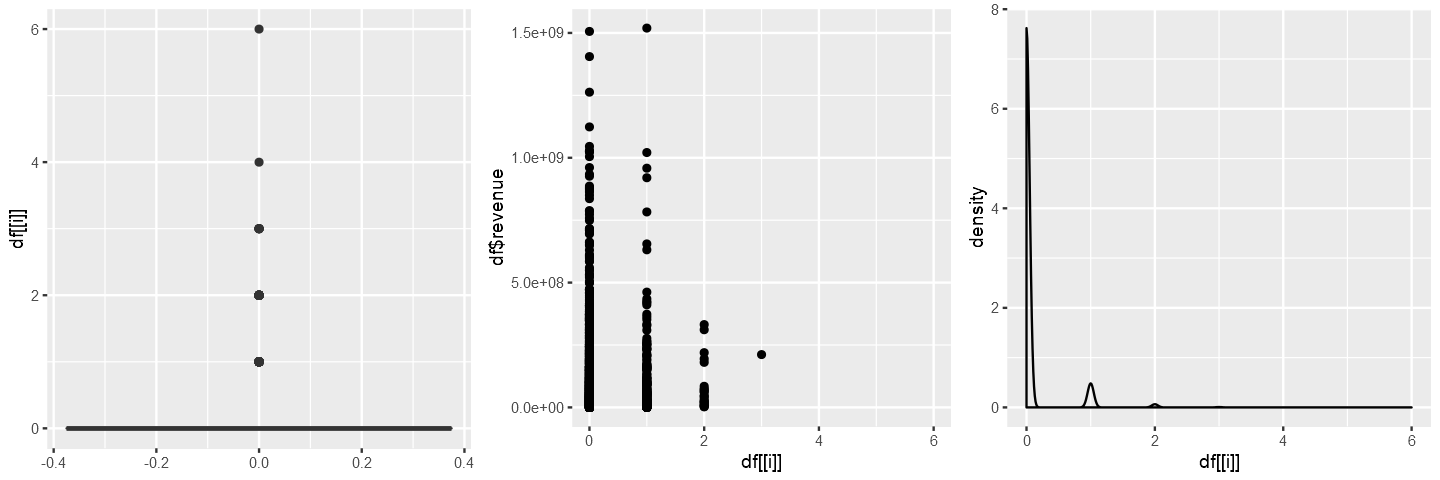

[1] "depart_Writing_female"


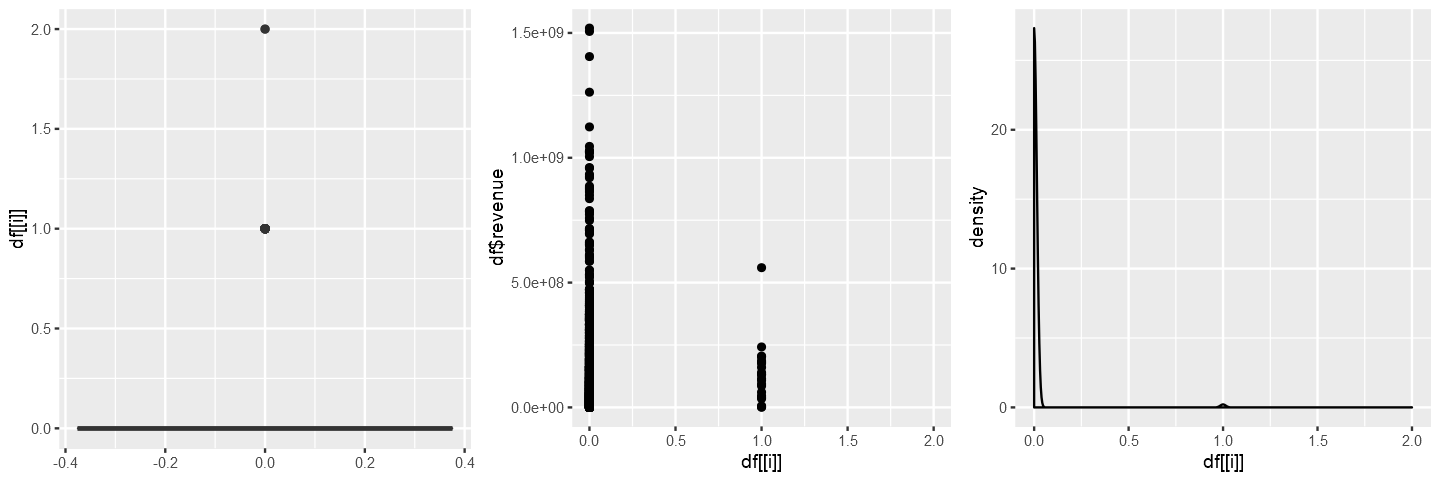

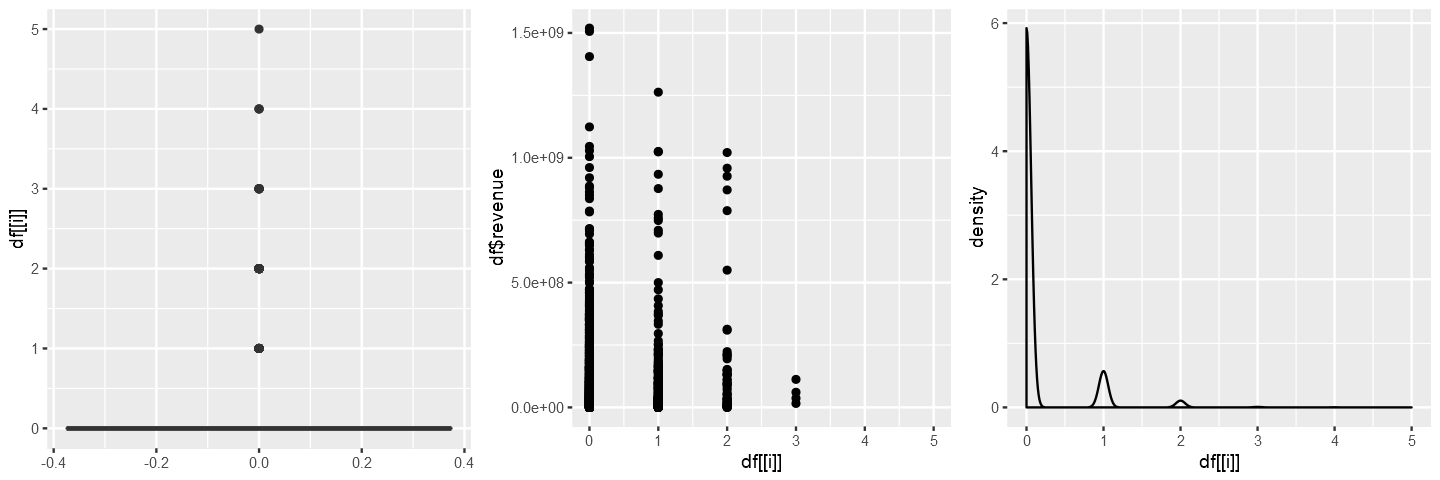

In [10]:
options(repr.plot.width = 12, repr.plot.height = 4)
for(i in names(df)) {
    print(i)
    p1 <- ggplot(data=df) + geom_boxplot(aes(y=df[[i]]))
    p2 <- ggplot(data=df) + geom_point(aes(x=df[[i]],y=df$revenue))
    p3 <- ggplot(data=df) + geom_density(aes(df[[i]]))
    grid.arrange(p1, p2,p3, nrow = 1)
}

In [14]:
vn <- names(movies_ff[,2:85])
nm <- c('movie_id')
for(v in vn) {
    if((is.numeric(movies_ff[[v]])) & (max(movies_ff[[v]],na.rm=T)>1))
        {nm <- c(nm,v)}}
nm

[1] "movie_id"                     "budget"                      
 [3] "popularity"                   "runtime"                     
 [5] "revenue"                      "keyword_cnt"                 
 [7] "release_year"                 "release_month"               
 [9] "release_day"                  "seasonality"                 
[11] "sw_collection"                "producers_cnt"               
[13] "countries_cnt"                "keywords_cnt"                
[15] "actor0_movies_cnt"            "actor0_movies_5y_cnt"        
[17] "actor1_movies_cnt"            "actor1_movies_5y_cnt"        
[19] "actor2_movies_cnt"            "actor2_movies_5y_cnt"        
[21] "actor0_prev_revenue"          "actor1_prev_revenue"         
[23] "actor2_prev_revenue"          "director_movies_cnt"         
[25] "director_movies_5y_cnt"       "depart_Art"                  
[27] "depart_Camera"                "depart_Crew"                 
[29] "depart_Custom_Mkup"           "depart_Directing"            
[31] "depart_Editing"               "depart_Lighting"             
[33] "depart_Production"            "depart_Sound"                
[35] "depart_Visual_Effects"        "depart_Writing"              
[37] "depart_Art_female"            "depart_Camera_female"        
[39] "depart_Crew_female"           "depart_Custom_Mkup_female"   
[41] "depart_Directing_female"      "depart_Editing_female"       
[43] "depart_Production_female"     "depart_Sound_female"         
[45] "depart_Visual_Effects_female" "depart_Writing_female"

In [15]:
nm <- setdiff(nm,'movie_id')
nm

[1] "budget"                       "popularity"                  
 [3] "runtime"                      "revenue"                     
 [5] "keyword_cnt"                  "release_year"                
 [7] "release_month"                "release_day"                 
 [9] "seasonality"                  "sw_collection"               
[11] "producers_cnt"                "countries_cnt"               
[13] "keywords_cnt"                 "actor0_movies_cnt"           
[15] "actor0_movies_5y_cnt"         "actor1_movies_cnt"           
[17] "actor1_movies_5y_cnt"         "actor2_movies_cnt"           
[19] "actor2_movies_5y_cnt"         "actor0_prev_revenue"         
[21] "actor1_prev_revenue"          "actor2_prev_revenue"         
[23] "director_movies_cnt"          "director_movies_5y_cnt"      
[25] "depart_Art"                   "depart_Camera"               
[27] "depart_Crew"                  "depart_Custom_Mkup"          
[29] "depart_Directing"             "depart_Editing"              
[31] "depart_Lighting"              "depart_Production"           
[33] "depart_Sound"                 "depart_Visual_Effects"       
[35] "depart_Writing"               "depart_Art_female"           
[37] "depart_Camera_female"         "depart_Crew_female"          
[39] "depart_Custom_Mkup_female"    "depart_Directing_female"     
[41] "depart_Editing_female"        "depart_Production_female"    
[43] "depart_Sound_female"          "depart_Visual_Effects_female"
[45] "depart_Writing_female"

In [20]:
exploreData(data=movies_ff[,c(1:72,74:85)],y="revenue")

  |===================================================================== |  99%

character(0)
attr(,"status")
[1] 1

In [16]:
res <- NULL

for(i in nm) {
    rw <- NULL
    for(j in nm) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- nm
colnames(res) <- nm
res

budget     popularity runtime     revenue   
budget                       1.00000000 0.51763922 0.250502521 0.69100785
popularity                   0.51763922 1.00000000 0.171363671 0.59453873
runtime                      0.25050252 0.17136367 1.000000000 0.26191060
revenue                      0.69100785 0.59453873 0.261910598 1.00000000
keyword_cnt                  0.28302850 0.43147356 0.143200997 0.33226715
release_year                 0.15714117 0.13596592 0.004360218 0.01791760
release_month                0.06021319 0.05394586 0.126207653 0.03649203
release_day                  0.03420375 0.04823345 0.027991214 0.06065039
seasonality                  0.13459262 0.10436647 0.096008645 0.19901310
sw_collection                0.08193501 0.08765311 0.046622733 0.09441626
producers_cnt                0.27367753 0.28542669 0.097767205 0.19646784
countries_cnt                0.13915397 0.17514193 0.110212811 0.08647904
keywords_cnt                 0.28302850 0.43147356 0.143200997 0.33226715
actor0_movies_cnt            0.38239031 0.31443240 0.116054854 0.34934331
actor0_movies_5y_cnt         0.37030864 0.30693594 0.097207527 0.33406733
actor1_movies_cnt            0.37057241 0.28592607 0.096600788 0.32124084
actor1_movies_5y_cnt         0.35956320 0.29007301 0.100592714 0.31647611
actor2_movies_cnt            0.33787093 0.28440242 0.067546142 0.29497599
actor2_movies_5y_cnt         0.33594299 0.28401519 0.078479476 0.30455912
actor0_prev_revenue          0.35271495 0.27577510 0.038703160 0.27381839
actor1_prev_revenue          0.28959525 0.24192757 0.020570540 0.20829765
actor2_prev_revenue          0.26348899 0.23105214 0.031054800 0.15562960
director_movies_cnt          0.41438779 0.32083394 0.258206228 0.37271460
director_movies_5y_cnt       0.34286871 0.28002535 0.202971707 0.34070533
depart_Art                   0.39214008 0.44048058 0.202893202 0.38627352
depart_Camera                0.31264159 0.41340554 0.221570061 0.35515371
depart_Crew                  0.33034081 0.35889650 0.158135642 0.32126015
depart_Custom_Mkup           0.32872250 0.38651849 0.220309181 0.33491798
depart_Directing             0.26539523 0.30718093 0.084235835 0.26157248
depart_Editing               0.36459502 0.44624190 0.174899460 0.40466714
depart_Lighting              0.28472802 0.31939105 0.132489798 0.28933070
depart_Production            0.39862688 0.46970365 0.150458429 0.39664076
depart_Sound                 0.35580258 0.44736433 0.201283179 0.39116987
depart_Visual_Effects        0.39644515 0.38530673 0.068640031 0.36841466
depart_Writing               0.27178109 0.27683764 0.104279017 0.27498645
depart_Art_female            0.24003051 0.22104330 0.111873075 0.23977913
depart_Camera_female         0.03658969 0.06517313 0.001225895 0.03200585
depart_Crew_female           0.17559948 0.17747248 0.070424665 0.16282971
depart_Custom_Mkup_female    0.31504113 0.29449267 0.169646772 0.31768865
depart_Directing_female      0.13960228 0.12627283 0.069858973 0.12619729
depart_Editing_female        0.08616299 0.10216707 0.048497778 0.05829747
depart_Production_female     0.39634351 0.39586698 0.126761948 0.38748208
depart_Sound_female          0.13053200 0.13821703 0.077487470 0.14117393
depart_Visual_Effects_female 0.08256478 0.07644792 0.005255800 0.07706105
depart_Writing_female        0.04925324 0.06016715 0.026717987 0.09974516
                             keyword_cnt release_year release_month
budget                        0.28302850  0.157141175  0.0602131869
popularity                    0.43147356  0.135965923  0.0539458645
runtime                       0.14320100  0.004360218  0.1262076528
revenue                       0.33226715  0.017917598  0.0364920303
keyword_cnt                   1.00000000 -0.099937459  0.0428232049
release_year                 -0.09993746  1.000000000 -0.0497651356
release_month                 0.04282320 -0.049765136  1.0000000000
release_day                   0.01991093  0.006177444 -0.0009423409
seasonality  

In [17]:
if (!require("RColorBrewer")) install.packages("RColorBrewer")

Loading required package: RColorBrewer



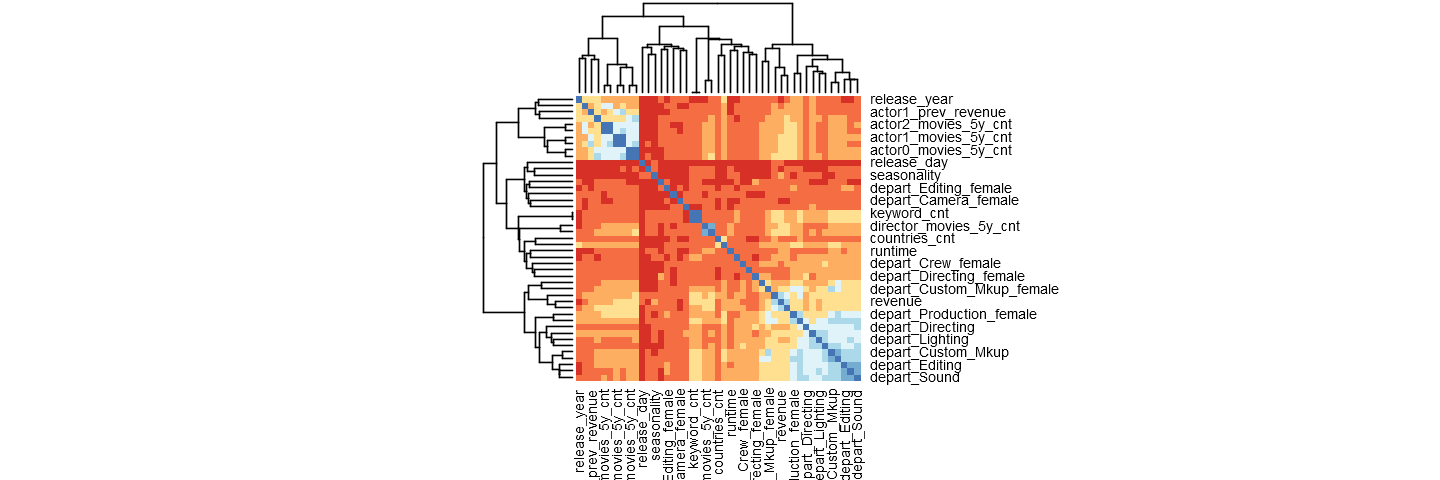

In [18]:
heatmap(res,symm = T,cexCol = 0.8, cexRow = 0.8, col=brewer.pal(n=8, name="RdYlBu"))

In [19]:
if (!require("corrplot")) install.packages("corrplot")
if (!require("RColorBrewer")) install.packages("RColorBrewer")

Loading required package: corrplot

corrplot 0.84 loaded



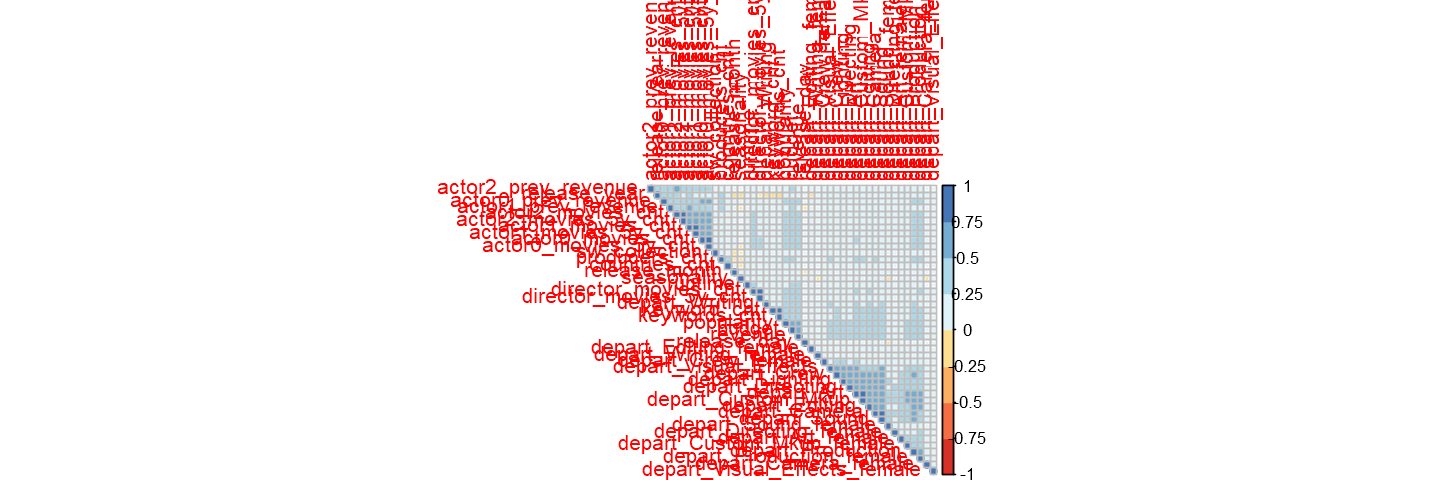

In [20]:
corrplot(res, type="upper", order="hclust", col=brewer.pal(n=8, name="RdYlBu"))

#### 2.4 - Describe the outcome variable

- Histogram
- Histogram by categories


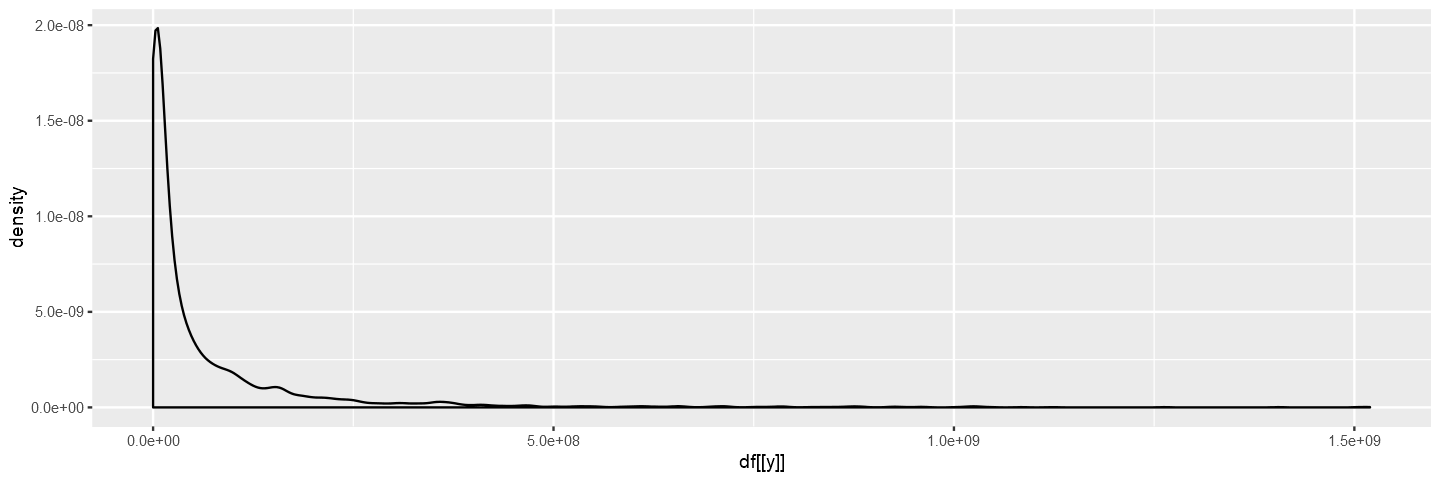

In [21]:
ggplot(data=df) + geom_density(aes(df[[y]]))

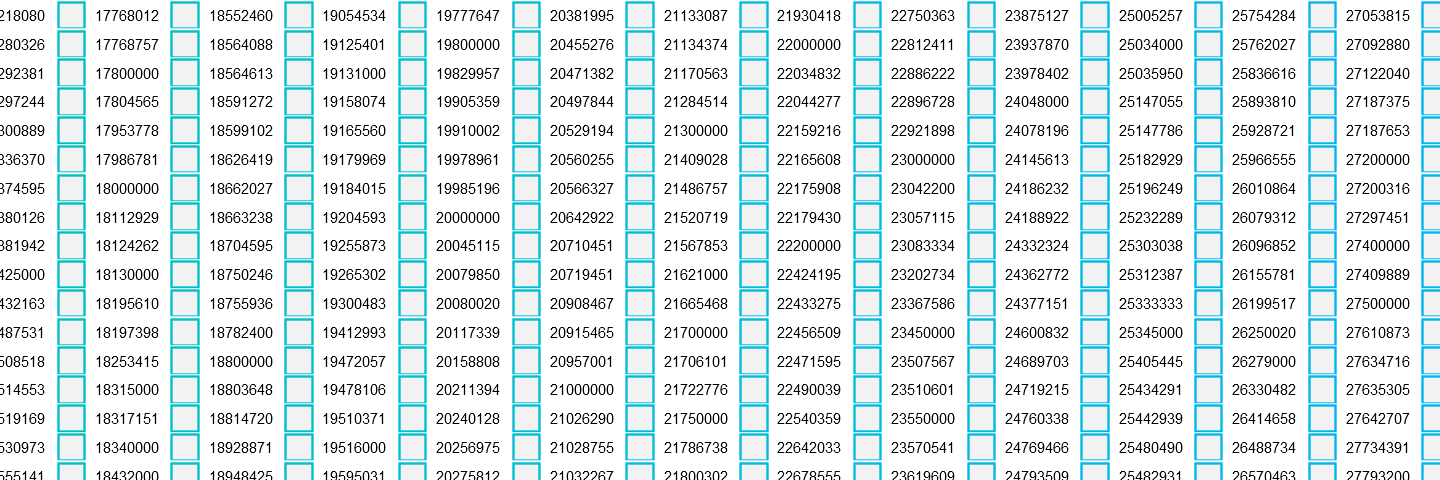

In [38]:
ggplot(data=df) + geom_density(aes(df[[y]], group=factor(df[["popularity"]]), color=factor(df[["revenue"]])))

#### 2.5 - Graphs to catch outliers


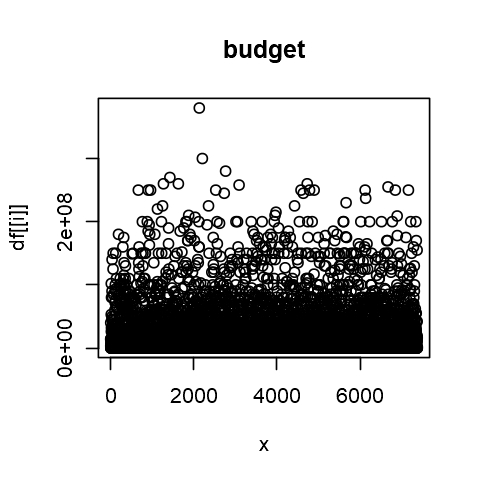

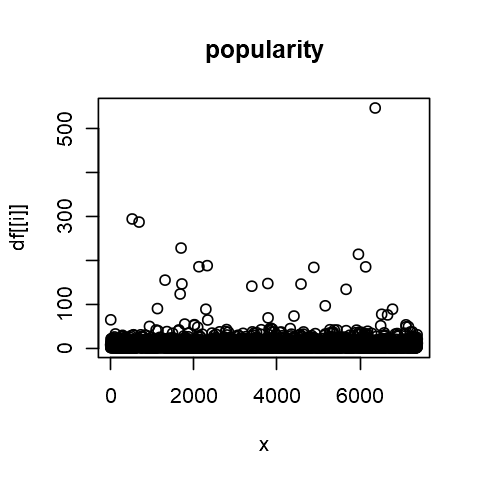

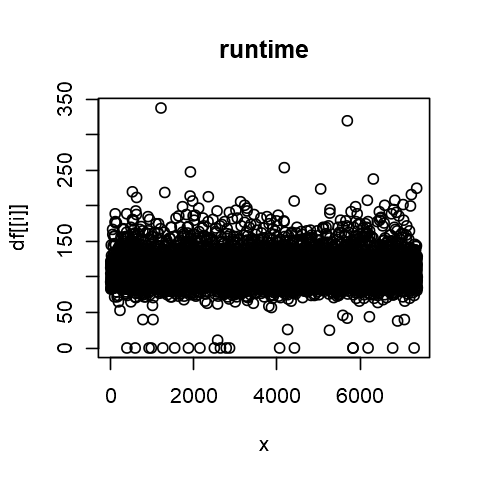

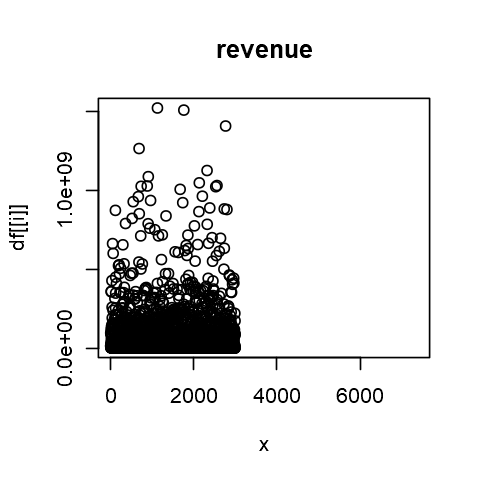

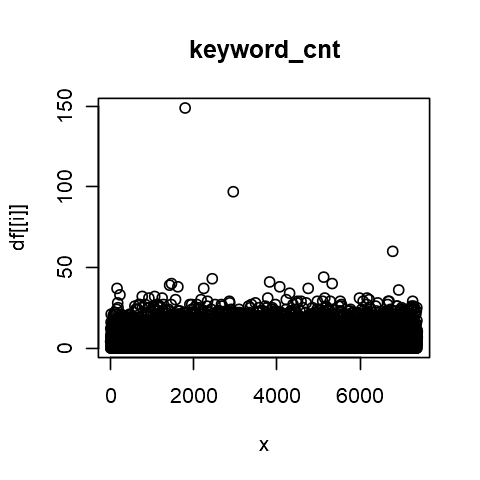

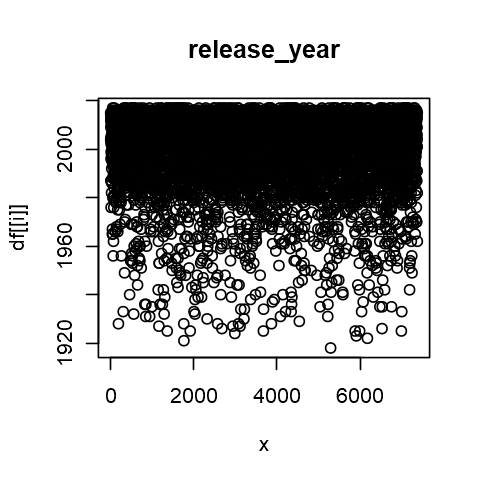

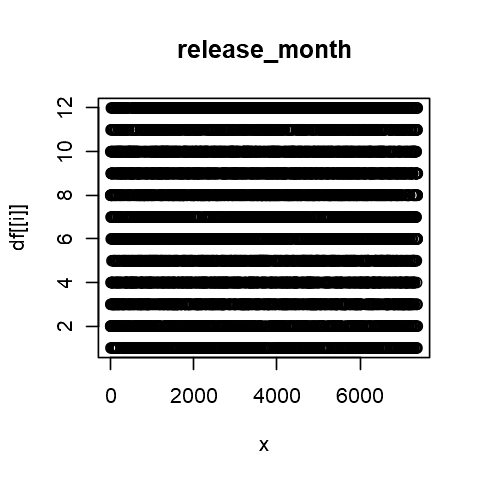

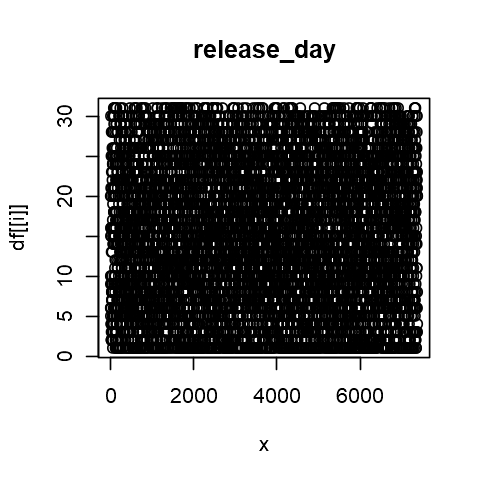

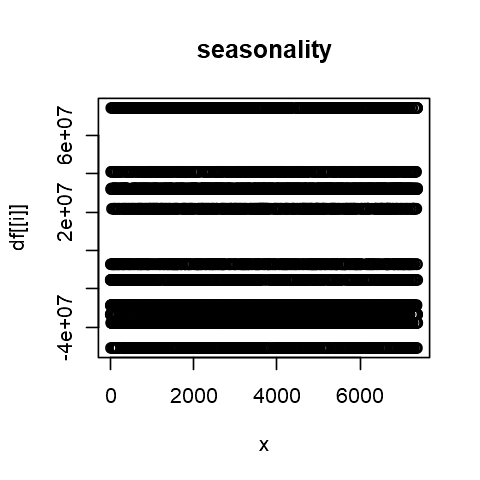

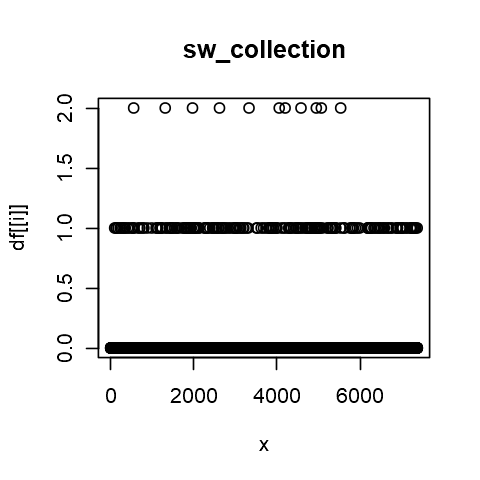

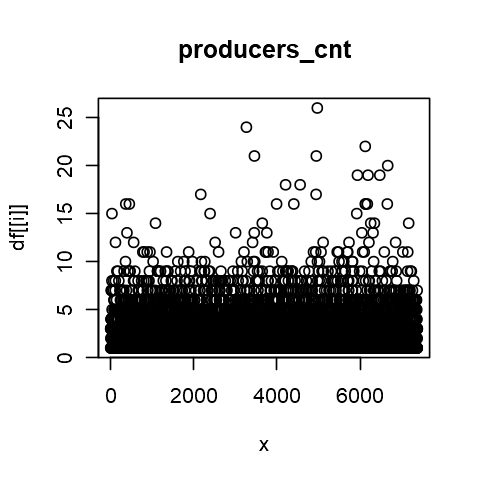

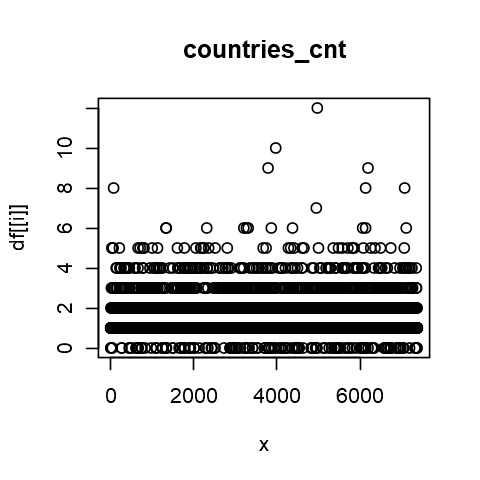

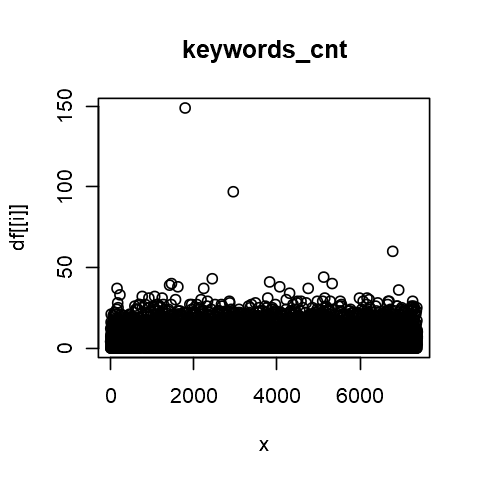

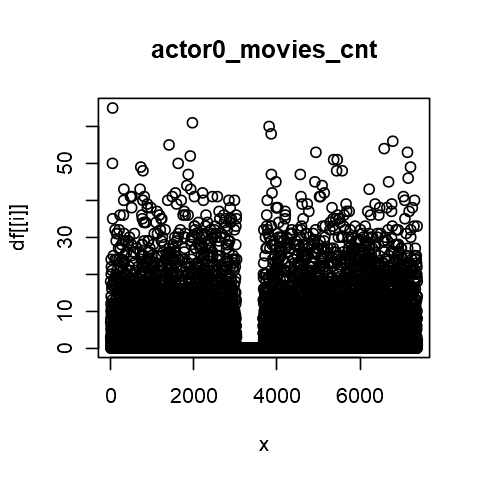

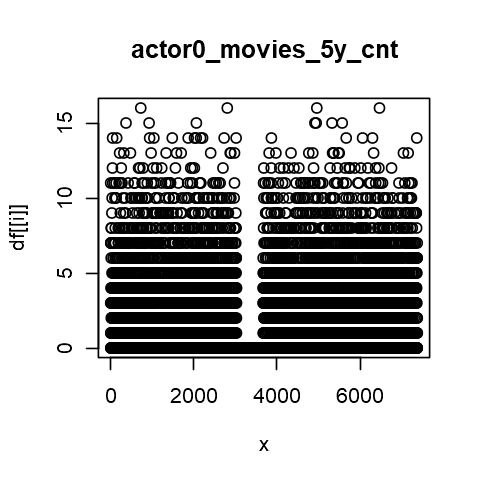

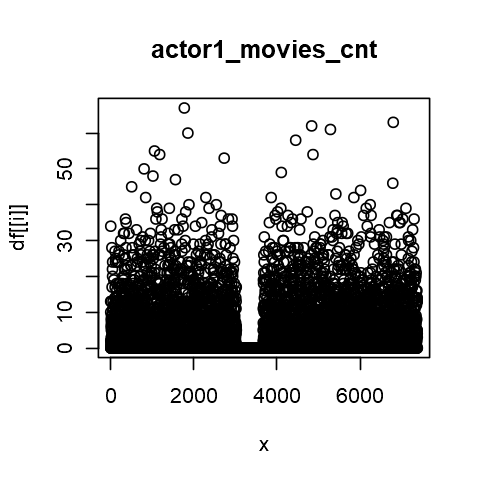

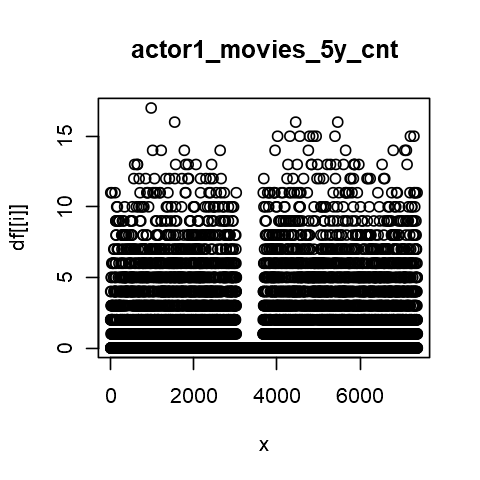

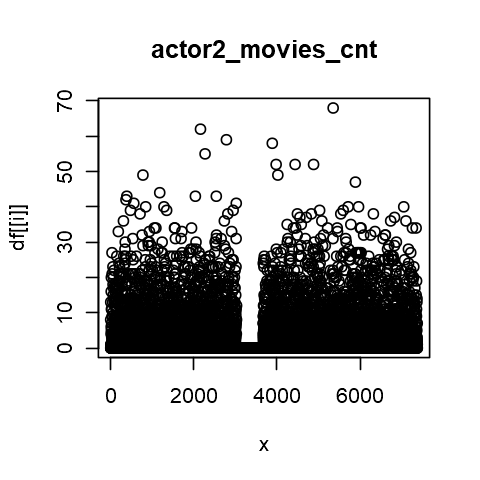

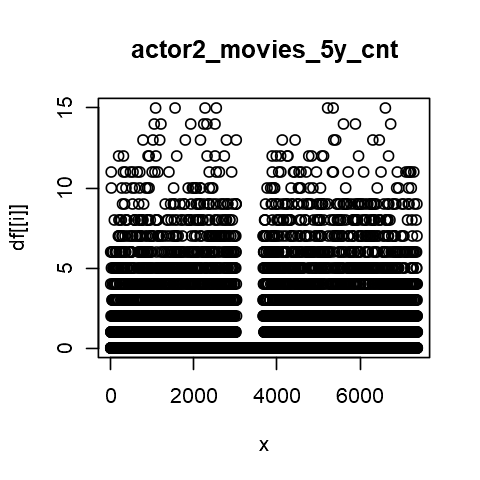

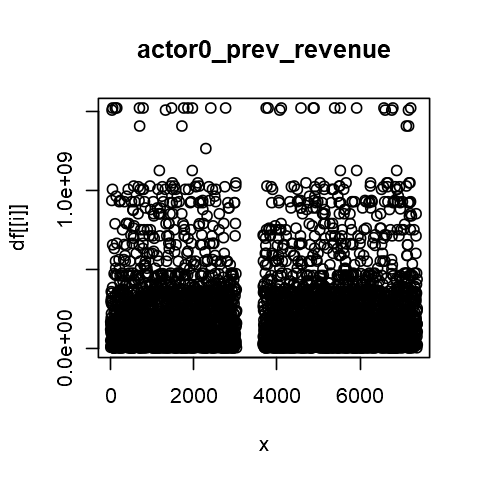

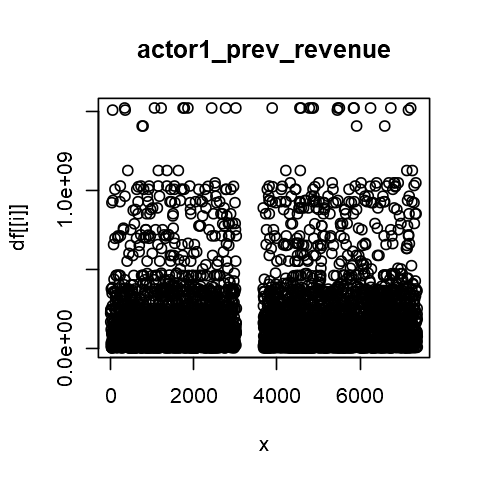

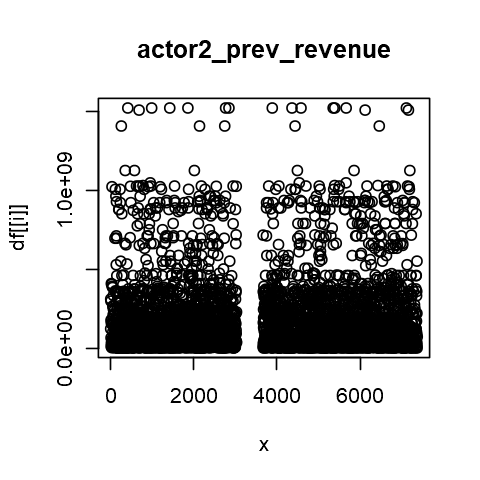

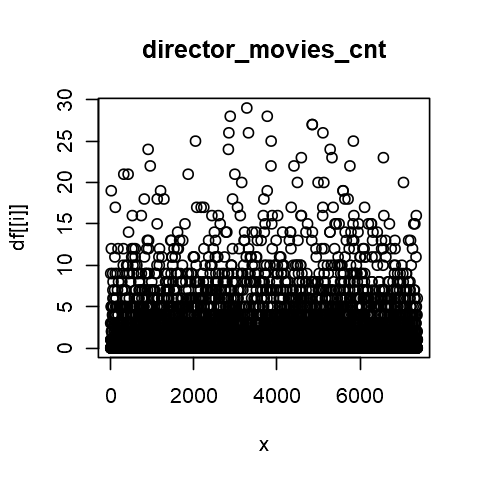

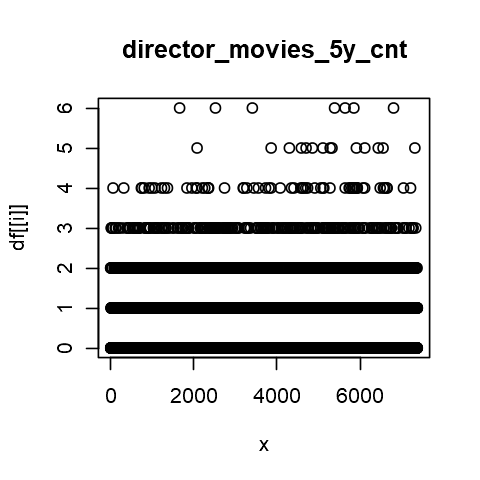

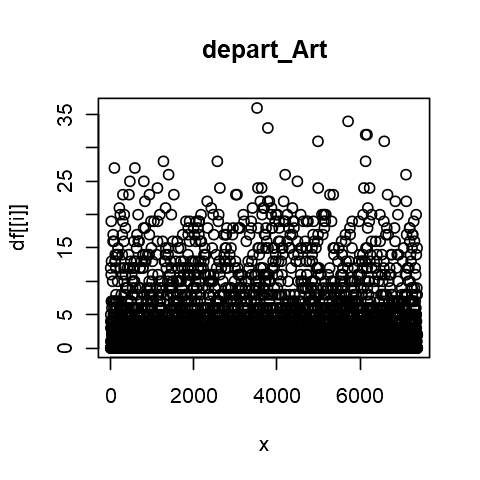

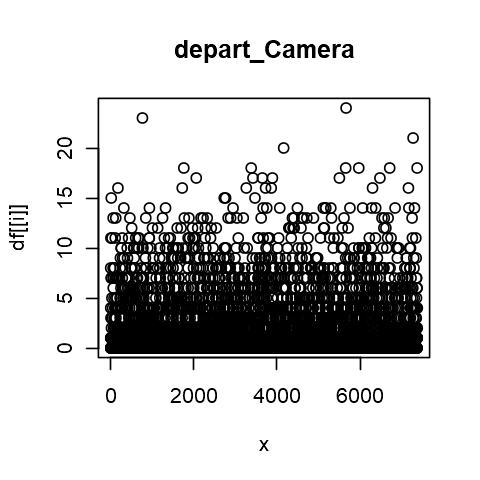

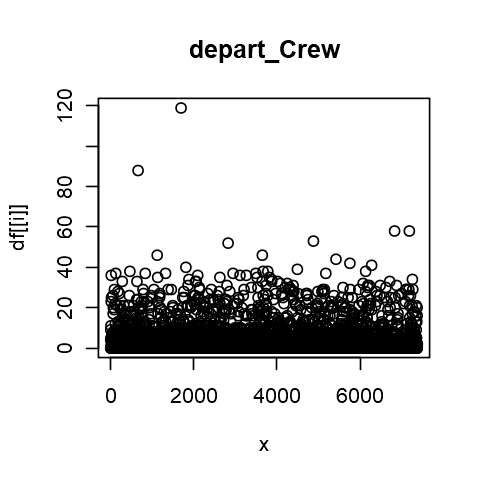

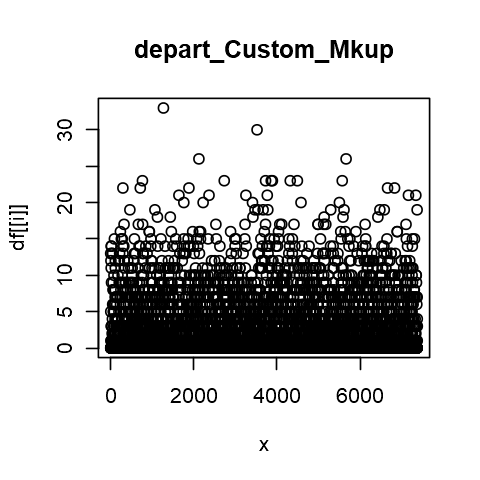

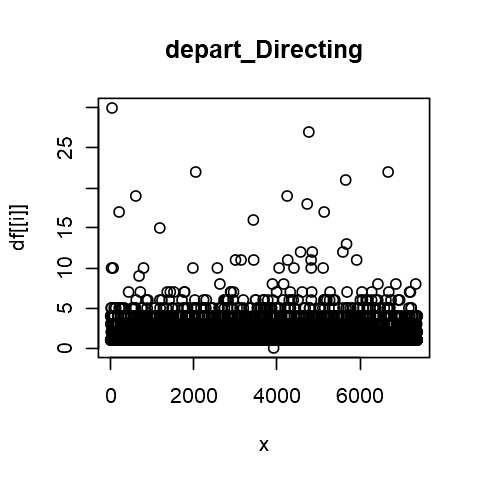

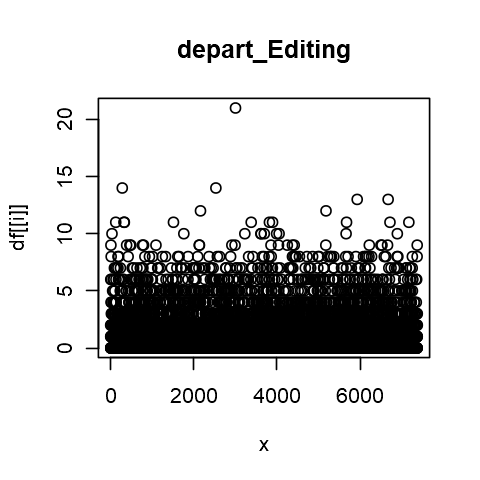

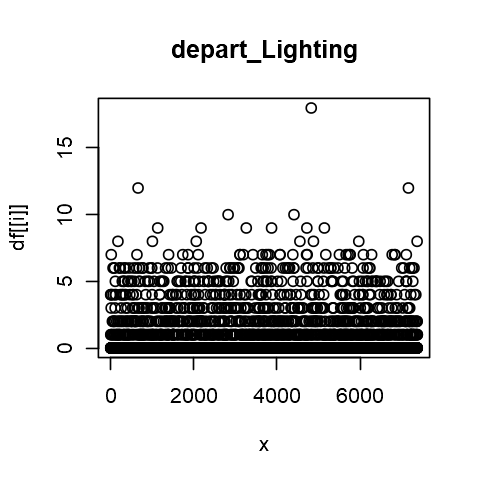

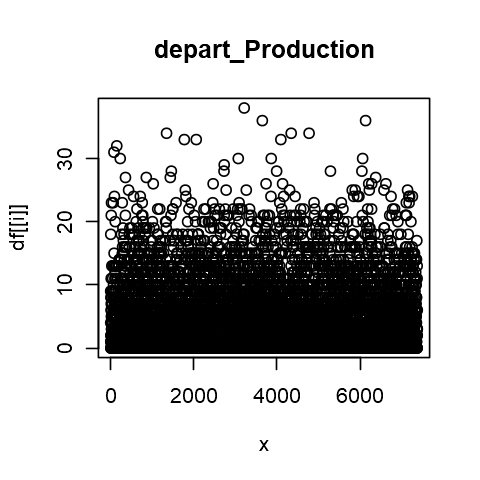

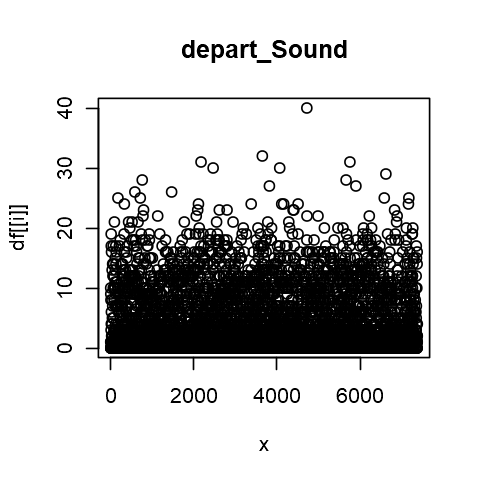

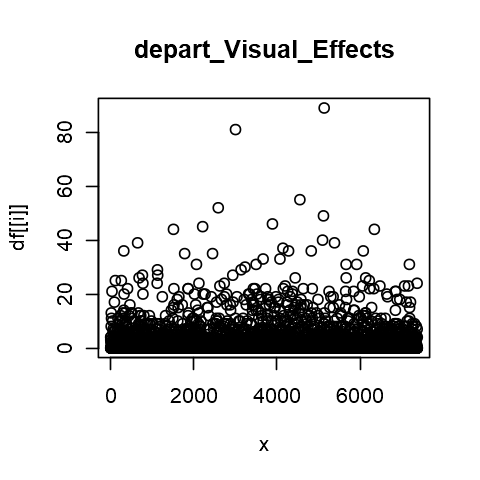

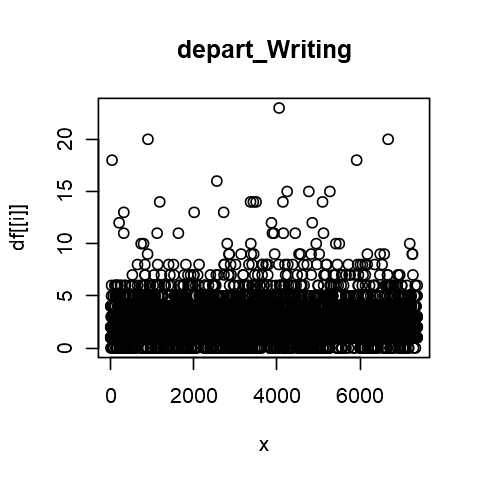

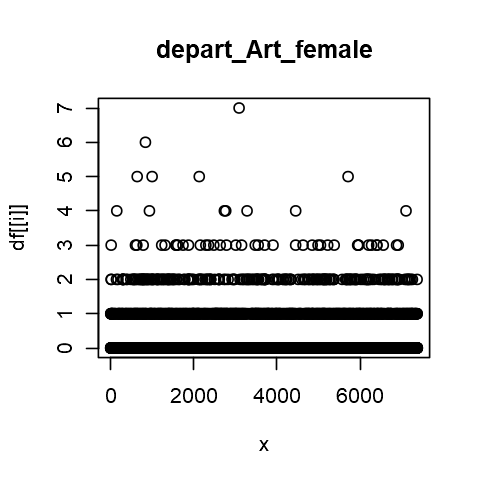

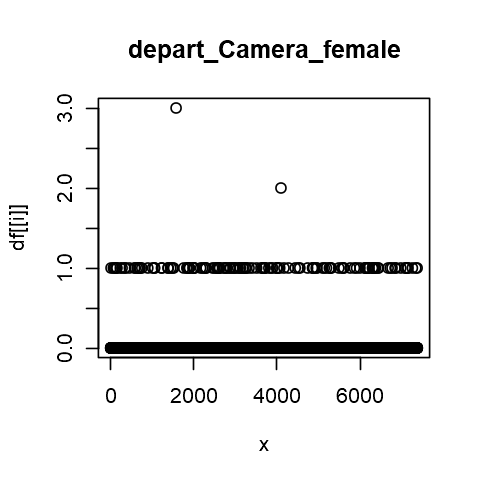

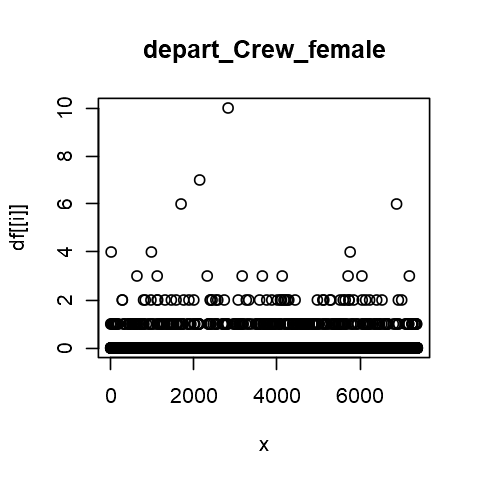

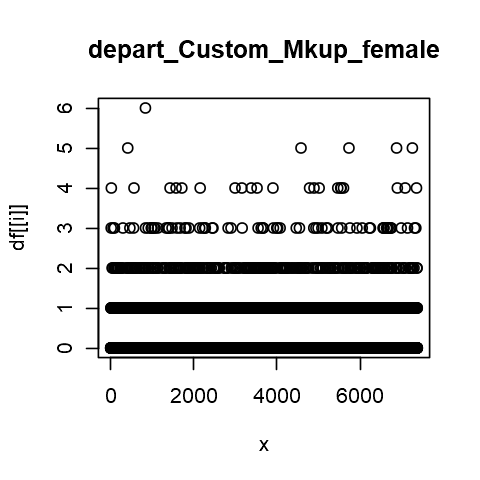

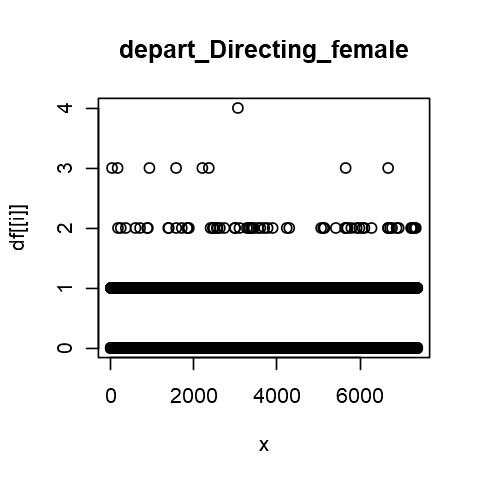

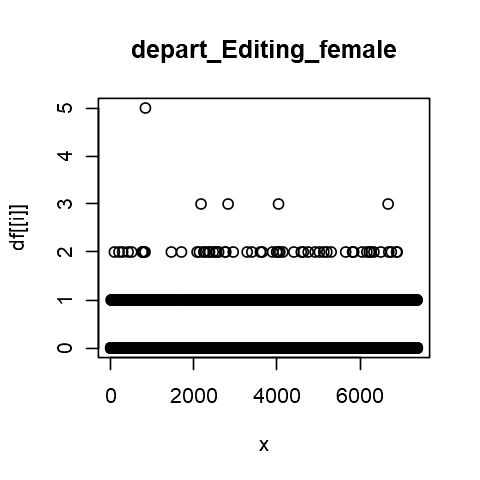

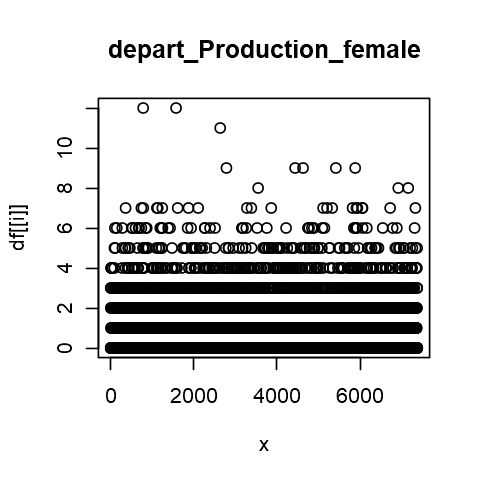

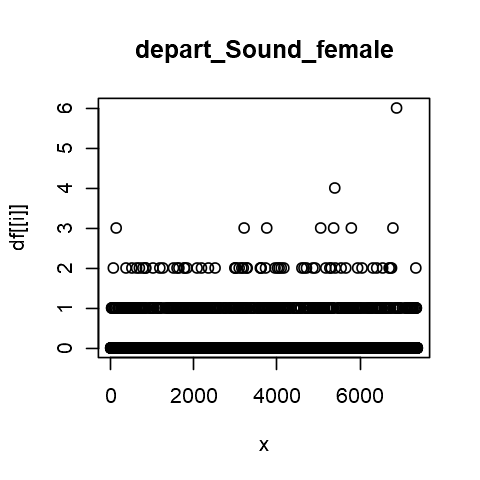

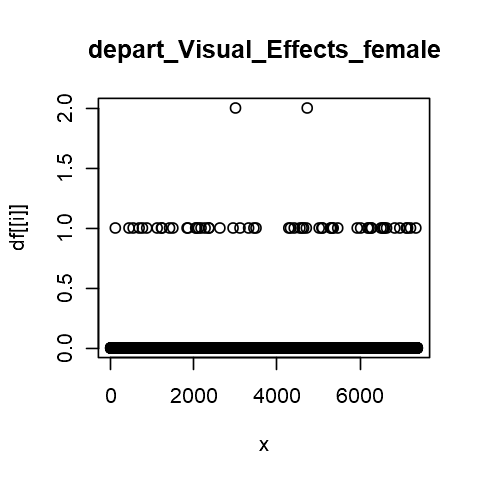

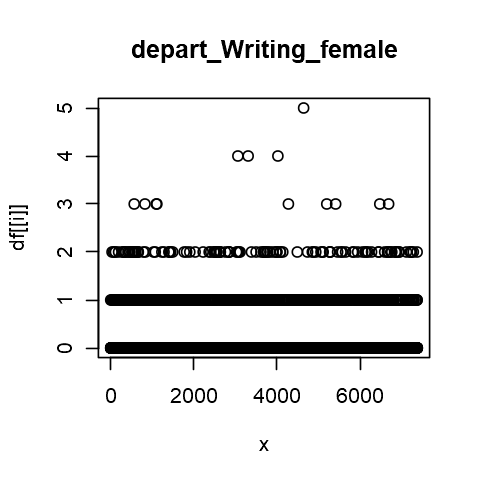

In [22]:
options(repr.plot.width = 4, repr.plot.height = 4)
x <- 1:nrow(df)
for(i in (nm)) {
    plot(df[[i]] ~ x, main=i)
}

In [23]:
#question 2.6- description of the missing values
getMissingness(movies_ff)

[[1]]
                   var na_count rate
1              revenue     4382 59.4
2  actor2_prev_revenue     3423 46.4
3  actor1_prev_revenue     3201 43.4
4  actor0_prev_revenue     2752 37.3
5     sw_female_actor0      934 12.7
6       sw_male_actor0      934 12.7
7     sw_female_actor2      788 10.7
8       sw_male_actor2      788 10.7
9     sw_female_actor1      782 10.6
10      sw_male_actor1      782 10.6

[[2]]
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."



$missingness
                            var na_count rate
1                       revenue     4382 59.4
2           actor2_prev_revenue     3423 46.4
3           actor1_prev_revenue     3201 43.4
4           actor0_prev_revenue     2752 37.3
5              sw_female_actor0      934 12.7
6                sw_male_actor0      934 12.7
7              sw_female_actor2      788 10.7
8                sw_male_actor2      788 10.7
9              sw_female_actor1      782 10.6
10               sw_male_actor1      782 10.6
11                producers_cnt      395  5.4
12                   depart_Art       34  0.5
13                depart_Camera       34  0.5
14                  depart_Crew       34  0.5
15           depart_Custom_Mkup       34  0.5
16             depart_Directing       34  0.5
17               depart_Editing       34  0.5
18              depart_Lighting       34  0.5
19            depart_Production       34  0.5
20                 depart_Sound       34  0.5
21        depart_Visual_Effects       34  0.5
22               depart_Writing       34  0.5
23            depart_Art_female       34  0.5
24         depart_Camera_female       34  0.5
25           depart_Crew_female       34  0.5
26    depart_Custom_Mkup_female       34  0.5
27      depart_Directing_female       34  0.5
28        depart_Editing_female       34  0.5
29       depart_Lighting_female       34  0.5
30     depart_Production_female       34  0.5
31          depart_Sound_female       34  0.5
32 depart_Visual_Effects_female       34  0.5
33        depart_Writing_female       34  0.5
34                      runtime        5  0.1
35                 release_date        1  0.0
36                 release_year        1  0.0
37                release_month        1  0.0
38                  release_day        1  0.0
39                  seasonality        1  0.0

$message
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."

$rows
NULL

###2.7 - Missing matrix

In [24]:
missingMatrix <- function(data) {
    vn <- names(data[,2:85])
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [25]:
df.na <- df
for(i in (nm)) {
    df.na[,i] <- ifelse(is.na(df.na[,i])==T,1,0)
}

In [26]:
head(df.na)

movie_id budget original_language popularity release_date runtime runtime_cat
1 1        0      en                0          2015-02-20   0       Short      
2 2        0      en                0          2004-08-06   0       Medium     
3 3        0      en                0          2014-10-10   0       Medium     
4 4        0      hi                0          2012-03-09   0       Large      
5 5        0      ko                0          2009-02-05   0       Medium     
6 6        0      en                0          1987-08-06   0       Short      
  revenue sw_lang_en sw_web_presence ... depart_Camera_female
1 0       1          0               ... 0                   
2 0       1          0               ... 0                   
3 0       1          1               ... 0                   
4 0       0          1               ... 0                   
5 0       0          0               ... 0                   
6 0       1          0               ... 0                   
  depart_Crew_female depart_Custom_Mkup_female depart_Directing_female
1 0                  0                         0                      
2 0                  0                         0                      
3 0                  0                         0                      
4 0                  0                         0                      
5 0                  0                         0                      
6 0                  0                         0                      
  depart_Editing_female depart_Lighting_female depart_Production_female
1 0                     0                      0                       
2 0                     0                      0                       
3 0                     0                      0                       
4 0                     0                      0                       
5 0                     0                      0                       
6 0                     0                      0                       
  depart_Sound_female depart_Visual_Effects_female depart_Writing_female
1 0                   0                            0                    
2 0                   0                            0                    
3 0                   0                            0                    
4 0                   0                            0                    
5 0                   0                            0                    
6 0                   0                            0

In [27]:
df.na

movie_id budget original_language popularity release_date runtime
1     1       0      en                0          2015-02-20   0      
2     2       0      en                0          2004-08-06   0      
3     3       0      en                0          2014-10-10   0      
4     4       0      hi                0          2012-03-09   0      
5     5       0      ko                0          2009-02-05   0      
6     6       0      en                0          1987-08-06   0      
7     7       0      en                0          2012-08-30   0      
8     8       0      en                0          2004-01-15   0      
9     9       0      en                0          1996-02-16   0      
10   10       0      en                0          2003-04-16   0      
11   11       0      en                0          1976-11-21   0      
12   12       0      en                0          1987-07-10   0      
13   13       0      en                0          1999-09-15   0      
14   14       0      en                0          2005-03-04   0      
15   15       0      en                0          2002-06-20   0      
16   16       0      sr                0          2010-10-06   0      
17   17       0      en                0          2005-08-04   0      
18   18       0      en                0          2013-12-25   0      
19   19       0      en                0          2011-02-02   0      
20   20       0      en                0          2005-08-02   0      
21   21       0      en                0          1998-04-03   0      
22   22       0      en                0          1982-08-13   0      
23   23       0      en                0          2012-07-28   0      
24   24       0      en                0          2011-09-02   0      
25   25       0      en                0          2006-09-09   0      
26   26       0      en                0          1992-10-23   0      
27   27       0      en                0          1997-09-08   0      
28   28       0      en                0          2013-09-07   0      
29   29       0      en                0          1986-08-08   0      
30   30       0      en                0          2002-04-07   0      
...  ...      ...    ...               ...        ...          ...    
7346 7369     0      en                0          2016-01-01   0      
7347 7370     0      en                0          2008-03-14   0      
7348 7371     0      en                0          1999-10-15   0      
7349 7372     0      en                0          2010-11-23   0      
7350 7373     0      en                0          2011-11-22   0      
7351 7374     0      en                0          1976-11-03   0      
7352 7375     0      en                0          1991-05-24   0      
7353 7376     0      it                0          2002-09-06   0      
7354 7377     0      en                0          1970-06-22   0      
7355 7378     0      en                0          2014-09-10   0      
7356 7379     0      en                0          2005-09-16   0      
7357 7380     0      en                0          2015-04-30   0      
7358 7381     0      en                0          2016-06-03   0      
7359 7382     0      en                0          1970-03-26   0      
7360 7383     0      en                0          2006-11-23   0      
7361 7384     0      en                0          2012-09-11   0      
7362 7385     0      en                0          1987-08-14   0      
7363 7386     0      en                0          2001-12-21   0      
7364 7387     0      en                0          1991-06-28   0      
7365 7388     0      en                0          2013-09-11   0      
7366 7389     0      en                0          2006-01-30   0      
7367 7390     0      en                0          2013-03-22   0      
7368 7391     0      en                0          1991-06-21   0      
7369 7392     0      en                0          2009-11-06   0      
7370 7393     0      en      

In [28]:
summary(df.na)

    movie_id        budget  original_language    popularity release_date      
 Min.   :   1   Min.   :0   Length:7375        Min.   :0    Length:7375       
 1st Qu.:1848   1st Qu.:0   Class :character   1st Qu.:0    Class :character  
 Median :3696   Median :0   Mode  :character   Median :0    Mode  :character  
 Mean   :3698   Mean   :0                      Mean   :0                      
 3rd Qu.:5550   3rd Qu.:0                      3rd Qu.:0                      
 Max.   :7398   Max.   :0                      Max.   :0                      
                                                                              
    runtime         runtime_cat           revenue         sw_lang_en    
 Min.   :0.000000   Length:7375        Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000000   Class :character   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.000000   Mode  :character   Median :1.0000   Median :1.0000  
 Mean   :0.000678                      Mean   :0.5942   Mean   :0.8591  
 3r

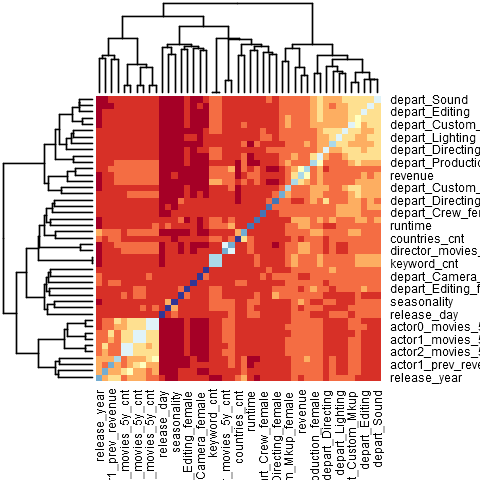

In [29]:
heatmap(as.matrix(x=res),cexCol = 0.7, cexRow = 0.7, col=brewer.pal(n=ncol(df), name="RdYlBu"))

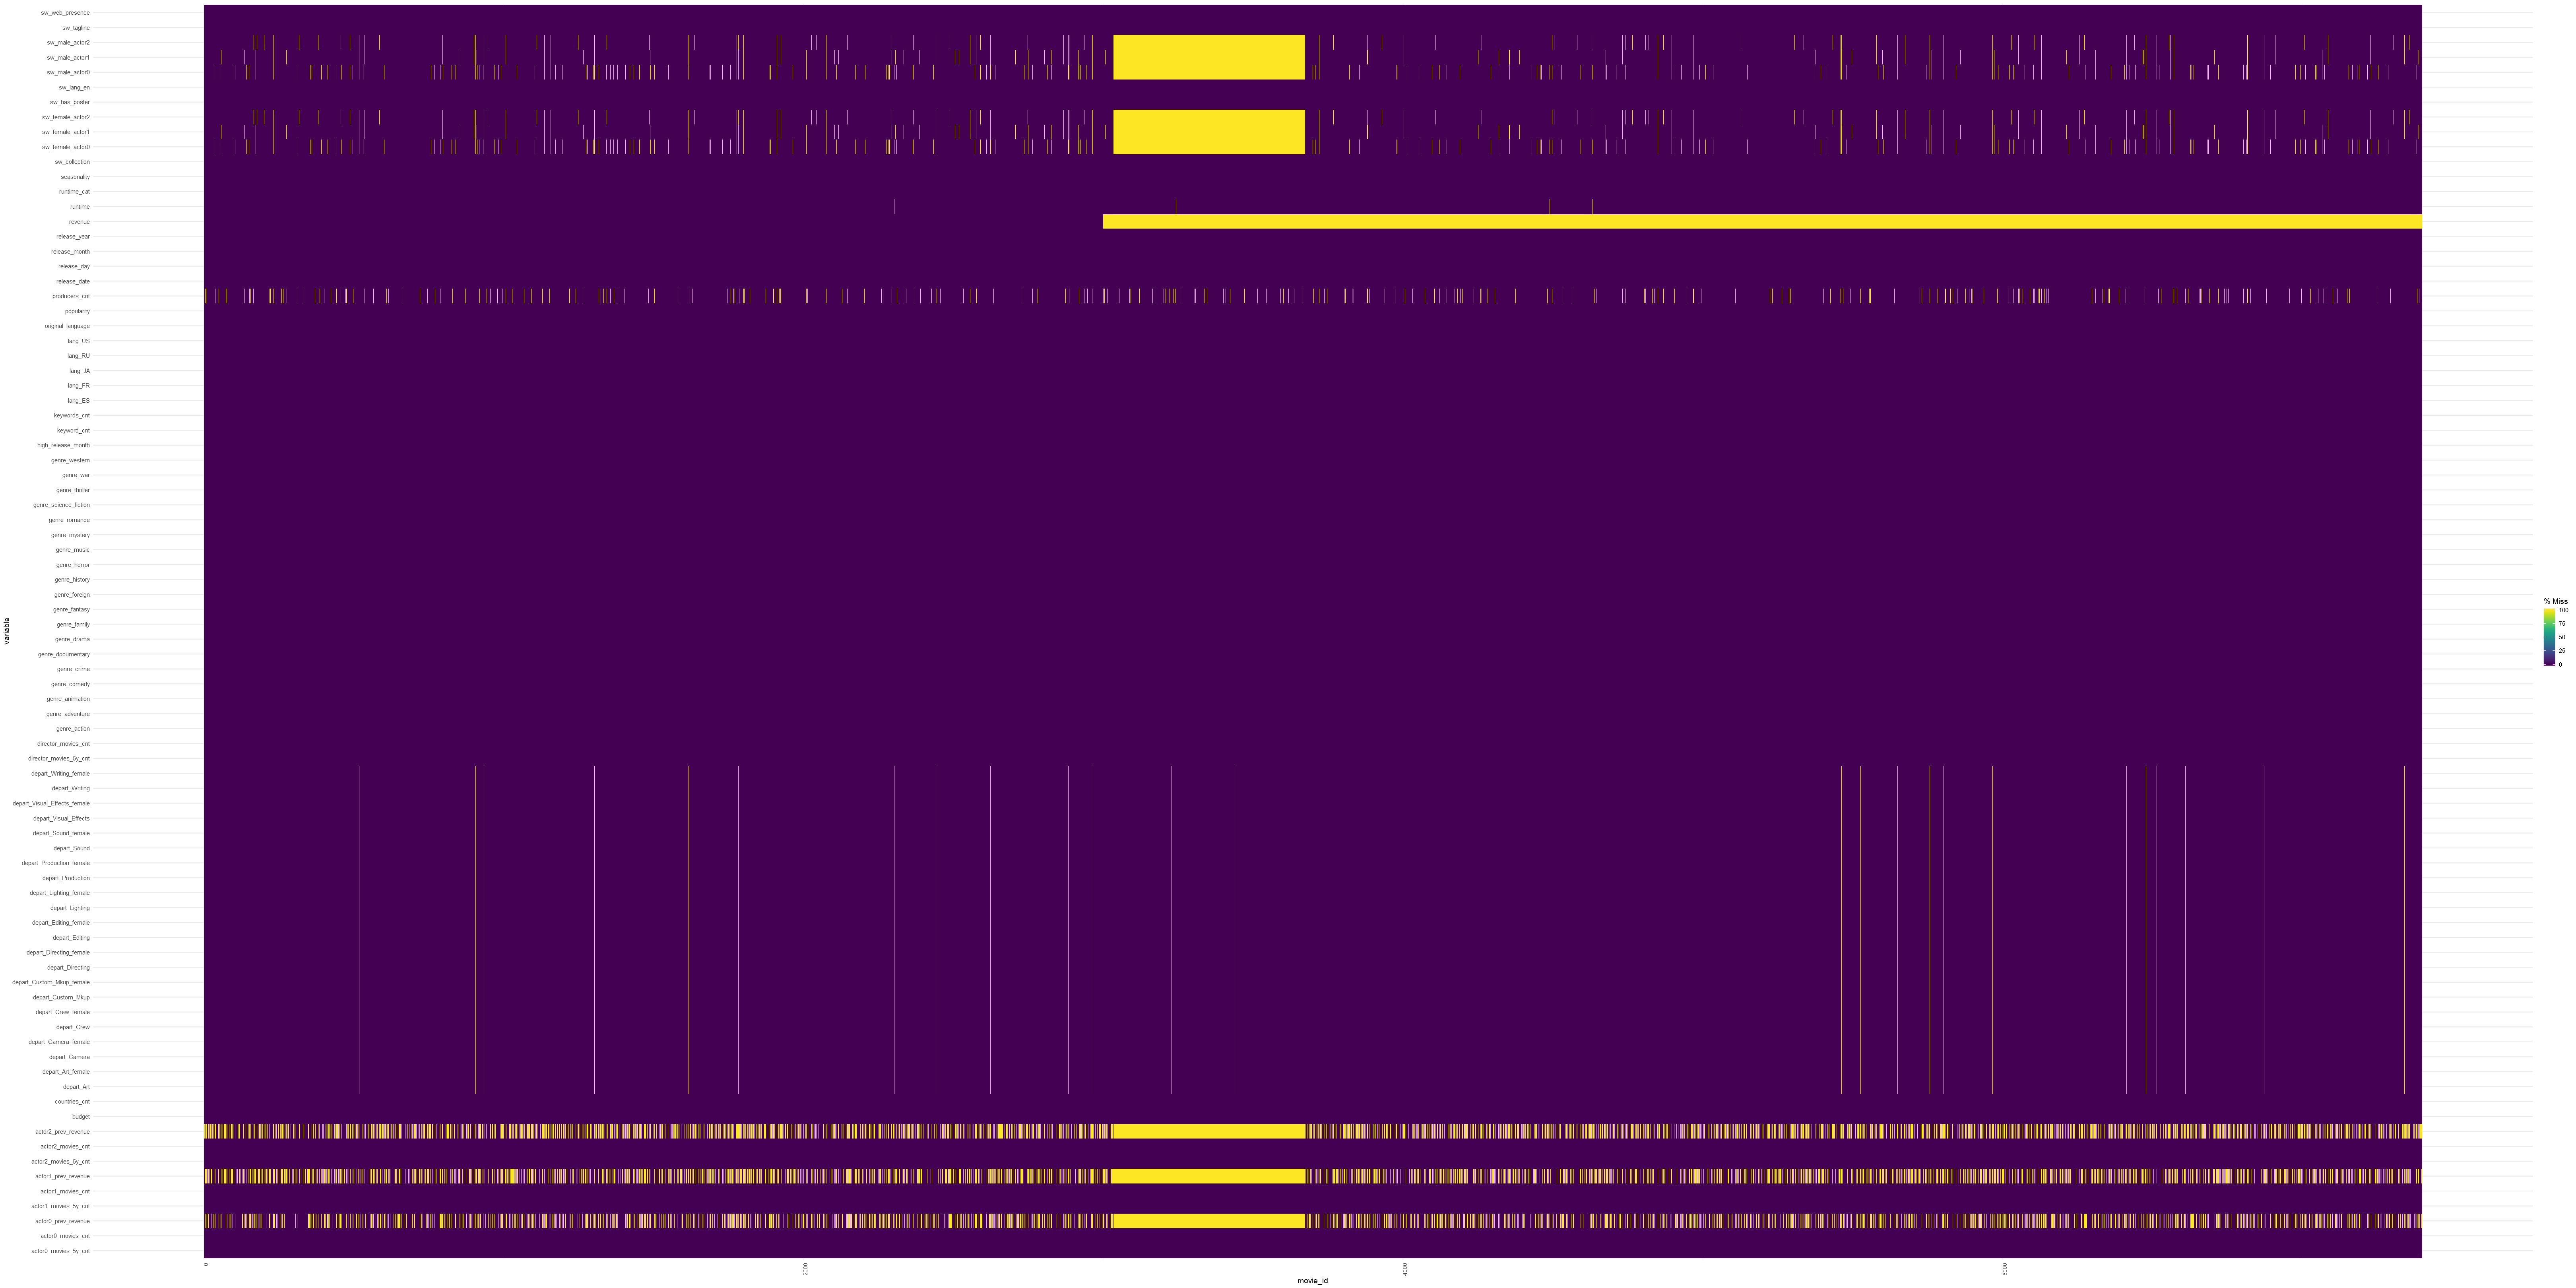

In [97]:
library(naniar)
options(repr.plot.width = 54, repr.plot.height = 27)
gg_miss_fct(x=movies_ff, fct=movie_id) + 
theme(axis.text.x = element_text(angle=90, size=8))

In [62]:
if (!require("VIM")) install.packages("VIM")

Loading required package: VIM

Loading required package: colorspace

Loading required package: grid

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.


Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep




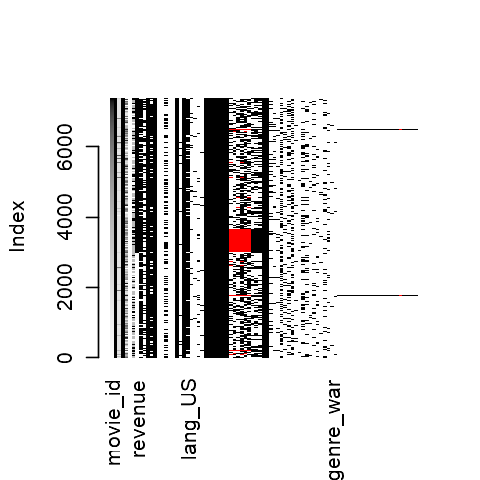

In [63]:
matrixplot(as.matrix(df.na))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


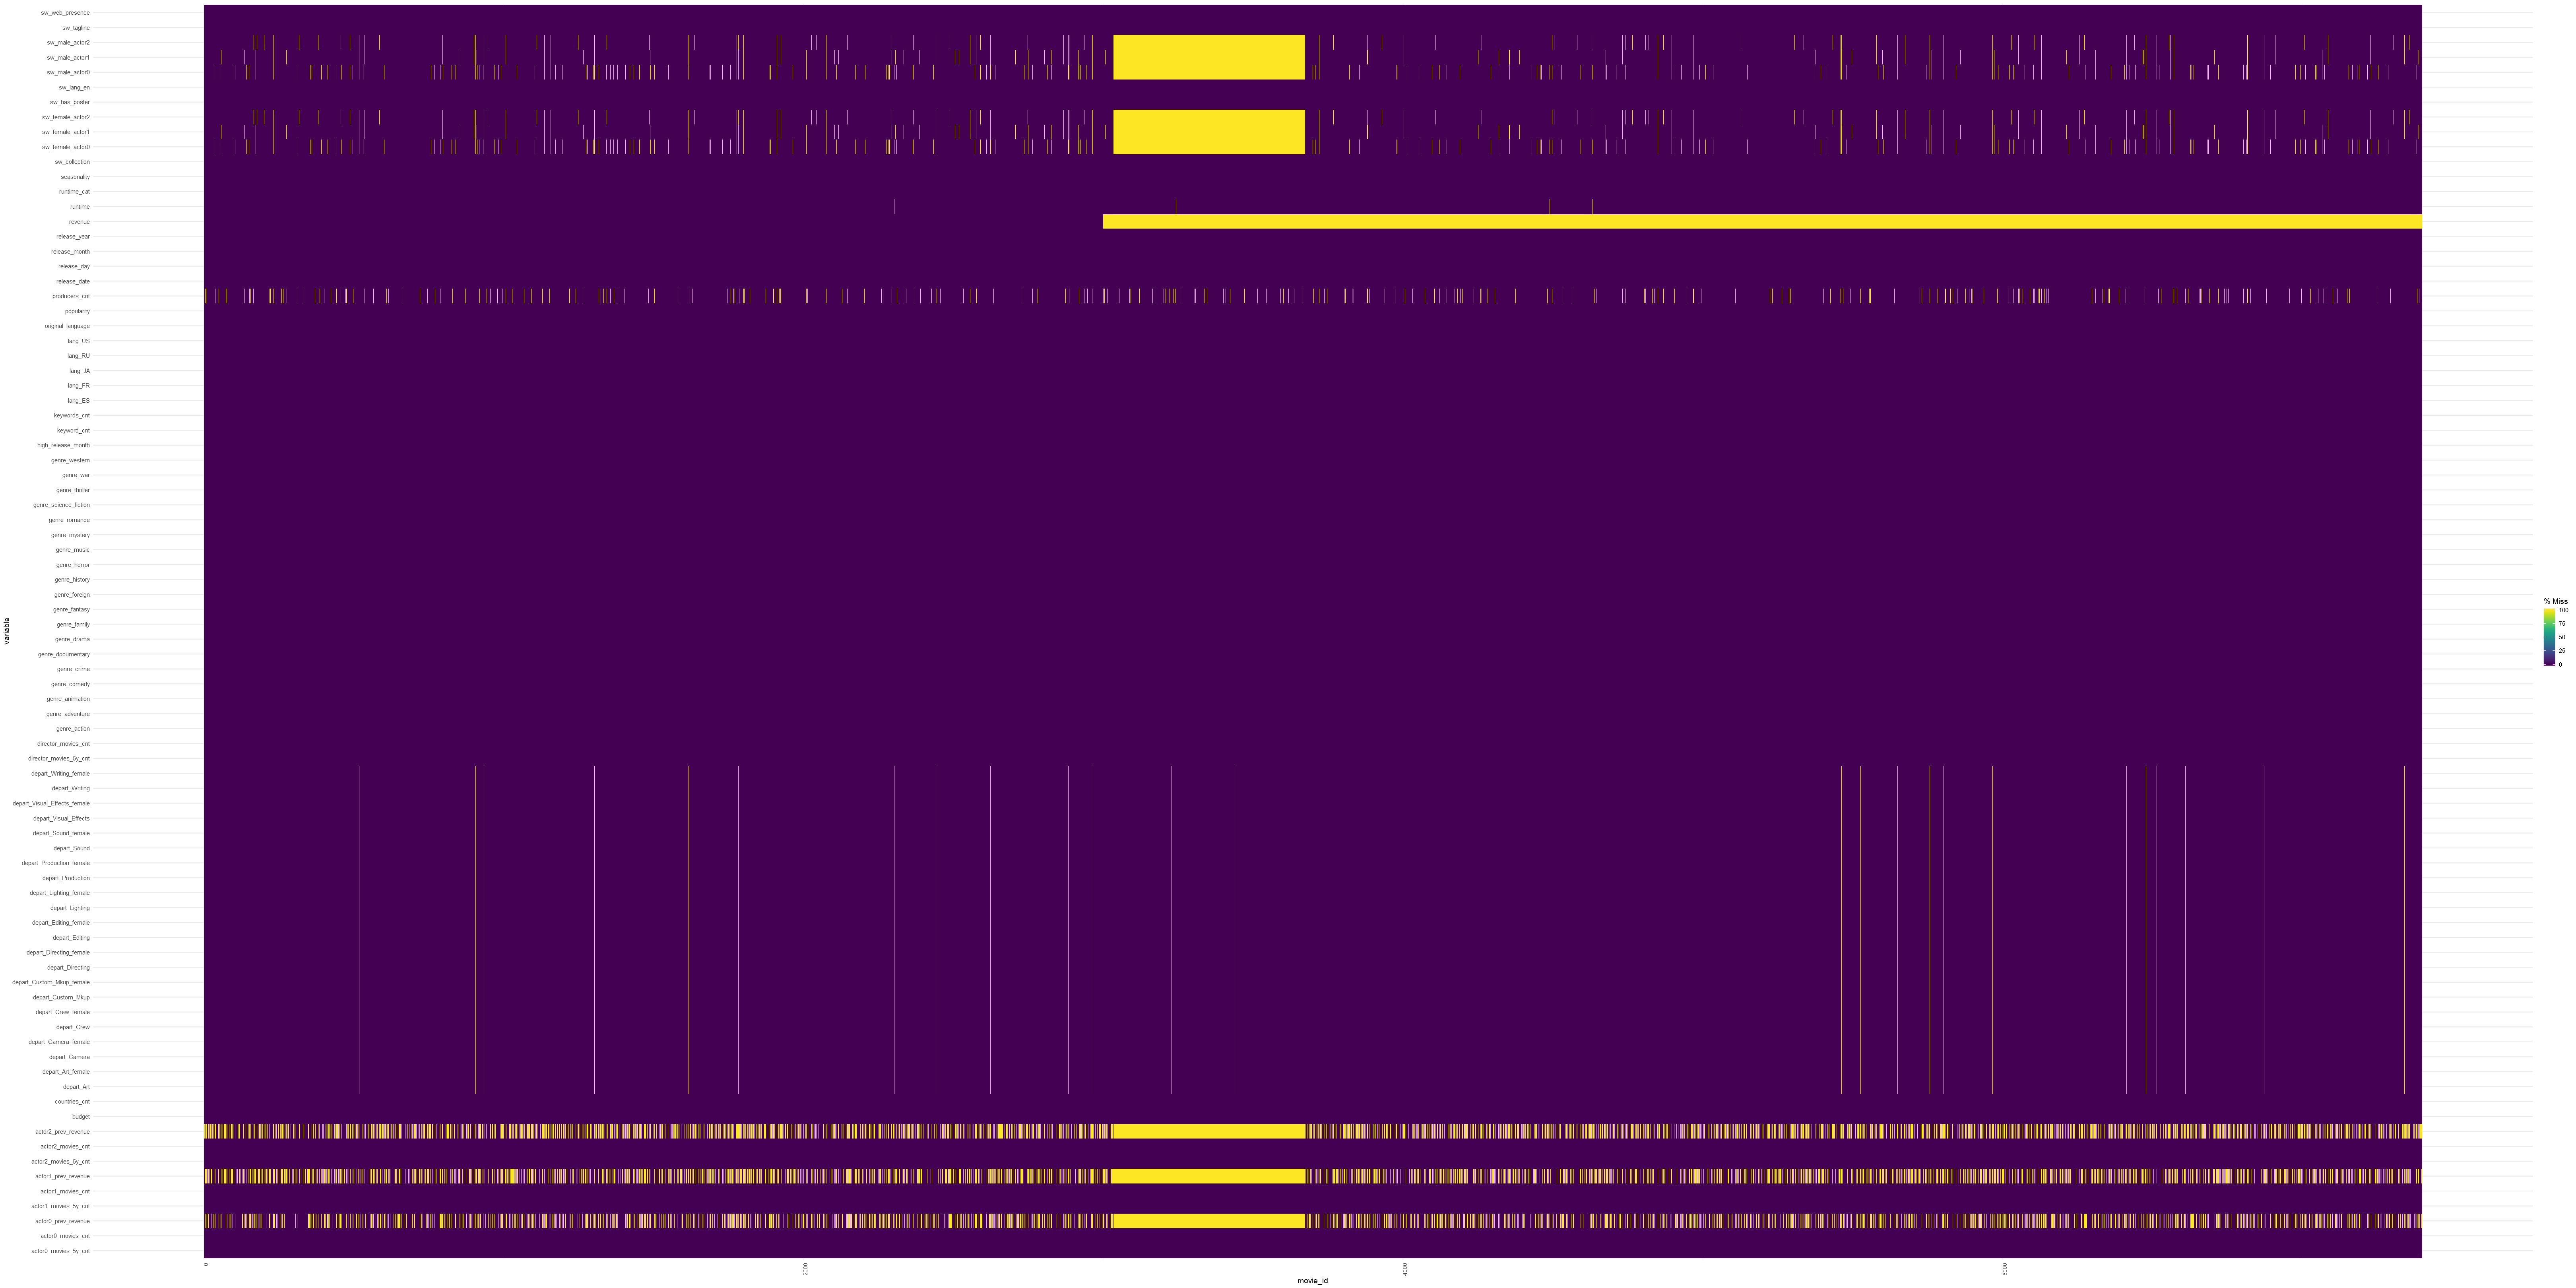

In [89]:
#heatmap of missing values
library(naniar)
options(repr.plot.width = 54, repr.plot.height = 27)
gg_miss_fct(x=movies_ff, fct=movie_id) + 
theme(axis.text.x = element_text(angle=90, size=8))

# Exploratory data analysis 

In [8]:
report_path <- 'C:\\Users\\DANIEL\\Documents\\DataScience\\stats\\report\\report.html'

In [9]:
summary(movies_ff)

    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
 release_date          runtime      runtime_cat           revenue         
 Length:7375        Min.   :  0.0   Length:7375        Min.   :1.000e+00  
 Class :character   1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06  
 Mode  :character   Median :104.0   Mode  :character   Median :1.693e+07  
                    Mean   :107.7                      Mean   :6.688e+07  
                    3rd Qu.:118.0        

In [10]:
rapply(movies_ff,function(x)length(unique(x)))

movie_id                       budget 
                        7375                          704 
           original_language                   popularity 
                          44                         7371 
                release_date                      runtime 
                        4697                          168 
                 runtime_cat                      revenue 
                           3                         2845 
                  sw_lang_en              sw_web_presence 
                           2                            2 
               sw_has_poster                   sw_tagline 
                           2                            2 
                 keyword_cnt                 release_year 
                          46                           99 
               release_month           high_release_month 
                          13                            2 
                 release_day                  seasonality 
                          32                           13 
               sw_collection                producers_cnt 
                           3                           25 
               countries_cnt                      lang_US 
                          12                            2 
                     lang_FR                      lang_RU 
                           2                            2 
                     lang_ES                      lang_JA 
                           2                            2 
                keywords_cnt            actor0_movies_cnt 
                          46                           61 
        actor0_movies_5y_cnt            actor1_movies_cnt 
                          17                           59 
        actor1_movies_5y_cnt            actor2_movies_cnt 
                          18                           53 
        actor2_movies_5y_cnt             sw_female_actor0 
                          16                            3 
            sw_female_actor1             sw_female_actor2 
                           3                            3 
              sw_male_actor0               sw_male_actor1 
                           3                            3 
              sw_male_actor2          actor0_prev_revenue 
                           3                         1152 
         actor1_prev_revenue          actor2_prev_revenue 
                        1265                         1341 
         director_movies_cnt       director_movies_5y_cnt 
                          30                            7 
             genre_adventure                genre_fantasy 
                           2                            2 
             genre_animation                  genre_drama 
                           2                            2 
                genre_horror                 genre_action 
                           2                            2 
                genre_comedy                genre_history 
                           2                            2 
               genre_western               genre_thriller 
                           2                            2 
                 genre_crime            genre_documentary 
                           2                            2 
       genre_science_fiction                genre_mystery 
                           2                            2 
                 genre_music                genre_romance 
                           2                            2 
                genre_family                    genre_war 
                           2                            2 
               genre_foreign                   depart_Art 
                           2                           35 
               depart_Camera                  depart_Crew 
                          24                           51 
          depart_Custom_Mkup             depart_Directing 
                          28                           24 
        

In [11]:
install.packages("pastecs")
library(pastecs)
options(scipen=100)
options(digits=2)
stat.desc(movies_ff[,5:84], basic=TRUE, desc=TRUE, norm=FALSE, p=0.95)

Installing package into 'C:/Users/DANIEL/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DANIEL\AppData\Local\Temp\RtmpszAi2r\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 3.6.2"

Attaching package: 'pastecs'


The following objects are masked from 'package:dplyr':

    first, last




release_date runtime   runtime_cat revenue             sw_lang_en
nbr.val  NA             7370.00 NA                       2993.0 7375.0000 
nbr.null NA               19.00 NA                          0.0 1039.0000 
nbr.na   NA                5.00 NA                       4382.0    0.0000 
min      NA                0.00 NA                          1.0    0.0000 
max      NA              338.00 NA                 1519557910.0    1.0000 
range    NA              338.00 NA                 1519557909.0    1.0000 
sum      NA           794097.00 NA               200169779760.0 6336.0000 
median   NA              104.00 NA                   16928137.0    1.0000 
mean     NA              107.75 NA                   66879311.6    0.8591 
SE.mean  NA                0.25 NA                    2516188.3    0.0041 
CI.mean  NA                0.49 NA                    4933634.3    0.0079 
var      NA              458.50 NA          18949292507956320.0    0.1211 
std.dev  NA               21.41 NA                  137656429.2    0.3479 
coef.var NA                0.20 NA                          2.1    0.4050 
         sw_web_presence sw_has_poster sw_tagline keyword_cnt release_year  ...
nbr.val  7375.0000       7375.00000    7375.0000   7375.000       7374.0000 ...
nbr.null 5012.0000          2.00000    1442.0000    649.000          0.0000 ...
nbr.na      0.0000          0.00000       0.0000      0.000          1.0000 ...
min         0.0000          0.00000       0.0000      0.000       1918.0000 ...
max         1.0000          1.00000       1.0000    149.000       2017.0000 ...
range       1.0000          1.00000       1.0000    149.000         99.0000 ...
sum      2363.0000       7373.00000    5933.0000  53579.000   14745625.0000 ...
median      0.0000          1.00000       1.0000      6.000       2004.0000 ...
mean        0.3204          0.99973       0.8045      7.265       1999.6779 ...
SE.mean     0.0054          0.00019       0.0046      0.073          0.1790 ...
CI.mean     0.0107          0.00038       0.0091      0.143          0.3510 ...
var         0.2178          0.00027       0.1573     39.090        236.3624 ...
std.dev     0.4667          0.01647       0.3966      6.252         15.3741 ...
coef.var    1.4565          0.01647       0.4930      0.861          0.0077 ...
         depart_Art_female depart_Camera_female depart_Crew_female
nbr.val  7341.0000         7341.0000            7341.0000         
nbr.null 5988.0000         7194.0000            6971.0000         
nbr.na     34.0000           34.0000              34.0000         
min         0.0000            0.0000               0.0000         
max         7.0000            3.0000              10.0000         
range       7.0000            3.0000              10.0000         
sum      1726.0000          150.0000             473.0000         
median      0.0000            0.0000               0.0000         
mean        0.2351            0.0204               0.0644         
SE.mean     0.0065            0.0017               0.0039         
CI.mean     0.0128            0.0033               0.0077         
var         0.3115            0.0211               0.1126         
std.dev     0.5581            0.1453               0.3356         
coef.var    2.3737            7.1103               5.2080         
         depart_Custom_Mkup_female depart_Directing_female
nbr.val  7341.0000                 7341.0000              
nbr.null 5293.0000                 6297.0000              
nbr.na     34.0000                   34.0000              
min         0.0000                    0.0000              
max         6.0000                    4.0000              
range       6.0000                    4.0000              
sum      2595.0000                 1127.0000              
median      0.0000                    0.0000              
mean        0.3535                    0.1535              
SE.mean     0.0076                    0.0046              
CI.mean     0.0149            

##  2.2 Plots

Warning message:
"Ignoring unknown parameters: main"


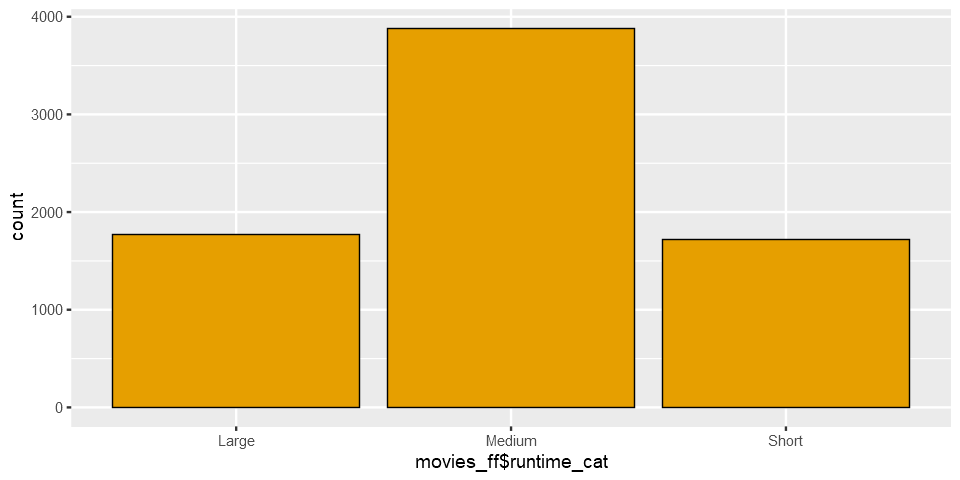

In [17]:
#Runtime_cat
ggplot(movies_ff, aes(movies_ff$runtime_cat)) +
  geom_bar(fill = "#E69F00",color = "black",size = 0.3, main = "runtime_cat")  + theme_get()
options(repr.plot.width = 8, repr.plot.height = 4)

Warning message:
"Removed 5 rows containing missing values (geom_point)."


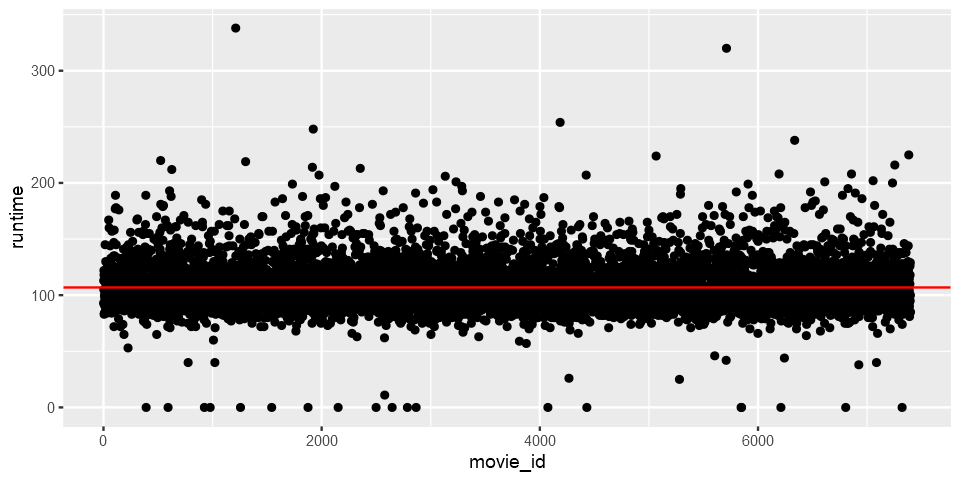

In [21]:
#Runtime Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=runtime)) +
    geom_hline(yintercept = 107 ,color="red")

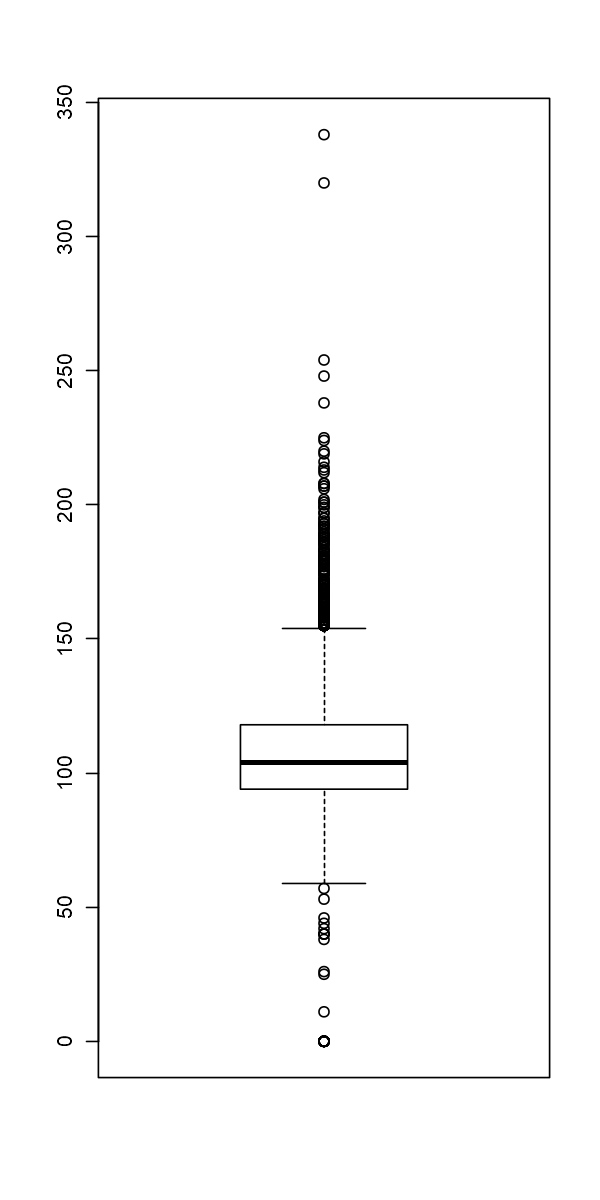

In [23]:
out_runtime <- boxplot(movies_ff$runtime)
options(repr.plot.width = 10, repr.plot.height =10)

In [24]:
head(out_runtime$out) # outlier
min(out_runtime$out) #  minimum outlier
max(out_runtime$out)
median(out_runtime$out)
mean(out_runtime$out)
length(out_runtime$out)

[1] 167 160 157 158 177 189

[1] 0

[1] 338

[1] 165

[1] 156

[1] 275

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2012 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2012 rows containing non-finite values (stat_density)."


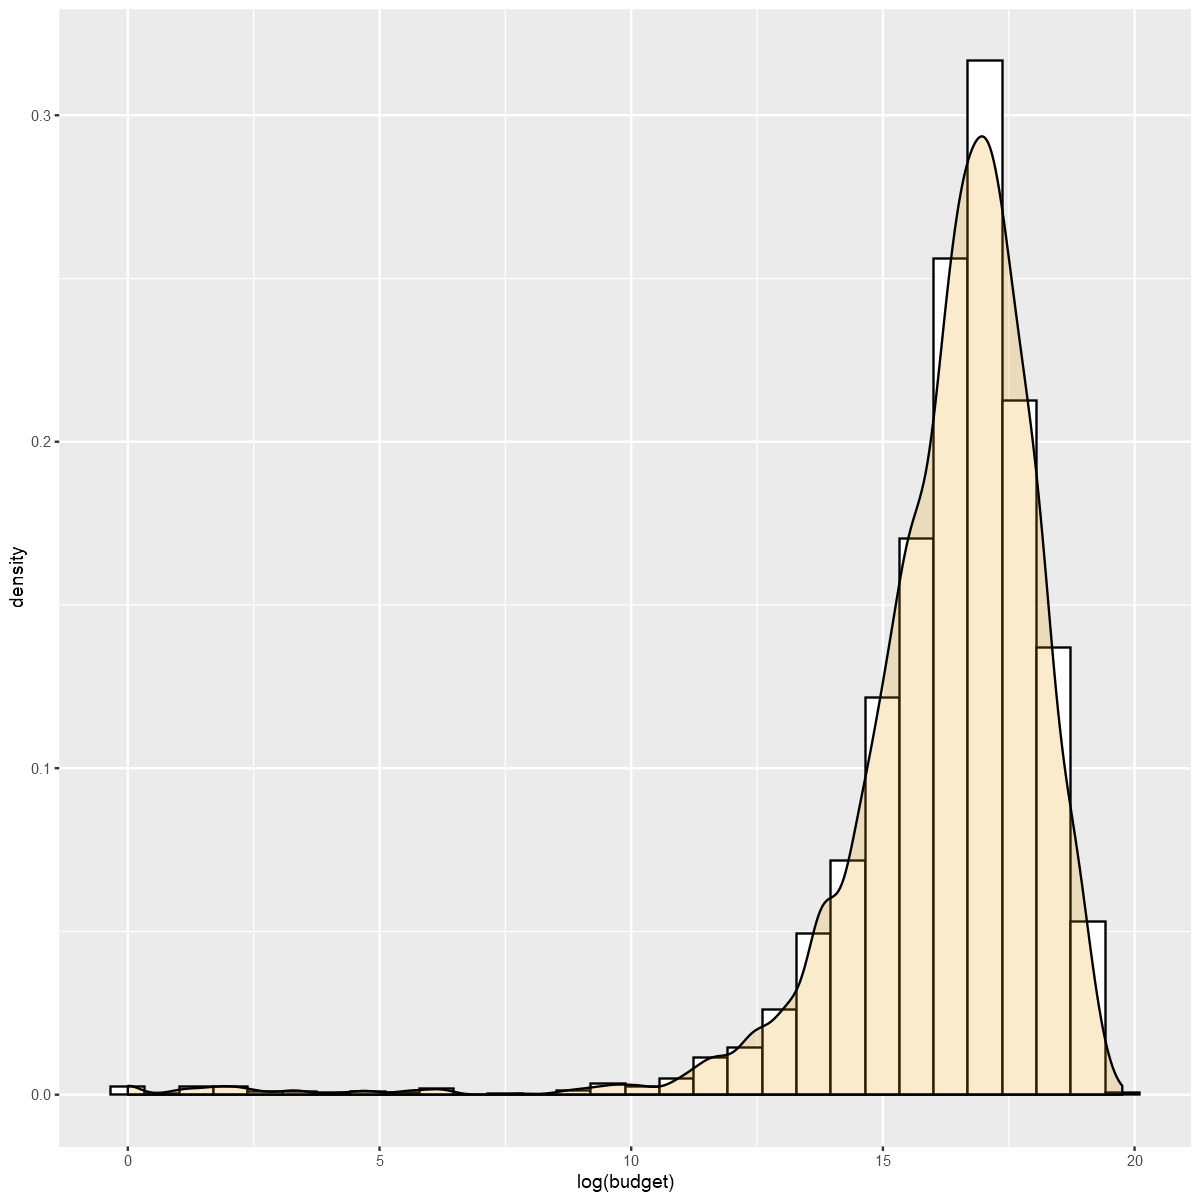

In [25]:
# Budget
ggplot(movies_ff, aes(x=log(budget))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=0.2, fill="#E69F00") + theme_get()
options(repr.plot.width = 5, repr.plot.height = 3)

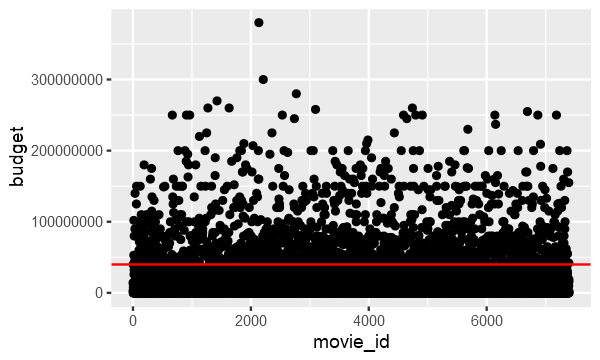

In [27]:
#Budget Outliers
ggplot(data=movies_ff) +
    geom_point(aes(x=movie_id, y=budget)) +
    geom_hline(yintercept = 40000000 ,color="red")

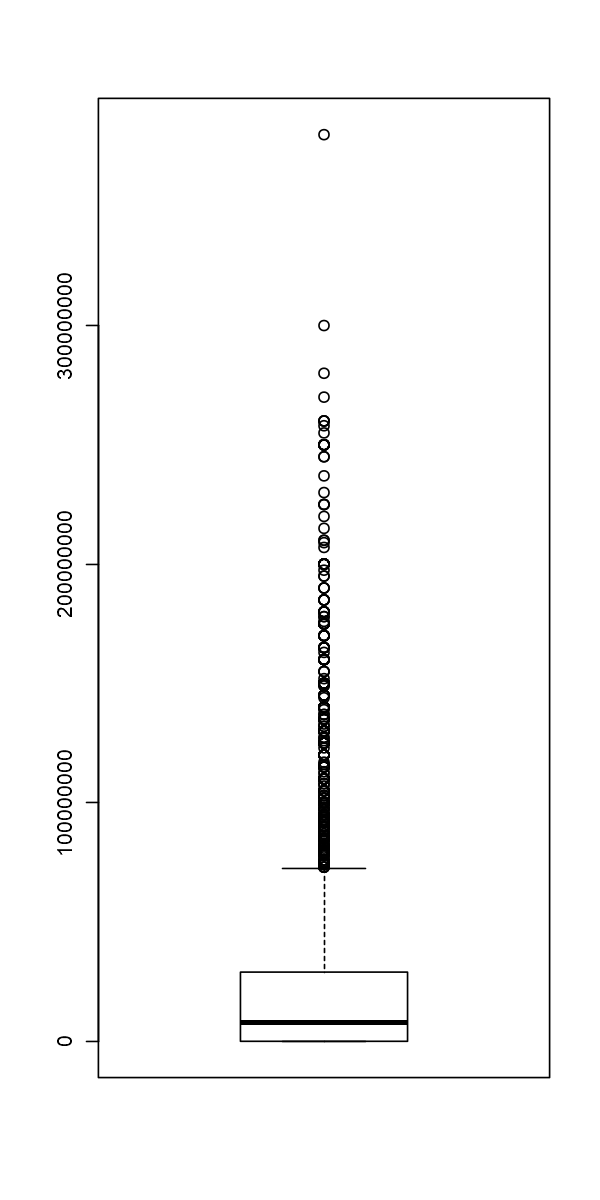

In [29]:
out_budget <- boxplot(movies_ff$budget)
options(repr.plot.width = 10, repr.plot.height =10)

In [30]:
head(out_budget$out) # outlier
min(out_budget$out) #  minimum outlier
max(out_budget$out) 
median(out_budget$out)
mean(out_budget$out)
length(out_budget$out)

[1] 102000000  80000000  90000000 140000000  80000000 125000000

[1] 73000000

[1] 380000000

[1] 105000000

[1] 121655977

[1] 624

In [ ]:
#Original_language

In [31]:
table(movies_ff$original_language)


  af   ar   bm   bn   ca   cn   cs   da   de   el   en   es   fa   fi   fr   he 
   1    1    2    3    1   41    3   17   49    3 6336   95    5    3  199    6 
  hi   hu   id   is   it   ja   ka   kn   ko   ml   mr   nb   nl   no   pl   pt 
 118    4    3    1   55   90    1    1   48   12    1    1   11    5    5   13 
  ro   ru   sr   sv   ta   te   th   tr   ur   vi   xx   zh 
   8  105    3   20   31    9    5    9    2    1    2   46 

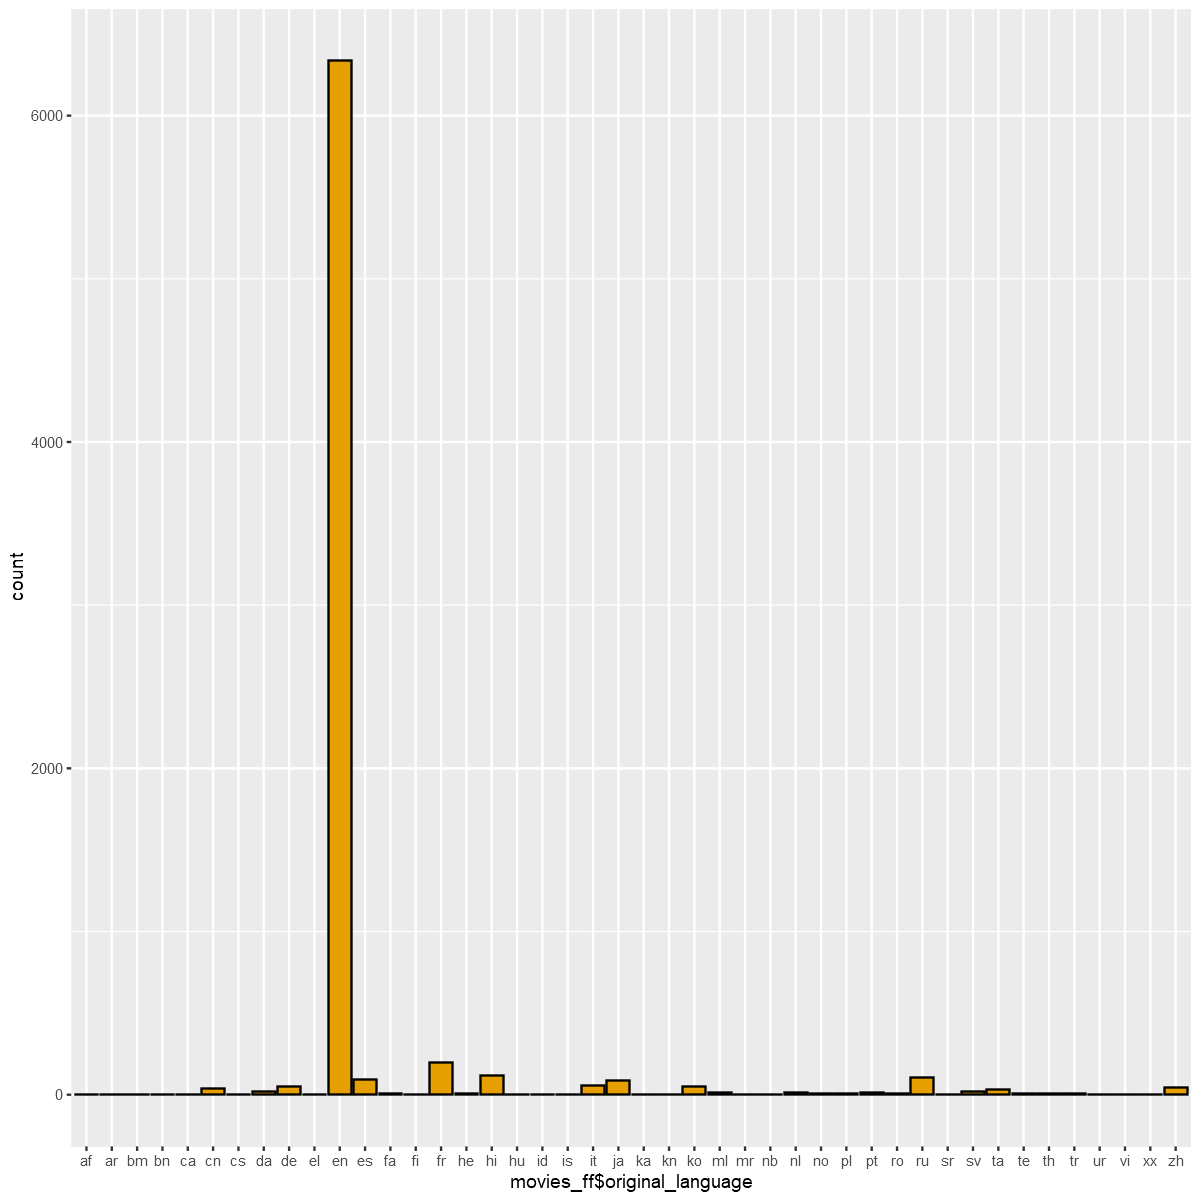

In [32]:
ggplot(movies_ff, aes(movies_ff$original_language)) +
  geom_bar(color = "black", fill = "#E69F00")  + theme_get()
options(repr.plot.width = 20, repr.plot.height = 7)